In [ ]:
# !pip install pytesseract lanms Shapely

In [1]:
import glob

import numpy as np
import matplotlib.pyplot as plt

import torch
import pytesseract
import cv2

import PIL
from PIL import Image, ImageFile

In [2]:
plt.rcParams["figure.figsize"] = 16, 9  # Make figures larger

In [3]:
images = glob.glob("/home/gx/mishow_objdet/data/CaptureVerification/**/*.jpg", recursive=True)
# images = glob.glob("./test_images-car_num_plates/*")
# images = glob.glob("/home/gx/datasets/ICDAR_2015/test_img/**/*.jpg", recursive=True)
len(images)

173

In [4]:
pytesseract.image_to_string(Image.open(np.random.choice(images)))

'la Natural Language Processing\n\nNatural language processing (NLP) refers to Al method of communicating with intelligent\nsystem permitting a human-computer dialogue in a conversational, day-to-day natural\nlanguage such as Bahasa Melayu, English, Mandarin.'

## Inference

In [6]:
from detect import Predictor

In [7]:
# predictor = Predictor(config_path="./runs/deeplabv3plus_resnet50_scope512_merged32_icdar2015/code/configs/config.yaml",
#                       device="cpu")
# predictor = Predictor(config_path="./runs/rn50_scope512_inter128_64_32_merged32_icdar2015/code/configs/config.yaml",
#                       device="cpu")
predictor = Predictor(config_path="./runs/vgg16bn_scope512_inter128_64_32_merged32_icdar2015/code/configs/config.yaml",
                      device="cpu")
# predictor = Predictor(config_path="./runs/xception_scope512_inter256_128_64_merged32_icdar2015/code/configs/config.yaml",
#                       device="cpu")
# predictor = Predictor(config_path="./runs/deeplabv3plus_resnet50_scope512_merged32_icdar2015/code/configs/config.yaml",
#                       device="cpu")
# predictor = Predictor(config_path="./runs/u2net_scope512_inter128_64_32_merged32_icdar2015/code/configs/config.yaml",
#                       device="cpu")
# predictor = Predictor(config_path="./runs/xception_scope512_inter128_64_32_merged32_icdar2015/code/configs/config.yaml",
#                       device="cuda:0")
# predictor = Predictor(config_path="./runs/pvanet_scope512_inter128_64_32_merged32_icdar2015/code/configs/config.yaml",
#                       device="cuda:0")
# predictor = Predictor(config_path="./runs/densenet169_scope512_inter128_64_32_merged32_icdar2015/code/configs/config.yaml",
#                       device="cuda:0")

using device: cpu
feature_dims: [128, 256, 512, 512]
input_feature_dims: [128, 256, 512, 512]
prev_channels: 512, cin: 512, cout: 128
i=0a, in: 1024, out: 128
i=0b, in: 128, out: 128
prev_channels: 128, cin: 256, cout: 64
i=1a, in: 384, out: 64
i=1b, in: 64, out: 64
prev_channels: 64, cin: 128, cout: 32
i=2a, in: 192, out: 32
i=2b, in: 32, out: 32
scope: 512
scale: 4


In [8]:
# The input preprocessing that was used to train the model
predictor.preprocessing_params

{'mean': (0.5, 0.5, 0.5), 'std': (0.5, 0.5, 0.5)}

In [9]:
# The input image size (side length) / model output size (side length) ratio
predictor.scale

4

In [10]:
# The input image size that was used to train the model
predictor.scope

512

In [34]:
from detect import load_pil, resize_img
from PIL import Image
import matplotlib.pyplot as plt

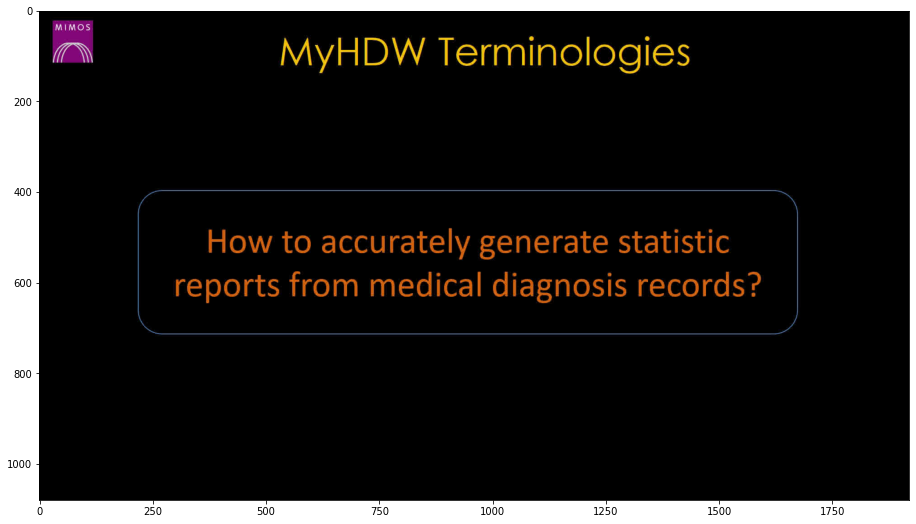

In [66]:
sample_img_path = np.random.choice(images)
sample_img = Image.open(sample_img_path)
plt.imshow(sample_img)

In [67]:
with torch.no_grad():
    score, geo = predictor.model(load_pil(resize_img(sample_img)[0], preprocessing_params=predictor.preprocessing_params))

In [73]:
boxes, img = predictor.predict(sample_img_path, save_img=False, return_img=True, score_thresh=0.5, nms_thresh=1.0)

score thresh: 0.5
>>> score min: 0.0
>>> score max: 0.9999986886978149
>>> restore_polys: valid_pos shape: (5661, 2)
>>> restore_polys: valid_geo shape: (5, 5661)
>>> restore_polys: score_shape: (264, 480)
>>> restore_polys: scale: 4
>>> restore_polys: d    : [[  4.9619594   5.906178    5.1588774 ...  50.816093   46.64005
   50.993027 ]
 [ 16.198406   14.585303   14.451874  ...  20.545609   21.987137
   19.700605 ]
 [  7.9950905  79.8479     72.66675   ... 140.84117   133.43326
  138.91408  ]
 [ 74.36321     7.700159   11.536034  ... 150.43054   142.42876
  153.32268  ]]
>>> restore_polys: angle: [-0.04706832  0.0187203   0.01405019 ...  0.09548544  0.01108915
  0.0995509 ]


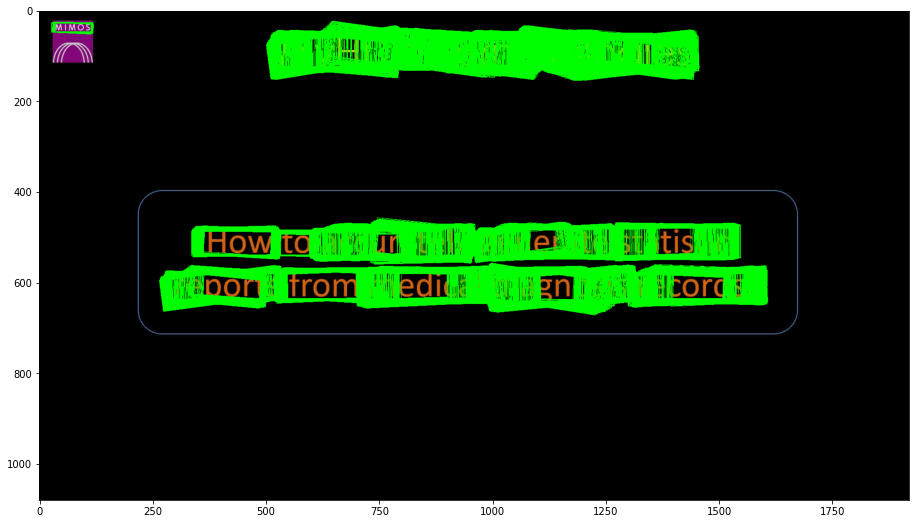

In [74]:
plt.imshow(img)

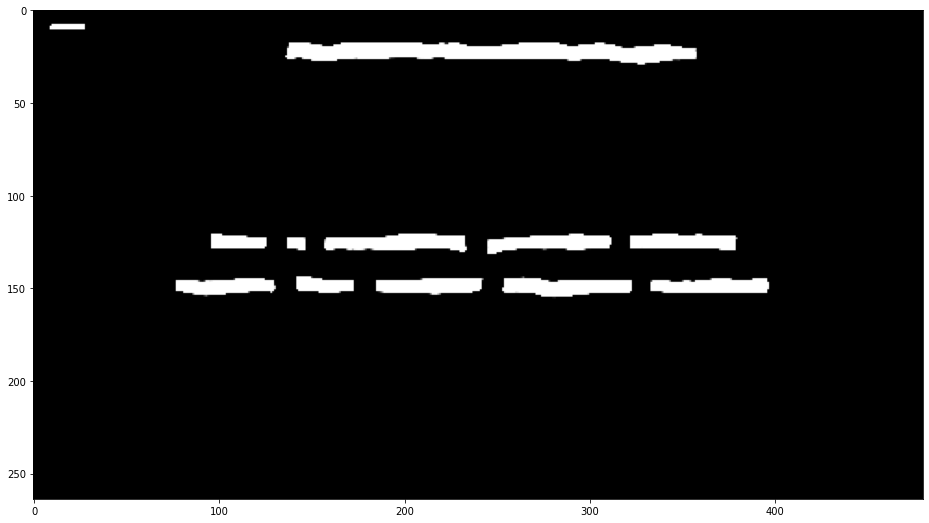

In [68]:
plt.imshow(score.squeeze(0).permute(1, 2, 0).cpu().numpy()[..., 0], cmap="gray")

>>> original img size: (720, 1280, 3)
>>> resized img size: (704, 1280, 3)
>>> ratio_h: 0.9777777777777777
>>> ratio_w: 1.0
>>> score min: 0.0
>>> score max: 1.0
>>> restore_polys: valid_pos shape: (500, 2)
>>> restore_polys: valid_geo shape: (5, 500)
>>> restore_polys: score_shape: (176, 320)
>>> restore_polys: scale: 4
>>> restore_polys: d    : [[ 14.027991   14.72402    15.16754   ...   8.913435    6.064844
    9.420713 ]
 [ 33.842865   33.691822   33.669586  ...   2.2266493   4.2376266
    1.9974256]
 [168.87149   172.58359   179.12857   ...   5.277334   20.630083
    9.115822 ]
 [ 33.70542    31.168358   28.876368  ...  12.248287    2.3819394
    8.5072365]]
>>> restore_polys: angle: [0.09732539 0.07794278 0.05962471 0.05045134 0.0518945  0.05406328
 0.05798324 0.06023272 0.06643455 0.09485177 0.08078267 0.13304812
 0.14920416 0.15673326 0.16128838 0.16927755 0.11536053 0.12982193
 0.07410783 0.08262768 0.08572373 0.09042491 0.09637696 0.10356262
 0.11591031 0.1451432  0.16906671 

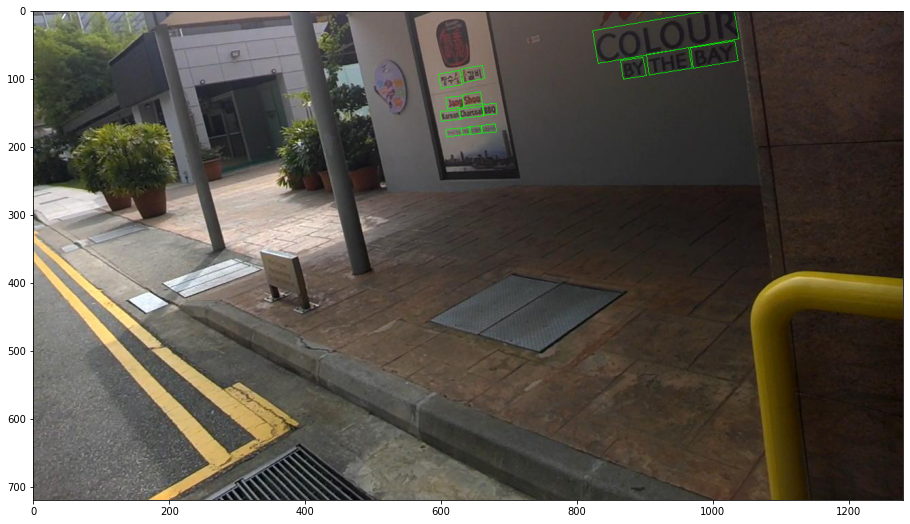

In [36]:
# Make prediction and plot image

boxes, img = predictor.predict(np.random.choice(images), 
                  save_img=False,  # Don't save image on disk
                  return_img=True,  # Return image
                  score_thresh=0.9, 
                  nms_thresh=0.2)
plt.imshow(img)

In [12]:
boxes

array([[727., 199., 772., 190., 777., 220., 732., 229.,  24.],
       [794., 185., 910., 179., 912., 204., 795., 209.,  22.],
       [768., 252., 824., 249., 825., 270., 768., 272.,  18.],
       [827., 250., 879., 247., 880., 265., 828., 268.,  11.],
       [753., 312., 797., 310., 797., 330., 754., 332.,   9.],
       [718., 174., 778., 158., 785., 187., 726., 203.,   4.],
       [825., 310., 847., 309., 848., 327., 826., 328.,   3.],
       [794., 312., 820., 312., 820., 331., 794., 331.,   2.]],
      dtype=float32)

In [ ]:
# predictor.predict_dir("/home/gx/datasets/ICDAR_2015/test_img/", 
#                       output_dir="./predictions_icdar2015test_vgg16bn_scope512_inter128_64_32_merged32_icdar2015")

In [37]:
predictor.predict_dir("/home/gx/datasets/ICDAR_2015/test_img/", 
                      output_dir="./predictions_icdar2015test_densenet169_scope512_inter128_64_32_merged32_icdar2015__score0.5_nms0.2",
                      score_thresh=0.5, nms_thresh=0.2)
# predictor.predict_dir("/home/gx/datasets/ICDAR_2015/test_img/", 
#                       output_dir="./predictions_icdar2015test_xception_scope512_inter256_128_64_merged32_icdar2015__score0.5_nms0.2",
#                       score_thresh=0.5, nms_thresh=0.2)

Found 500 images in /home/gx/datasets/ICDAR_2015/test_img/
>>> original img size: (720, 1280, 3)
>>> resized img size: (704, 1280, 3)
>>> ratio_h: 0.9777777777777777
>>> ratio_w: 1.0
>>> score min: 0.0
>>> score max: 1.0
>>> restore_polys: valid_pos shape: (217, 2)
>>> restore_polys: valid_geo shape: (5, 217)
>>> restore_polys: score_shape: (176, 320)
>>> restore_polys: scale: 4
>>> restore_polys: d    : [[ 11.65265    11.755333   11.220217   10.293425    9.554279   10.123931
   10.848015   11.607473   11.996232   12.308929   11.888273   12.644555
   13.382075   14.103119   15.840833   15.365865   15.738643   16.08214
   11.463394   14.794211   11.453521   11.704155   13.878271   12.358596
   13.953811   14.170372   14.130512   14.101216   14.113055   14.819774
   14.6766615  14.056133   13.260934   14.421697   15.795858   15.245768
   15.13607    15.389169   16.525259   15.427282   18.551147   19.319529
   20.772387   20.713535   17.473284   15.771457   20.0648     16.824072
   16.305

 [22.553629  17.948856  14.808709  ... 11.785047   7.6441593  4.294815 ]]
>>> restore_polys: angle: [ 4.24651653e-02  4.62257788e-02  4.74826247e-02  4.78511378e-02
  3.93198691e-02  3.80770676e-02  4.17732634e-02  5.35900854e-02
  6.31907582e-02  5.83938882e-02  5.10426871e-02  2.35915091e-02
  2.99755428e-02  6.31021857e-02  7.30848610e-02  4.72206548e-02
  4.84765656e-02  5.57311401e-02  7.97821730e-02  2.28769500e-02
  2.49835514e-02  5.98334931e-02  3.14263850e-02  4.07643430e-02
  4.31168079e-02  4.08457965e-02  5.39453030e-02  3.56028862e-02
  4.89795282e-02  6.24479242e-02  6.73236325e-02  6.24443665e-02
  7.72270933e-02  7.49233142e-02  6.74399137e-02  3.26630063e-02
  4.20535840e-02 -1.07176425e-02  4.77547050e-02  1.09093904e-03
  4.88726050e-02  3.88208367e-02  4.56529707e-02  3.41775129e-03
  5.04354239e-02  3.96445654e-02  2.82301530e-02  4.71446328e-02
  2.80213654e-02  1.75737422e-02 -5.01094162e-02 -4.37308140e-02
 -4.59302925e-02 -4.62739021e-02 -5.58137195e-03  3.434

>>> score min: 0.0
>>> score max: 1.0
>>> restore_polys: valid_pos shape: (488, 2)
>>> restore_polys: valid_geo shape: (5, 488)
>>> restore_polys: score_shape: (176, 320)
>>> restore_polys: scale: 4
>>> restore_polys: d    : [[12.56699  12.059198 11.474895 ... 23.190292 18.942259 26.333632]
 [27.708021 29.56362  31.670849 ... 14.390189 17.160604 12.47478 ]
 [11.423877 16.716448 21.750067 ... 36.36087  37.115597 35.483303]
 [74.048645 68.898094 65.61952  ... 80.99753  80.49029  79.94363 ]]
>>> restore_polys: angle: [-2.5610936e-01 -2.6823375e-01 -2.8147173e-01 -2.9913536e-01
 -3.0283201e-01 -3.0291092e-01 -2.9335201e-01 -2.9763564e-01
 -3.0764097e-01 -2.9786399e-01 -3.0048451e-01 -3.0317280e-01
 -3.1159687e-01 -3.2333702e-01 -3.3266750e-01 -2.9950649e-01
 -3.0571833e-01 -3.2699165e-01 -3.2935393e-01 -3.1445220e-01
 -2.9701030e-01 -3.7362909e-01 -2.9778197e-01 -2.9809394e-01
 -3.1946453e-01 -3.4833124e-01 -2.9698971e-01 -3.0897972e-01
 -2.3370643e-01 -2.7818626e-01 -3.0509806e-01 -3.1470

>>> score min: 0.0
>>> score max: 1.0
>>> restore_polys: valid_pos shape: (705, 2)
>>> restore_polys: valid_geo shape: (5, 705)
>>> restore_polys: score_shape: (176, 320)
>>> restore_polys: scale: 4
>>> restore_polys: d    : [[11.254985  11.017824  10.890767  ...  8.120336   8.931895   7.588127 ]
 [21.215527  21.470488  21.595463  ...  3.9543734  3.4307978  4.3864603]
 [11.890963  15.540658  18.268204  ...  8.756091   5.7107573 13.737912 ]
 [93.65662   88.9058    85.43264   ...  7.1386437 10.627807   3.2095058]]
>>> restore_polys: angle: [-1.80249307e-02 -2.71217991e-02 -2.09288578e-02 -2.84576658e-02
 -3.23293209e-02 -4.22336273e-02 -4.26289178e-02 -4.86469679e-02
 -5.96524170e-03 -1.07876747e-03 -1.72760093e-03 -1.05064204e-02
 -3.98655236e-02 -2.07854211e-02 -3.06389835e-02 -1.09600425e-02
 -1.43439937e-02 -1.73972566e-02 -1.19104469e-02  5.02157770e-03
 -3.55740488e-02 -4.16411571e-02 -4.12779786e-02 -4.36133109e-02
 -3.53990607e-02 -2.85838749e-02 -1.13838902e-02 -6.63598394e-03
 

>>> score min: 0.0
>>> score max: 1.0
>>> restore_polys: valid_pos shape: (348, 2)
>>> restore_polys: valid_geo shape: (5, 348)
>>> restore_polys: score_shape: (176, 320)
>>> restore_polys: scale: 4
>>> restore_polys: d    : [[  9.841516   10.417058   13.512359  ...  20.423927   17.025915
    9.344882 ]
 [ 24.408049   23.992708   20.556896  ...   6.094005    6.8520756
    7.941744 ]
 [148.394     151.13727   153.73138   ...  75.51348    35.54233
   53.696774 ]
 [ 18.70489    14.358059   11.789626  ...  29.06695    69.53243
    8.197803 ]]
>>> restore_polys: angle: [ 0.13275713  0.1308477   0.12077496  0.13943796  0.14434531  0.13539834
  0.14497805  0.15282696  0.16037403  0.1401881   0.15581572  0.13439785
  0.15027319  0.16425934  0.16544896  0.1582605   0.15351999  0.15450175
  0.15266462  0.15291665  0.14495444  0.13841537  0.12636167  0.12240013
  0.15623254  0.15804628  0.15985814  0.17228372  0.18090263  0.18090862
  0.16350903  0.1571087   0.16054049  0.15111472  0.17039771  0.

>>> score min: 0.0
>>> score max: 1.0
>>> restore_polys: valid_pos shape: (410, 2)
>>> restore_polys: valid_geo shape: (5, 410)
>>> restore_polys: score_shape: (176, 320)
>>> restore_polys: scale: 4
>>> restore_polys: d    : [[ 50.704563  51.34      54.05954  ...  68.32288   65.564095  68.56802 ]
 [ 77.35274   73.419586  68.519196 ...  29.734417  31.463951  27.68838 ]
 [214.95622  222.76701  228.30226  ...  39.83479   37.47658   43.191025]
 [ 86.738396  81.928444  78.83799  ... 198.0429   195.2527   200.7848  ]]
>>> restore_polys: angle: [0.74304986 0.7257388  0.6858145  0.7042519  0.71787417 0.7130809
 0.71818805 0.64953095 0.62293065 0.6020912  0.5969766  0.6815532
 0.678521   0.64909375 0.6678606  0.6800477  0.6834321  0.6037001
 0.6435304  0.6222391  0.6049966  0.60030276 0.60998994 0.66765016
 0.5312242  0.5572071  0.6070716  0.6288634  0.6407091  0.64494514
 0.66358453 0.65607864 0.6304487  0.6190783  0.6154763  0.6179031
 0.62631136 0.6524347  0.6488733  0.63108313 0.46192336 0.

>>> score min: 0.0
>>> score max: 1.0
>>> restore_polys: valid_pos shape: (176, 2)
>>> restore_polys: valid_geo shape: (5, 176)
>>> restore_polys: score_shape: (176, 320)
>>> restore_polys: scale: 4
>>> restore_polys: d    : [[ 5.7855353  6.5570593  7.034877   7.177736   7.281981   7.256954
   7.598646   7.9342875 11.458404  11.108765  10.821554  10.912667
  10.878161  10.72889    8.001229   9.062294   7.2222     6.8213263
   6.7750783 10.092047  14.945379  15.189379  15.05246   13.978372
  10.260348  11.648738  10.846168  10.391748  12.699297   7.131539
   9.962488   7.084133  10.439864  13.936358   7.8812985 10.199184
  13.293548  10.066455  12.500559  11.364192  13.190783  10.62216
   8.595545  10.289671  12.662301  13.200921  13.313334  13.081162
  11.45415   10.847277  11.1315975 23.170818  23.755085  22.078691
  20.545681  13.264698  13.385298  13.940736  15.107685  16.718096
  13.630142  23.252718  13.381602  18.210812  21.080046  22.869469
  23.067865  20.462416  17.557676  17.

>>> original img size: (720, 1280, 3)
>>> resized img size: (704, 1280, 3)
>>> ratio_h: 0.9777777777777777
>>> ratio_w: 1.0
>>> score min: 0.0
>>> score max: 1.0
>>> restore_polys: valid_pos shape: (416, 2)
>>> restore_polys: valid_geo shape: (5, 416)
>>> restore_polys: score_shape: (176, 320)
>>> restore_polys: scale: 4
>>> restore_polys: d    : [[ 6.089547   6.068334  10.117857  ... 16.942444  15.889618  18.950848 ]
 [13.270811  15.069182   9.146938  ...  7.6720147  7.2529197  6.1240215]
 [ 7.357664  11.708787   7.627374  ... 24.071201  24.486284  10.535435 ]
 [69.49813   73.55178   71.218056  ... 10.795454   6.5175695 28.127882 ]]
>>> restore_polys: angle: [-1.94578782e-01 -2.02294007e-01 -2.03332424e-01 -1.99425459e-01
 -2.03485116e-01 -2.10646167e-01 -2.16141865e-01 -2.52267748e-01
 -2.42805466e-01 -2.35117763e-01 -2.36159638e-01 -2.01320007e-01
 -1.92778155e-01 -1.86152562e-01 -1.87091455e-01 -2.24071398e-01
 -2.57588565e-01 -2.63909668e-01 -2.67406166e-01 -2.77238190e-01
 -2.631

>>> original img size: (720, 1280, 3)
>>> resized img size: (704, 1280, 3)
>>> ratio_h: 0.9777777777777777
>>> ratio_w: 1.0
>>> score min: 0.0
>>> score max: 1.0
>>> restore_polys: valid_pos shape: (1758, 2)
>>> restore_polys: valid_geo shape: (5, 1758)
>>> restore_polys: score_shape: (176, 320)
>>> restore_polys: scale: 4
>>> restore_polys: d    : [[ 6.962914   7.4961023  7.544519  ... 13.440823  14.300816  15.407243 ]
 [18.614813  19.46109   18.778429  ...  5.7997003  5.4736414  4.194423 ]
 [ 6.704422  10.211182  14.702647  ... 11.647427  14.732723  22.703152 ]
 [15.734886  11.805293   8.703338  ... 70.38394   65.51395   57.913185 ]]
>>> restore_polys: angle: [0.06233089 0.08008534 0.07525532 ... 0.21082255 0.21868384 0.23679182]
>>> original img size: (720, 1280, 3)
>>> resized img size: (704, 1280, 3)
>>> ratio_h: 0.9777777777777777
>>> ratio_w: 1.0
>>> score min: 0.0
>>> score max: 1.0
>>> restore_polys: valid_pos shape: (282, 2)
>>> restore_polys: valid_geo shape: (5, 282)
>>> re

>>> score min: 0.0
>>> score max: 1.0
>>> restore_polys: valid_pos shape: (528, 2)
>>> restore_polys: valid_geo shape: (5, 528)
>>> restore_polys: score_shape: (176, 320)
>>> restore_polys: scale: 4
>>> restore_polys: d    : [[12.711717  13.0189295  7.9084783 ... 61.642464  61.30938   62.27006  ]
 [10.134766   9.508094   7.6188626 ... 18.944174  19.361057  18.898731 ]
 [39.171055  41.063816  19.84016   ... 19.24559   16.979988  21.657503 ]
 [17.222519  14.275516   7.8557706 ... 20.65461   26.40934   15.428941 ]]
>>> restore_polys: angle: [ 2.74136335e-01  2.72050351e-01  1.84575975e-01  1.60064310e-01
  1.99077085e-01  1.88844234e-01  1.71501562e-01  1.64179951e-01
  1.65319577e-01  1.16922036e-01  2.03041241e-01  2.27062121e-01
  2.31164843e-01  2.58703649e-01  2.54734248e-01  1.81771666e-01
  2.04762653e-01  2.21799552e-01  2.33460203e-01  2.53500253e-01
  2.60348856e-01  2.85438418e-01  2.95393378e-01  2.79955626e-01
  2.68977880e-01  2.95589238e-01  2.80032963e-01  2.03779012e-01
 

>>> score min: 0.0
>>> score max: 1.0
>>> restore_polys: valid_pos shape: (310, 2)
>>> restore_polys: valid_geo shape: (5, 310)
>>> restore_polys: score_shape: (176, 320)
>>> restore_polys: scale: 4
>>> restore_polys: d    : [[12.982097 16.463089 16.248913 ... 17.46665  19.161396 20.915829]
 [38.18466  34.369267 35.094337 ... 10.527796  9.446705  8.031135]
 [54.156044 26.29252  21.078989 ...  9.903155 13.415269 19.779263]
 [93.97995  41.897778 43.405758 ... 74.41066  72.36143  68.490295]]
>>> restore_polys: angle: [ 5.30107208e-02  2.98948362e-02  5.26504479e-02  7.67097175e-02
  2.48689521e-02  9.75253806e-03  1.85042061e-02  2.82902624e-02
  3.87538001e-02  4.30825390e-02  3.93352248e-02  4.34482470e-02
  1.24237090e-02  7.06116185e-02  5.34284860e-02  5.36076874e-02
  5.13585843e-02  6.08000942e-02  5.53590693e-02  7.61827826e-02
  6.84975237e-02  6.46665022e-02  6.78464472e-02  7.18712732e-02
  3.72818001e-02  2.82441974e-02  3.15475352e-02  3.22555415e-02
  3.69629078e-02  3.45499

>>> score min: 0.0
>>> score max: 1.0
>>> restore_polys: valid_pos shape: (484, 2)
>>> restore_polys: valid_geo shape: (5, 484)
>>> restore_polys: score_shape: (176, 320)
>>> restore_polys: scale: 4
>>> restore_polys: d    : [[  4.5957828   4.997088    5.556525  ... 203.8105    202.06728
  215.78362  ]
 [ 17.003359   16.513468   16.43458   ...  74.67963    71.65582
   64.62312  ]
 [ 87.46486    91.60221    94.498314  ...  38.25871    35.731182
   31.358492 ]
 [ 17.341444   12.658668    9.013118  ...  47.465515   40.836857
   25.802145 ]]
>>> restore_polys: angle: [ 4.91965562e-02  4.79404591e-02  5.48263341e-02  2.87179481e-02
  1.70340780e-02  2.14109421e-02  1.74044650e-02  1.66380368e-02
  1.73260067e-02  2.49198861e-02  3.85270379e-02  3.98642160e-02
  4.66397963e-02  3.11189126e-02  5.07249199e-02  5.34745492e-02
 -8.24102759e-03 -3.36897164e-03  9.79410764e-03  2.28572879e-02
 -4.84218867e-03  3.70123424e-02  3.58749665e-02  4.89765331e-02
  3.48886997e-02  3.87848839e-02  3.2386

>>> score min: 0.0
>>> score max: 1.0
>>> restore_polys: valid_pos shape: (577, 2)
>>> restore_polys: valid_geo shape: (5, 577)
>>> restore_polys: score_shape: (176, 320)
>>> restore_polys: scale: 4
>>> restore_polys: d    : [[ 10.663495    9.2272005   8.291454  ...  18.918795   18.611536
   17.866617 ]
 [  4.699978    5.3793974   6.0956416 ...   7.74006     7.7262154
    7.1746583]
 [ 11.312286   16.022833   21.300076  ...  92.94374    96.80195
  101.30644  ]
 [ 32.921894   27.071005   24.71114   ...  65.20156    59.39777
   48.468437 ]]
>>> restore_polys: angle: [-0.21363156 -0.1869438  -0.17618965 -0.20208156 -0.2235396  -0.17070106
 -0.16337486 -0.15566199 -0.14794357 -0.13205971 -0.13623236 -0.14117661
 -0.1494268  -0.15179594 -0.15883397 -0.15504114  0.22227292  0.27842444
  0.2654843   0.2464732   0.2296067   0.22082582  0.2282804  -0.14979963
 -0.15478994 -0.16602589 -0.17686872 -0.17277704 -0.14233963 -0.13511728
  0.22324908  0.2081716   0.28859773  0.26945502  0.2424684   0.

>>> score min: 0.0
>>> score max: 1.0
>>> restore_polys: valid_pos shape: (102, 2)
>>> restore_polys: valid_geo shape: (5, 102)
>>> restore_polys: score_shape: (176, 320)
>>> restore_polys: scale: 4
>>> restore_polys: d    : [[  4.714458    4.641736    4.579521    4.7510614   8.701869    8.495408
    8.312797    8.051534    7.8915677   7.6726537   7.710342    8.211981
    8.365722    8.099659    7.922694    7.306942    7.655126    7.484285
    7.62178     7.6134424   7.5326657   7.816776    7.487848    7.390452
    7.375851    7.417389   12.406487   12.49281    12.160841   12.053312
   12.021034   12.306482   12.116393   12.22332    12.189575   12.277466
   12.351937   11.885196   11.529476   11.4646015  11.479642   11.689053
   11.766368   11.88602    11.932987   11.828825   11.906466   11.924706
   16.181114   16.514463   16.927927   16.590763   16.717968   16.179714
   16.652311   16.935648   16.007393   16.726696   16.013458   15.6649475
   15.405665   15.484806   15.73081    15.61

>>> score min: 0.0
>>> score max: 1.0
>>> restore_polys: valid_pos shape: (366, 2)
>>> restore_polys: valid_geo shape: (5, 366)
>>> restore_polys: score_shape: (176, 320)
>>> restore_polys: scale: 4
>>> restore_polys: d    : [[ 2.573621   2.9767332  4.792146  ... 12.167697  11.893793  12.57681  ]
 [12.824646  12.572515  11.573808  ...  6.0326624  6.552748   5.839811 ]
 [42.563637  47.5945     8.4985    ... 11.654344   7.9092183 15.184484 ]
 [ 8.631913   4.63099   14.832354  ... 47.177685  50.599728  42.83643  ]]
>>> restore_polys: angle: [ 0.18321277  0.1627999   0.12381484  0.13448492  0.11743979  0.12683448
  0.13145253  0.12067778  0.1268371   0.11653124  0.1614704   0.17162965
  0.17365967  0.16062438  0.14889783  0.13954806  0.12482058  0.11450703
  0.1038405   0.16619873  0.17095423  0.16500743  0.14833887  0.18462898
  0.14575215  0.13425721  0.11372187  0.11399582  0.18448985  0.14683017
  0.1354592   0.1322212   0.11864383  0.1410476   0.1427883   0.14553306
  0.12267222  0.14

>>> score min: 0.0
>>> score max: 1.0
>>> restore_polys: valid_pos shape: (100, 2)
>>> restore_polys: valid_geo shape: (5, 100)
>>> restore_polys: score_shape: (176, 320)
>>> restore_polys: scale: 4
>>> restore_polys: d    : [[ 11.7290125  10.736185   13.460732   11.859876    9.789191   16.484669
   14.400135   12.259721   10.687413    9.380465   10.451913   10.631715
   11.35717    12.670201   18.140017   16.221489   20.262897   14.453699
   12.879136   11.052779   11.789161   12.553757   13.32182    14.835735
   16.34396    18.24467    19.876324   21.15639    13.77129    16.470802
   11.434466   13.024948   14.594249   15.951256   17.459929   10.34558
   18.58103    19.814318   21.331675   16.898205   14.248232   16.113533
    9.879982   12.500022   17.784914   11.049976   19.567656   20.014292
   20.806534   19.061113   21.596148    9.730515   10.685803   12.21401
   13.984634   16.022081   17.801935   19.147095   20.1783     20.951385
   21.777916   22.393389    9.669251   10.87607

>>> original img size: (720, 1280, 3)
>>> resized img size: (704, 1280, 3)
>>> ratio_h: 0.9777777777777777
>>> ratio_w: 1.0
>>> score min: 0.0
>>> score max: 1.0
>>> restore_polys: valid_pos shape: (928, 2)
>>> restore_polys: valid_geo shape: (5, 928)
>>> restore_polys: score_shape: (176, 320)
>>> restore_polys: scale: 4
>>> restore_polys: d    : [[ 30.7299    31.698612  32.17454  ...  30.588314  29.254232  27.396624]
 [ 35.22617   36.41672   38.080048 ...  14.379359  14.355205  15.183772]
 [ 50.20664   52.559296  53.896404 ...  64.14603   66.60877   75.2212  ]
 [153.598    159.31354  162.92268  ...  31.735548  28.332401  25.278927]]
>>> restore_polys: angle: [-0.29038104 -0.29710916 -0.3013309  -0.4073176  -0.42241013 -0.42764378
 -0.41899163 -0.40559262 -0.39021048 -0.39031693 -0.37147418 -0.37789464
 -0.3797124  -0.3437031  -0.35710165 -0.33702967 -0.32817957 -0.33281654
 -0.35281494 -0.37999666 -0.37686485 -0.3813226  -0.36944997 -0.36181387
 -0.3654495  -0.3058866  -0.33939007 -0.

>>> original img size: (720, 1280, 3)
>>> resized img size: (704, 1280, 3)
>>> ratio_h: 0.9777777777777777
>>> ratio_w: 1.0
>>> score min: 0.0
>>> score max: 1.0
>>> restore_polys: valid_pos shape: (304, 2)
>>> restore_polys: valid_geo shape: (5, 304)
>>> restore_polys: score_shape: (176, 320)
>>> restore_polys: scale: 4
>>> restore_polys: d    : [[ 11.752365    8.511481    8.933164  ...  15.651414   15.072158
   16.007072 ]
 [ 24.216951   24.852516   26.173023  ...   6.640541    7.9450364
    5.5234904]
 [ 11.724599  127.83986   125.373474  ...  10.629864    6.5452356
   13.839064 ]
 [130.09706    17.363787   22.015644  ...  34.608017   38.15314
   31.011816 ]]
>>> restore_polys: angle: [-3.08236144e-02 -7.99450837e-03 -2.09020805e-02 -3.49880382e-02
 -4.33662310e-02 -4.76711877e-02 -3.31476182e-02 -2.48969477e-02
 -3.04063205e-02 -3.35203446e-02 -3.76195125e-02 -3.57410796e-02
 -3.17654051e-02 -3.37385908e-02 -2.19063219e-02 -5.38600124e-02
 -4.87934910e-02 -3.02525852e-02 -2.7668017

>>> original img size: (720, 1280, 3)
>>> resized img size: (704, 1280, 3)
>>> ratio_h: 0.9777777777777777
>>> ratio_w: 1.0
>>> score min: 0.0
>>> score max: 1.0
>>> restore_polys: valid_pos shape: (41, 2)
>>> restore_polys: valid_geo shape: (5, 41)
>>> restore_polys: score_shape: (176, 320)
>>> restore_polys: scale: 4
>>> restore_polys: d    : [[ 7.684421  10.028373   9.926975  12.659706  12.893284  14.0774145
  15.099933  15.185706  16.220688  14.125816  17.790804  17.766897
  18.491337  23.73966   22.37042   22.020042  26.619207  27.68618
  27.046251  35.95143   34.384495  33.777534  43.559387  43.07313
  49.811317  49.034447  55.967278  55.931942  63.564133  62.885094
  70.54729   74.507286  81.274605  78.5751    76.770615  91.69689
  89.58649   87.99172   96.75157   76.499344  85.68959  ]
 [53.332203  51.402664  50.780396  51.459915  50.97745   56.83275
  54.379185  48.94757   51.849136  49.92364   47.071056  45.976173
  47.99146   45.247723  44.320286  46.695293  46.523872  39.57

>>> score min: 0.0
>>> score max: 1.0
>>> restore_polys: valid_pos shape: (285, 2)
>>> restore_polys: valid_geo shape: (5, 285)
>>> restore_polys: score_shape: (176, 320)
>>> restore_polys: scale: 4
>>> restore_polys: d    : [[10.136372  10.3227825 10.701332  ... 16.993322  18.291435  20.184555 ]
 [25.585539  25.247326  25.270536  ...  9.298217   8.7079525  6.500881 ]
 [38.69318   43.385803  46.081173  ... 11.795418  15.824265  23.297436 ]
 [27.709398  25.00219   22.061895  ... 86.44904   84.18886   77.93309  ]]
>>> restore_polys: angle: [ 0.08946992  0.089075    0.08922537  0.08584788  0.06912913  0.06380457
  0.0778029   0.08459459  0.08174121  0.07537759  0.05826225  0.03254185
  0.03582178  0.04451859  0.06231872  0.08376542  0.04018086  0.06835409
  0.06521329  0.07495552  0.08138469  0.07712055  0.05825495  0.09466789
  0.05186829  0.05361293  0.05961815  0.07606687  0.05513324  0.05425015
  0.08197079  0.07785496  0.07287607  0.0646283   0.05009612  0.05995333
  0.06595724  0.07

>>> score min: 0.0
>>> score max: 1.0
>>> restore_polys: valid_pos shape: (914, 2)
>>> restore_polys: valid_geo shape: (5, 914)
>>> restore_polys: score_shape: (176, 320)
>>> restore_polys: scale: 4
>>> restore_polys: d    : [[ 19.277225   15.776656   15.669284  ...  11.018239   11.121826
   12.613288 ]
 [ 36.535397   37.204674   36.49235   ...   3.0219374   2.9013953
    2.3681307]
 [ 21.350058   91.64394    85.43886   ...  14.109562    4.3507633
    7.9026036]
 [265.82977   224.16495   226.37512   ...   9.8709345  22.44846
   17.391539 ]]
>>> restore_polys: angle: [ 1.26021623e-03 -5.79955056e-02 -6.07309043e-02 -6.22382946e-02
 -7.01256916e-02 -6.69101775e-02 -5.67453988e-02 -5.35575040e-02
 -5.07186465e-02 -5.94842620e-02 -6.99896514e-02 -5.84967807e-02
 -7.71673620e-02 -7.39476308e-02 -2.01146789e-02 -5.33925332e-02
 -6.54957592e-02 -3.78488973e-02 -7.86071569e-02 -7.57194236e-02
 -7.08957762e-02 -7.69218728e-02 -6.50474727e-02 -5.15683070e-02
 -6.31016269e-02 -6.33453354e-02 -5.0

>>> score min: 0.0
>>> score max: 1.0
>>> restore_polys: valid_pos shape: (38, 2)
>>> restore_polys: valid_geo shape: (5, 38)
>>> restore_polys: score_shape: (176, 320)
>>> restore_polys: scale: 4
>>> restore_polys: d    : [[ 4.6421833  8.41213    7.6897826  6.458519   6.120145   6.909797
   5.3648963  5.147131   5.2871733  5.2473807  5.8176913 10.604272
  12.469137  12.096009  11.316282  10.936327   9.9531355 10.286907
   8.968825   8.597939   8.472325   8.231712   8.040012   9.348888
  12.906128  14.710958  14.179505  13.870083  13.397004  12.943994
  15.381173  12.53117   12.15897   13.197819  16.798891  17.2855
  16.49283   17.369577 ]
 [15.894251  11.623892  12.338198  13.4249115 14.06536   12.992392
  15.240662  15.959359  16.605146  17.192205  14.552715   9.304927
   7.391195   7.678302   8.013414   8.693911  10.74604    9.988103
  11.841285  12.454259  13.327335  14.072011  14.865715  11.314713
   8.664338   5.4662204  6.050937   6.7154617  7.444935   9.275924
   5.0602345  9.7

>>> original img size: (720, 1280, 3)
>>> resized img size: (704, 1280, 3)
>>> ratio_h: 0.9777777777777777
>>> ratio_w: 1.0
>>> score min: 0.0
>>> score max: 1.0
>>> restore_polys: valid_pos shape: (620, 2)
>>> restore_polys: valid_geo shape: (5, 620)
>>> restore_polys: score_shape: (176, 320)
>>> restore_polys: scale: 4
>>> restore_polys: d    : [[ 26.337765  27.01972   26.605925 ...  34.52429   34.758865  34.349026]
 [ 45.456818  42.61778   38.282803 ...  10.943705  11.074495  10.955619]
 [118.42972  124.124466 126.89656  ...  48.69323   46.93603   50.733116]
 [ 58.28946   58.40537   59.011154 ...  71.80195   75.898544  67.94921 ]]
>>> restore_polys: angle: [ 0.8555887   0.8510249   0.8386774   0.79021883  0.7467558   0.7088813
  0.68431294  0.6773458   0.66879505  0.5633466   0.5849508   0.6176561
  0.66236585  0.70670265  0.7876829   0.77576435  0.78375167  0.75285125
  0.73720604  0.8014928   0.7502996   0.78003114  0.820332    0.8151687
  0.84356326  0.8135673   0.8290541   0.764

>>> original img size: (720, 1280, 3)
>>> resized img size: (704, 1280, 3)
>>> ratio_h: 0.9777777777777777
>>> ratio_w: 1.0
>>> score min: 0.0
>>> score max: 1.0
>>> restore_polys: valid_pos shape: (242, 2)
>>> restore_polys: valid_geo shape: (5, 242)
>>> restore_polys: score_shape: (176, 320)
>>> restore_polys: scale: 4
>>> restore_polys: d    : [[  7.3568826   6.395669    6.464625    6.5658154   6.555059    6.5404954
    6.6627865   6.800823    6.411179    8.321841    6.452374    6.4751434
    6.2284036   6.5542107   7.237005    7.6833787   8.024849    7.757181
    6.3087735   9.244647    9.331093    9.841306    9.367206    9.439713
    8.74904     9.4025545   8.529824    9.749519    8.768662    9.063822
   10.028246   10.178139    9.833087    9.674711   10.038185    8.471626
    9.976391    9.787278    9.850772    8.275646    8.169805    8.2833605
    8.669884    9.018008    9.356863    9.777839   10.037796    9.940909
    9.426223    9.241923    8.964986    8.768593    8.7255335   

>>> original img size: (720, 1280, 3)
>>> resized img size: (704, 1280, 3)
>>> ratio_h: 0.9777777777777777
>>> ratio_w: 1.0
>>> score min: 0.0
>>> score max: 1.0
>>> restore_polys: valid_pos shape: (76, 2)
>>> restore_polys: valid_geo shape: (5, 76)
>>> restore_polys: score_shape: (176, 320)
>>> restore_polys: scale: 4
>>> restore_polys: d    : [[ 5.9317856  6.2220826  5.8655257  5.669834   5.483605   5.413359
   5.6365285  5.81025    5.949203   5.7991176  5.533972   5.2856693
   5.6239376  5.462487   5.274506   5.2006946  5.7160726  5.1400805
   4.98046    5.025416   5.180722   9.686551  10.746858  10.096915
   9.945224   9.65913    9.586556   9.421268   9.479076   9.64761
   9.623334   9.546025   8.95315    9.203297   8.763186   8.634467
   8.621213   9.925143   8.664167   8.676885   8.751895   8.758427
   9.245093  13.79734   13.723033  13.5617285 13.254742  13.311707
  13.340574  13.267594  13.430064  13.67586   13.750323  14.514822
  13.630563  13.301449  13.519444  13.527586  13.

>>> original img size: (720, 1280, 3)
>>> resized img size: (704, 1280, 3)
>>> ratio_h: 0.9777777777777777
>>> ratio_w: 1.0
>>> score min: 0.0
>>> score max: 1.0
>>> restore_polys: valid_pos shape: (299, 2)
>>> restore_polys: valid_geo shape: (5, 299)
>>> restore_polys: score_shape: (176, 320)
>>> restore_polys: scale: 4
>>> restore_polys: d    : [[ 6.5170445  7.149104   7.571427  ... 16.76634   15.098755  18.049343 ]
 [18.85994   20.673204  19.019913  ...  7.8606668  9.611421   7.536032 ]
 [88.458984  73.574265  76.506226  ... 19.056314  10.824719  13.393231 ]
 [10.703895  27.120525  23.303608  ... 71.27774   76.93546   75.72047  ]]
>>> restore_polys: angle: [0.33906555 0.29657662 0.30512586 0.31359667 0.32432553 0.3365736
 0.35178494 0.33371255 0.3140781  0.3018905  0.29186645 0.29190952
 0.28561142 0.27663207 0.27450785 0.35875845 0.34607428 0.31692415
 0.2999234  0.27749586 0.27691445 0.29912478 0.27319297 0.27669385
 0.28663382 0.30707762 0.274835   0.2729516  0.33513194 0.3142395

>>> original img size: (720, 1280, 3)
>>> resized img size: (704, 1280, 3)
>>> ratio_h: 0.9777777777777777
>>> ratio_w: 1.0
>>> score min: 0.0
>>> score max: 1.0
>>> restore_polys: valid_pos shape: (187, 2)
>>> restore_polys: valid_geo shape: (5, 187)
>>> restore_polys: score_shape: (176, 320)
>>> restore_polys: scale: 4
>>> restore_polys: d    : [[ 6.929959   7.472924   7.078662   6.837816   6.7670245  6.7724714
   6.539458   6.2335167  6.839837   6.107715   5.981257   5.810891
   5.7159863  5.860929   6.272143   6.170672  10.628529  11.555104
  11.030328  10.958058  10.9522505 10.990012  10.894757  10.273897
   8.98266    9.577347   9.28366    9.09475    8.987467   9.174209
   9.322929   9.131029   9.935811  14.311379  15.369741  15.138418
  15.218344  15.0680065 15.085709  14.806081  13.820675  13.428973
  13.153905  12.955068  13.033453  13.004961  13.005901  13.228803
  13.303529  13.128709  16.336658  16.50415   16.73031   16.82837
  16.783955   8.720186   8.406498   8.071999   8

>>> original img size: (720, 1280, 3)
>>> resized img size: (704, 1280, 3)
>>> ratio_h: 0.9777777777777777
>>> ratio_w: 1.0
>>> score min: 0.0
>>> score max: 1.0
>>> restore_polys: valid_pos shape: (133, 2)
>>> restore_polys: valid_geo shape: (5, 133)
>>> restore_polys: score_shape: (176, 320)
>>> restore_polys: scale: 4
>>> restore_polys: d    : [[ 4.3320847  3.9460502  3.8460834  8.698709   8.131612   7.8955913
   3.6975627  4.022065   4.3702965  4.841544   5.3117642  8.546266
   8.81968    8.37659    7.9211316  7.5307865  4.8343844  6.347172
   5.636837   4.0663934  3.3726494  6.9807134 10.091522  11.876977
  12.076578  12.008163  10.772937   9.55031   11.441705   8.22587
   7.1652126  5.851163   4.892002   4.220088   8.969859   6.7324405
   7.8803334  8.844285   9.90892   10.93811   11.972612  12.756642
   5.1487565  4.3717     3.9919193  3.924226  12.845995  11.557939
   4.0828867  8.593732   8.003092   7.5525093  6.7024345  7.2514052
   5.2468534  4.6182914  4.2344093  6.0237403 

>>> original img size: (720, 1280, 3)
>>> resized img size: (704, 1280, 3)
>>> ratio_h: 0.9777777777777777
>>> ratio_w: 1.0
>>> score min: 0.0
>>> score max: 1.0
>>> restore_polys: valid_pos shape: (184, 2)
>>> restore_polys: valid_geo shape: (5, 184)
>>> restore_polys: score_shape: (176, 320)
>>> restore_polys: scale: 4
>>> restore_polys: d    : [[ 11.106036   12.944156   14.493684   11.871867   13.432051   14.766089
   16.156424   17.70146    21.450962   19.664927   18.189455   13.671173
   15.362329   12.282027   16.700365   21.81942    24.73784    23.108387
   19.203505   20.591463   16.290644   15.09847    13.697803   17.507835
   21.446985   28.234468   27.436274   26.221039   24.390558   23.17799
   18.635801   17.275408   15.695452   14.133419   12.357852   20.155968
   25.381428   27.676004   24.218796   31.116642   30.253994   22.633514
   29.00773    19.566368   13.578912   15.292299   21.180065   16.643019
   18.4386     31.388092   29.39857    28.155039   26.520277   23.98

>>> original img size: (720, 1280, 3)
>>> resized img size: (704, 1280, 3)
>>> ratio_h: 0.9777777777777777
>>> ratio_w: 1.0
>>> score min: 0.0
>>> score max: 1.0
>>> restore_polys: valid_pos shape: (192, 2)
>>> restore_polys: valid_geo shape: (5, 192)
>>> restore_polys: score_shape: (176, 320)
>>> restore_polys: scale: 4
>>> restore_polys: d    : [[  7.430608    8.328917    7.8962398   8.155484    8.314166    8.284259
    8.256214    8.604174    8.917131    8.719307    8.02578     7.402715
    7.2591033   8.271509    7.6563597   7.4014      7.151202    7.2812247
    7.455181    7.5366015   7.131053    7.6121197   7.612749    7.6116004
    7.729594    7.6444182  11.824492   10.881986   11.525439   11.299639
   11.297599   11.290927   11.13266    11.0175905  11.068589   10.810641
   11.011448   10.867982   10.706756   10.751743   11.192959   11.51181
   11.769322   12.068381   11.033558   12.316596   12.496966   12.644775
   12.469523   10.614866   10.700394   10.910086   10.922484   10.

>>> original img size: (720, 1280, 3)
>>> resized img size: (704, 1280, 3)
>>> ratio_h: 0.9777777777777777
>>> ratio_w: 1.0
>>> score min: 0.0
>>> score max: 1.0
>>> restore_polys: valid_pos shape: (158, 2)
>>> restore_polys: valid_geo shape: (5, 158)
>>> restore_polys: score_shape: (176, 320)
>>> restore_polys: scale: 4
>>> restore_polys: d    : [[  8.300109    6.884746    6.9976788   7.336062    7.321195    7.454835
    7.2716985   8.014437    8.281246    8.343037    8.128507    7.6435995
   11.922544    9.761872   10.262916   10.61479    11.126819   11.360046
   11.633774   12.267785   12.661919   12.553643   12.143171   11.818606
    6.5640106   5.8204894   5.496216   12.597957   16.735498   16.872438
   16.435781   15.91539    14.049151   15.001872   14.323197   13.489994
   15.357271   16.62516    16.970074   15.347018    5.680619    6.363075
    7.10873     7.8384504   5.32558     8.64777     9.211961   10.18022
    8.244614   16.222286   17.369022   11.806324   17.842869   18.0

>>> original img size: (720, 1280, 3)
>>> resized img size: (704, 1280, 3)
>>> ratio_h: 0.9777777777777777
>>> ratio_w: 1.0
>>> score min: 0.0
>>> score max: 1.0
>>> restore_polys: valid_pos shape: (258, 2)
>>> restore_polys: valid_geo shape: (5, 258)
>>> restore_polys: score_shape: (176, 320)
>>> restore_polys: scale: 4
>>> restore_polys: d    : [[16.623251  20.568947  18.027206  ... 18.851154  22.424152  25.757471 ]
 [37.15746   34.459568  36.74074   ... 43.785984  39.25363   34.074127 ]
 [22.911865  22.262257  26.367449  ...  4.7767754  5.2809863  5.474672 ]
 [90.49565   88.003746  85.09812   ...  5.309719   6.551348   7.4839406]]
>>> restore_polys: angle: [-0.4211533  -0.4328338  -0.4269502  -0.42932662 -0.44337898 -0.4346391
 -0.4434651  -0.4472655  -0.4590358  -0.45595962 -0.44631913 -0.42564055
 -0.43324715 -0.4375714  -0.44053498 -0.45422742 -0.44217092 -0.44985926
 -0.4574008  -0.43676236 -0.434876   -0.41710898 -0.41687447 -0.41326216
 -0.4210314  -0.42315727 -0.44718423 -0.4

>>> original img size: (720, 1280, 3)
>>> resized img size: (704, 1280, 3)
>>> ratio_h: 0.9777777777777777
>>> ratio_w: 1.0
>>> score min: 0.0
>>> score max: 1.0
>>> restore_polys: valid_pos shape: (232, 2)
>>> restore_polys: valid_geo shape: (5, 232)
>>> restore_polys: score_shape: (176, 320)
>>> restore_polys: scale: 4
>>> restore_polys: d    : [[ 18.512535   20.138775   21.0431     21.994543   23.556892   21.739437
   23.336082   24.91298    27.104578   29.080137   33.279404   29.697952
   27.231297   31.703678   22.99482    21.300055   25.019945   37.31584
   34.99164    33.979694   29.247797   31.720684   24.599823   22.273682
   20.302448   26.509642   36.266468   41.56335    38.9345     37.557713
   33.86886    22.098898   28.93146    26.004051   23.840738   31.205387
   44.061096   42.5622     41.493412   39.72654    37.42346    34.905094
   29.602257   27.069233   25.186422   23.602514   22.190151   32.356792
   35.27389    47.767143   45.93058    43.794376   38.33       32.42

>>> resized img size: (704, 1280, 3)
>>> ratio_h: 0.9777777777777777
>>> ratio_w: 1.0
>>> score min: 0.0
>>> score max: 1.0
>>> restore_polys: valid_pos shape: (184, 2)
>>> restore_polys: valid_geo shape: (5, 184)
>>> restore_polys: score_shape: (176, 320)
>>> restore_polys: scale: 4
>>> restore_polys: d    : [[ 8.62561    9.782127   9.577217   9.555319  10.122421  10.35429
  10.659083   9.773797  10.799589  10.541679  10.457654  10.354245
  10.605795   8.586242  10.709853  13.746439  13.540107  13.358463
  13.670388  13.722729  13.823872  13.712536  13.715225  14.008448
  13.862597  14.058483  13.837266  12.259095  12.03683   11.644893
  13.883637  17.619925  17.042616  17.112606  17.20204   17.46652
  17.4864    17.603367  16.962713  17.87817   15.739373  15.829376
  15.960224  17.718866  17.470148  18.151691  17.07319   20.180103
  20.803469  20.909573  20.74584   21.029547  21.15794   20.925138
  21.57815   21.498636  21.613974  20.413223  19.628523  21.007967
   7.4873557  7.23939

>>> resized img size: (704, 1280, 3)
>>> ratio_h: 0.9777777777777777
>>> ratio_w: 1.0
>>> score min: 0.0
>>> score max: 1.0
>>> restore_polys: valid_pos shape: (485, 2)
>>> restore_polys: valid_geo shape: (5, 485)
>>> restore_polys: score_shape: (176, 320)
>>> restore_polys: scale: 4
>>> restore_polys: d    : [[ 6.20629    5.8137984  5.5763106 ... 12.577495  12.400224  11.909411 ]
 [13.633232  13.51595   13.8768835 ...  5.602807   5.8837657  6.625222 ]
 [20.649437  22.868563  29.498957  ... 17.440584  21.815922  31.368649 ]
 [35.794147  31.538937  29.250519  ... 18.615904  14.8610735  7.2349844]]
>>> restore_polys: angle: [-2.80357841e-02 -4.25719954e-02 -5.38842604e-02 -7.09001720e-02
 -7.41817951e-02 -9.70065892e-02 -8.68017450e-02 -1.08651049e-01
 -6.21800572e-02 -5.72429337e-02 -6.56565130e-02 -7.76280984e-02
 -7.73759633e-02 -7.92457834e-02 -9.98138934e-02 -1.15849912e-01
 -1.24826007e-01 -1.30291004e-03  7.01755062e-02  4.74573448e-02
  2.64553651e-02 -3.20878550e-02 -4.96768616e

>>> original img size: (720, 1280, 3)
>>> resized img size: (704, 1280, 3)
>>> ratio_h: 0.9777777777777777
>>> ratio_w: 1.0
>>> score min: 0.0
>>> score max: 1.0
>>> restore_polys: valid_pos shape: (744, 2)
>>> restore_polys: valid_geo shape: (5, 744)
>>> restore_polys: score_shape: (176, 320)
>>> restore_polys: scale: 4
>>> restore_polys: d    : [[ 21.457685   20.420547   20.905533  ...   5.787592    6.345884
    9.26791  ]
 [ 36.02247    42.311207   40.67747   ...   5.497217    4.2798805
    3.577689 ]
 [ 26.930244   49.19647    49.57024   ...   2.9084623  22.854467
   42.117165 ]
 [283.0004    276.2069    276.93048   ...  36.32361    11.131162
    5.884853 ]]
>>> restore_polys: angle: [-1.15228422e-01 -1.94081724e-01 -1.81545287e-01 -1.52285144e-01
 -1.37377143e-01 -1.31082714e-01 -1.67662501e-01 -1.43899649e-01
 -1.49449557e-01 -1.43248469e-01 -1.31804377e-01 -1.35431290e-01
 -1.68394089e-01 -1.84150070e-01 -2.00817138e-01 -2.03979284e-01
 -2.04160452e-01 -1.97389275e-01 -1.8517687

>>> original img size: (720, 1280, 3)
>>> resized img size: (704, 1280, 3)
>>> ratio_h: 0.9777777777777777
>>> ratio_w: 1.0
>>> score min: 0.0
>>> score max: 1.0
>>> restore_polys: valid_pos shape: (1046, 2)
>>> restore_polys: valid_geo shape: (5, 1046)
>>> restore_polys: score_shape: (176, 320)
>>> restore_polys: scale: 4
>>> restore_polys: d    : [[ 39.889374  47.25824   49.98926  ...  87.476845  73.7226    89.41948 ]
 [ 68.78116  114.613434 117.67085  ...  38.031643  30.472424  38.78761 ]
 [ 44.150875 106.594574 108.37462  ... 183.51732  223.36308  189.65483 ]
 [215.94139  103.44336  118.13476  ...  55.475254 110.60035   53.057724]]
>>> restore_polys: angle: [-0.04667912 -0.12693112 -0.14139083 ... -0.04871578 -0.03785938
 -0.03271572]
>>> original img size: (720, 1280, 3)
>>> resized img size: (704, 1280, 3)
>>> ratio_h: 0.9777777777777777
>>> ratio_w: 1.0
>>> score min: 0.0
>>> score max: 1.0
>>> restore_polys: valid_pos shape: (62, 2)
>>> restore_polys: valid_geo shape: (5, 62)
>

>>> original img size: (720, 1280, 3)
>>> resized img size: (704, 1280, 3)
>>> ratio_h: 0.9777777777777777
>>> ratio_w: 1.0
>>> score min: 0.0
>>> score max: 1.0
>>> restore_polys: valid_pos shape: (976, 2)
>>> restore_polys: valid_geo shape: (5, 976)
>>> restore_polys: score_shape: (176, 320)
>>> restore_polys: scale: 4
>>> restore_polys: d    : [[ 12.153947   12.082786   12.001823  ...  10.685365   11.978839
   11.728789 ]
 [ 18.359459   19.130697   20.144497  ...   7.878273    5.7821484
    8.633807 ]
 [ 19.383093   24.044748   28.963991  ... 127.84263    60.188004
  130.64658  ]
 [ 37.437374   33.63342    30.76086   ...  12.002679   66.22309
   10.520468 ]]
>>> restore_polys: angle: [-0.21434742 -0.1841613  -0.15201811 -0.11769576 -0.1248159  -0.12989028
 -0.17606522 -0.15502971 -0.16850513 -0.1642408  -0.16262537 -0.17057288
 -0.17401516 -0.15573211 -0.12185466 -0.11250472 -0.11197115 -0.11194044
 -0.11718344 -0.11742584 -0.16349077 -0.1580019  -0.16579698 -0.17240319
 -0.16532744

>>> score min: 0.0
>>> score max: 1.0
>>> restore_polys: valid_pos shape: (284, 2)
>>> restore_polys: valid_geo shape: (5, 284)
>>> restore_polys: score_shape: (176, 320)
>>> restore_polys: scale: 4
>>> restore_polys: d    : [[ 26.382257  24.654142  21.923784 ... 225.76543  237.51414  228.16109 ]
 [129.48982  117.27776  100.86092  ...  70.89136   72.64299   58.920128]
 [ 15.161017  17.944935  19.69231  ...  16.604671  19.4411    23.530033]
 [ 21.471252  20.347792  17.31631  ...  21.39435   19.561972  12.114497]]
>>> restore_polys: angle: [-0.03856318 -0.02741167 -0.03077652  0.03206492  0.02167759 -0.00498235
 -0.0274538  -0.02312263 -0.02923552 -0.04323197 -0.00875129 -0.01682566
 -0.01862761 -0.01939244 -0.01337524  0.00437256 -0.0117275  -0.0145701
 -0.02373794 -0.03408042 -0.03036887 -0.01477337 -0.05355676 -0.05027682
 -0.03868751 -0.08579844 -0.07218848 -0.05415643 -0.04361369 -0.06494196
 -0.05648746 -0.03043787 -0.08089025 -0.05980587 -0.09137148 -0.05482437
 -0.05649308 -0.070

>>> score min: 0.0
>>> score max: 1.0
>>> restore_polys: valid_pos shape: (152, 2)
>>> restore_polys: valid_geo shape: (5, 152)
>>> restore_polys: score_shape: (176, 320)
>>> restore_polys: scale: 4
>>> restore_polys: d    : [[ 17.038563   19.668304   16.569283   23.324427   19.835167   16.855068
   20.02476    17.467892   26.43504    23.493652   29.674004   28.300406
   25.982038   22.738106   19.762798   17.019049   19.320662   17.055235
   22.47347    30.103243   27.986433   31.761925   25.08099    33.52408
   31.688465   29.925682   27.074188   25.338518   22.776108   20.438833
   17.520393   24.391926   17.436394   21.490553   25.870312   19.000687
   28.263988   30.818335   27.335588   31.847195   17.7902     19.283533
   22.266926   24.7618     27.351646   27.979286   28.887783   29.170223
   31.149149   17.498207   22.544357   25.422323   27.32842    19.779596
   29.998241   30.965057   30.88055    29.26455    18.190971   23.463066
   26.40531    28.60527    20.094988   31.6624

>>> score min: 0.0
>>> score max: 1.0
>>> restore_polys: valid_pos shape: (413, 2)
>>> restore_polys: valid_geo shape: (5, 413)
>>> restore_polys: score_shape: (176, 320)
>>> restore_polys: scale: 4
>>> restore_polys: d    : [[ 26.256254  22.817633  24.856705 ...  16.276653  17.02456   18.539108]
 [ 53.770256  62.84537   63.11322  ...   8.799014   8.216023   6.283822]
 [ 30.311033  60.17441   57.059673 ...   7.887507  11.932293  21.432487]
 [151.6322   119.24288  128.6053   ...  28.142593  24.667463  17.670244]]
>>> restore_polys: angle: [-1.49217829e-01 -1.04199372e-01 -7.51634687e-02 -5.23400754e-02
 -3.92371975e-02 -9.21459571e-02 -8.22260156e-02 -1.15828097e-01
 -1.39495626e-01 -1.44123971e-01 -5.33736199e-02 -1.19464003e-01
 -1.14876755e-01 -8.45423415e-02 -6.45798072e-02 -6.55416325e-02
 -7.43202642e-02 -9.82194319e-02 -1.10855579e-01 -1.14403658e-01
 -9.75001007e-02 -7.33251050e-02 -5.53938039e-02 -5.70831113e-02
 -7.25060627e-02 -9.86797959e-02 -1.13881595e-01 -1.14275768e-01
 

>>> score min: 0.0
>>> score max: 1.0
>>> restore_polys: valid_pos shape: (233, 2)
>>> restore_polys: valid_geo shape: (5, 233)
>>> restore_polys: score_shape: (176, 320)
>>> restore_polys: scale: 4
>>> restore_polys: d    : [[ 5.944864   6.597446   7.220988  11.371467  10.644701   9.898496
   8.469419   9.195327   7.2792563  6.613897   6.0830145  7.9099793
  12.820604  14.899236  14.275546  13.427708  12.328542   8.685166
  11.273468  10.4119425  9.44762   11.970321  17.103039  17.832773
  17.509336  16.725735  16.275076  15.406519  14.6391735 13.679025
  12.661503  17.741304  18.430704   8.547304   8.582542   9.0143175
  11.792663  11.5764885 11.177541  11.331516  11.440686  11.142301
  10.876987  10.67294   10.23388   11.326283  14.190118  16.149405
  15.967871  15.217094  14.917757  14.553531  13.863476  15.489134
  12.832507  12.098632  11.387118  11.017568  13.473679  10.499245
   9.950119  19.548403  19.36785   18.96232   18.754248  18.676043
  18.518446  18.139254  17.647808  1

>>> score min: 0.0
>>> score max: 1.0
>>> restore_polys: valid_pos shape: (350, 2)
>>> restore_polys: valid_geo shape: (5, 350)
>>> restore_polys: score_shape: (176, 320)
>>> restore_polys: scale: 4
>>> restore_polys: d    : [[ 13.117801  11.029044  11.107967 ...  22.205597  23.00905   23.450665]
 [ 34.564613  26.46797   27.430214 ...  12.655819  11.810964   9.652802]
 [126.62643  152.60104  152.49808  ...  17.017788  20.060806  27.604797]
 [ 39.359245  15.252847  19.869652 ... 119.619484 118.731255 111.01728 ]]
>>> restore_polys: angle: [0.15390854 0.16070284 0.16269691 0.15595073 0.15054809 0.15674898
 0.14804432 0.15032806 0.15433455 0.13325167 0.16032384 0.1578124
 0.15928608 0.15254477 0.143915   0.14500669 0.13584587 0.13797644
 0.13801707 0.14604276 0.15381192 0.15430683 0.16023958 0.16674682
 0.15817174 0.13603987 0.12876095 0.13237962 0.13359809 0.12475222
 0.13116473 0.16026299 0.14741458 0.15743247 0.16886204 0.12897742
 0.129292   0.16166626 0.14798103 0.14150262 0.14028603

>>> score min: 0.0
>>> score max: 1.0
>>> restore_polys: valid_pos shape: (457, 2)
>>> restore_polys: valid_geo shape: (5, 457)
>>> restore_polys: score_shape: (176, 320)
>>> restore_polys: scale: 4
>>> restore_polys: d    : [[ 19.47763    19.821571   20.176311  ...  17.601711   16.996162
   16.085167 ]
 [ 43.252773   47.670834   51.242146  ...   6.337832    6.9752455
    9.485072 ]
 [ 28.438662   31.055992   34.33149   ...  19.294048   22.949263
   29.876188 ]
 [192.93996   198.2602    198.83894   ...  18.333723   14.34335
    7.5034494]]
>>> restore_polys: angle: [-0.16829944 -0.16385938 -0.15988389 -0.14175166 -0.1581752  -0.15445298
 -0.15288848 -0.15465146 -0.15824121 -0.15640743 -0.16738892 -0.16650283
 -0.16660666 -0.17242707 -0.15803261 -0.16754742 -0.2227729  -0.21211882
 -0.18942136 -0.17608918 -0.1709635  -0.17642362 -0.20379634 -0.19359683
 -0.19330284 -0.19910742 -0.19580182 -0.18646172 -0.17998087 -0.1728321
 -0.18732533 -0.26106203 -0.26319015 -0.24468811 -0.22979948 -0.

>>> score min: 0.0
>>> score max: 1.0
>>> restore_polys: valid_pos shape: (373, 2)
>>> restore_polys: valid_geo shape: (5, 373)
>>> restore_polys: score_shape: (176, 320)
>>> restore_polys: scale: 4
>>> restore_polys: d    : [[17.259838  15.489493  19.622524  ... 12.080281  11.852603  11.939805 ]
 [32.326546  35.35964   32.466103  ...  6.5920763  7.1597304  8.2421   ]
 [23.431421  26.485722  23.04587   ... 22.948776  27.287106  34.850624 ]
 [59.31405   52.49328   62.534912  ... 18.202587  14.418984   6.3928   ]]
>>> restore_polys: angle: [-6.51387870e-01 -6.22230351e-01 -6.63708031e-01 -6.39257014e-01
 -6.58686996e-01 -6.39826953e-01 -6.02326870e-01 -5.56892633e-01
 -5.44543743e-01 -5.68014264e-01 -6.04785681e-01 -6.32480502e-01
 -6.48929060e-01 -6.63695455e-01 -6.51594698e-01 -6.39411986e-01
 -6.25819802e-01 -5.98347187e-01 -5.80306590e-01 -5.93769491e-01
 -6.24650776e-01 -6.32071137e-01 -6.59117699e-01 -6.47492230e-01
 -6.75792336e-01 -6.47532761e-01 -6.72783554e-01 -6.64017379e-01
 

>>> original img size: (720, 1280, 3)
>>> resized img size: (704, 1280, 3)
>>> ratio_h: 0.9777777777777777
>>> ratio_w: 1.0
>>> score min: 0.0
>>> score max: 1.0
>>> restore_polys: valid_pos shape: (304, 2)
>>> restore_polys: valid_geo shape: (5, 304)
>>> restore_polys: score_shape: (176, 320)
>>> restore_polys: scale: 4
>>> restore_polys: d    : [[17.216846 17.42367  17.69609  ... 48.298695 47.09742  47.28044 ]
 [45.032455 44.897293 44.166782 ... 20.212175 22.246946 19.886154]
 [55.11867  60.34881  65.05672  ... 75.15687  45.568523 78.61711 ]
 [47.460903 45.366528 42.99481  ... 61.50375  77.960724 55.859814]]
>>> restore_polys: angle: [ 0.11344025  0.12424009  0.12335775  0.11130667  0.08858777  0.06541234
  0.05491266  0.0430597   0.04196483  0.03146234  0.04540842  0.05677957
  0.08109201  0.10070138  0.11191038  0.10989441  0.09186545  0.07474524
  0.06505918  0.06067445  0.06180434  0.06717683  0.07829575  0.10380099
  0.07956158  0.08756555  0.08499044  0.0775018   0.02703454  0.

>>> resized img size: (704, 1280, 3)
>>> ratio_h: 0.9777777777777777
>>> ratio_w: 1.0
>>> score min: 0.0
>>> score max: 1.0
>>> restore_polys: valid_pos shape: (595, 2)
>>> restore_polys: valid_geo shape: (5, 595)
>>> restore_polys: score_shape: (176, 320)
>>> restore_polys: scale: 4
>>> restore_polys: d    : [[ 24.208923  23.577543  23.26462  ...  35.62066   36.115467  37.18598 ]
 [ 53.502796  53.078915  52.698208 ...  14.618307  14.037118  13.281726]
 [126.661    128.49467  131.12193  ...  39.116257  42.615498  49.977757]
 [ 70.563995  63.49351   56.254185 ... 140.2087   132.75963  123.69279 ]]
>>> restore_polys: angle: [ 0.11786092  0.10011172  0.09837158  0.0900785   0.10163878  0.13504031
  0.1506919   0.07703235  0.07632416  0.0748928   0.0702901   0.14743032
  0.08765393  0.12230014  0.0753231   0.16223477  0.07476939  0.07036482
  0.07954885  0.08834958  0.10497938  0.11758304  0.11722707  0.11361945
  0.1097066   0.11623369  0.13314793  0.14614744  0.1615805   0.07063278
  0.0

>>> original img size: (720, 1280, 3)
>>> resized img size: (704, 1280, 3)
>>> ratio_h: 0.9777777777777777
>>> ratio_w: 1.0
>>> score min: 0.0
>>> score max: 1.0
>>> restore_polys: valid_pos shape: (626, 2)
>>> restore_polys: valid_geo shape: (5, 626)
>>> restore_polys: score_shape: (176, 320)
>>> restore_polys: scale: 4
>>> restore_polys: d    : [[ 12.39402    12.020696   12.066117  ...   9.584985    6.796621
    6.790525 ]
 [ 30.511858   30.43629    29.97472   ...   5.986093   10.18993
    9.990239 ]
 [ 44.00158    46.12058    77.65581   ...  26.371845   10.194757
   14.192387 ]
 [137.07646   135.03273    83.81995   ...   7.6271844  17.823633
   13.837083 ]]
>>> restore_polys: angle: [-7.56947994e-02 -4.24679741e-02 -5.07061929e-02 -3.20759676e-02
 -2.20563114e-02 -2.81071272e-02 -4.23126481e-02 -5.69036305e-02
 -4.30509895e-02 -1.92552786e-02 -1.60856396e-02 -5.49890548e-02
 -3.92858833e-02 -6.24154359e-02 -8.93795714e-02 -1.27582371e-01
 -1.42427936e-01 -1.54421896e-01 -1.64817646e

>>> original img size: (720, 1280, 3)
>>> resized img size: (704, 1280, 3)
>>> ratio_h: 0.9777777777777777
>>> ratio_w: 1.0
>>> score min: 0.0
>>> score max: 1.0
>>> restore_polys: valid_pos shape: (184, 2)
>>> restore_polys: valid_geo shape: (5, 184)
>>> restore_polys: score_shape: (176, 320)
>>> restore_polys: scale: 4
>>> restore_polys: d    : [[ 6.48168    2.507374   3.8470523  4.7290626  5.433166   6.116738
   2.9370358  7.5415673  6.831446   6.547525   6.497307   6.558705
   6.4591002 10.90542    9.232503   8.647434   7.724746   6.8574996
   6.077875   5.4094377  9.878154  27.375105  26.719215  26.373766
  26.18851   26.104128  28.560656  28.718931  29.293541  29.765978
  30.049072  29.533607  29.081621  31.395578  33.0492    34.44995
  34.45827   30.902838  32.77002   31.780428  33.85714   39.968594
  35.552998  40.62349   38.201378  36.784325  34.626503  39.397644
  35.44487   43.173225  46.365406  47.53232   38.989952  41.50972
  39.836716  39.675182  45.422672  48.739704  50.

>>> original img size: (720, 1280, 3)
>>> resized img size: (704, 1280, 3)
>>> ratio_h: 0.9777777777777777
>>> ratio_w: 1.0
>>> score min: 0.0
>>> score max: 1.0
>>> restore_polys: valid_pos shape: (948, 2)
>>> restore_polys: valid_geo shape: (5, 948)
>>> restore_polys: score_shape: (176, 320)
>>> restore_polys: scale: 4
>>> restore_polys: d    : [[ 32.065205  33.369667  33.444626 ...  49.327995  48.98766   48.940228]
 [ 69.88877   71.99675   70.03897  ...  23.023684  23.75776   25.974096]
 [ 69.65339   76.568695  82.17794  ... 230.77602  237.83353  243.84647 ]
 [167.04219  168.77475  161.28442  ...  37.830013  34.236927  28.321491]]
>>> restore_polys: angle: [-4.22385894e-02 -5.83049394e-02 -7.40275905e-02 -8.49891305e-02
 -8.96022171e-02 -6.53523207e-02 -8.95835832e-02 -1.02977455e-01
 -1.01723604e-01 -7.89825022e-02 -9.15373862e-02 -5.79635762e-02
 -4.54780757e-02 -2.69820150e-02  2.65993620e-03  3.23667713e-02
 -6.66664690e-02 -9.43905637e-02 -2.47167163e-02 -3.02561428e-02
 -3.152

  4.95717734e-01]
>>> original img size: (720, 1280, 3)
>>> resized img size: (704, 1280, 3)
>>> ratio_h: 0.9777777777777777
>>> ratio_w: 1.0
>>> score min: 0.0
>>> score max: 1.0
>>> restore_polys: valid_pos shape: (223, 2)
>>> restore_polys: valid_geo shape: (5, 223)
>>> restore_polys: score_shape: (176, 320)
>>> restore_polys: scale: 4
>>> restore_polys: d    : [[ 17.07556   17.198227  17.729643  18.46749   19.386736  22.123457
   22.04287   22.0309    21.749758  21.548914  21.115658  20.91438
   20.337837  19.399303  21.24943   17.815691  21.16343   22.300352
   22.666317  22.230965  21.56761   21.267265  21.277096  21.895702
   18.495213  21.424591  22.10379   22.635206  23.132599  23.800741
   24.54292   27.565752  27.300266  27.835407  27.728987  27.237238
   21.17289   25.380968  21.158941  26.482918  20.880606  24.631767
   23.871937  23.751442  24.121506  25.076029  25.550406  24.915169
   23.217308  24.784378  20.655678  20.517021  21.182894  21.537481
   20.68714   25.85510

>>> score min: 0.0
>>> score max: 1.0
>>> restore_polys: valid_pos shape: (208, 2)
>>> restore_polys: valid_geo shape: (5, 208)
>>> restore_polys: score_shape: (176, 320)
>>> restore_polys: scale: 4
>>> restore_polys: d    : [[  4.507113    5.138057    4.7225657   4.5434713   4.464874    4.3939195
    4.526503    4.616703    4.6970344   4.3952284   4.5806465   4.469648
    4.527836    4.665259    4.724023    4.6160836   4.536588    4.645567
    8.200057    8.1427355   8.186452    9.032298    8.494544    8.68684
    8.245611    8.364568    8.334173    8.280241    8.343057    8.158526
    8.048005    8.122394    8.273104    8.141165    7.9351      7.676214
    8.372988   12.208477   12.0105715  11.916088   12.086955   12.163669
   12.233703   12.051341   11.977718   11.740435   11.8027525  11.966473
   12.172068   11.773726   12.197906   12.112952   11.120522   11.310619
   11.186364   10.961403   10.833047   10.693757   10.396864    9.69474
   14.301379   14.478419   14.279193   14.2646

>>> score min: 0.0
>>> score max: 1.0
>>> restore_polys: valid_pos shape: (564, 2)
>>> restore_polys: valid_geo shape: (5, 564)
>>> restore_polys: score_shape: (176, 320)
>>> restore_polys: scale: 4
>>> restore_polys: d    : [[ 11.089857   10.890863   10.557177  ...   9.113619    9.111612
    9.640539 ]
 [ 29.122791   29.58867    29.478392  ...   4.448894    4.120592
    3.3725698]
 [ 15.726604   18.400211   21.868322  ...  18.508862   22.604273
   28.52176  ]
 [100.32234    96.7096     93.10766   ...  15.515589   12.062382
    6.7201395]]
>>> restore_polys: angle: [-2.92328019e-02 -3.46718617e-02 -4.87684943e-02 -6.33463711e-02
  3.94601226e-02  3.07605099e-02  1.29180588e-02  4.46337508e-03
 -1.33511756e-04 -9.34956782e-03 -1.81265157e-02 -2.23133173e-02
 -1.44901453e-02 -1.13859503e-02 -7.30653852e-03 -1.65397283e-02
 -2.02568043e-02 -5.36563732e-02 -3.31834778e-02 -3.33985384e-03
 -1.25818448e-02 -2.64263395e-02 -4.76783961e-02  1.05863782e-02
 -6.12376109e-02 -5.71737438e-02 -5.79

>>> score min: 0.0
>>> score max: 1.0
>>> restore_polys: valid_pos shape: (173, 2)
>>> restore_polys: valid_geo shape: (5, 173)
>>> restore_polys: score_shape: (176, 320)
>>> restore_polys: scale: 4
>>> restore_polys: d    : [[20.60038   20.028448  19.559032  23.377048  23.381002  23.399145
  23.488316  25.5413    26.304728  30.63584   32.157192  31.417633
  29.070185  26.685814  27.163244  25.992853  27.57735   36.40435
  28.953537  32.526592  35.01088   37.026405  31.929926  31.40637
  31.633146  33.243477  32.698753  41.63267   41.790985  37.143894
  38.060368  38.033314  39.193596  39.925945  38.14085   49.81712
  45.35534   42.738926  43.590473  45.435444  46.22466   42.390396
  46.277905  50.99295   41.518864  50.886734  48.88063   51.790783
  57.644737  49.467426  58.172153  54.341236  52.753     54.358967
  56.394863  55.989376  51.963165  46.325356  48.578583  51.12555
  53.266685  56.018913  60.546707  57.51271   58.35541   60.204723
  57.23293   50.099564  50.6218    50.5576

>>> score min: 0.0
>>> score max: 1.0
>>> restore_polys: valid_pos shape: (136, 2)
>>> restore_polys: valid_geo shape: (5, 136)
>>> restore_polys: score_shape: (176, 320)
>>> restore_polys: scale: 4
>>> restore_polys: d    : [[ 15.208844   13.70821    12.266706   11.263034   19.92625    18.287615
   16.245499   14.325425   12.516947   10.991921   11.664272   15.560146
   17.758986   13.354598   22.074488   23.715286   24.535326   19.929625
   11.473574   12.306715   13.687878   15.165701   17.126308   21.763948
   24.436602   25.958761   26.444738   19.283516   15.957708   12.023297
   13.095936   14.489207   17.38906    20.637575   23.16199    25.030134
   26.697802   18.715584   13.731596   12.613411   15.168435   16.61038
   18.0362     20.633862   22.193659   24.19181    25.678038   19.306475
   18.587042   13.792961   15.723487   17.341179   19.62539    26.117186
   22.677048   24.170475   25.044123   12.200575   21.123299   13.629402
   17.405592   11.724472   12.240714   19.0162

>>> score min: 0.0
>>> score max: 1.0
>>> restore_polys: valid_pos shape: (415, 2)
>>> restore_polys: valid_geo shape: (5, 415)
>>> restore_polys: score_shape: (176, 320)
>>> restore_polys: scale: 4
>>> restore_polys: d    : [[  5.8071885   7.904203   17.382017  ...  38.171185   35.75379
   36.792076 ]
 [  9.82541     8.400362   37.370102  ...  18.130503   15.501167
   12.999816 ]
 [ 19.639294   24.135283  103.6485    ...   4.747674    1.6789542
    5.05633  ]
 [ 15.956577   13.3518915  46.440807  ...   3.3135128   7.168094
    2.99688  ]]
>>> restore_polys: angle: [ 0.5157007   0.45265675  0.30044022  0.29892346  0.3094823   0.3306927
  0.34278986  0.35931048  0.36960962  0.37234876  0.36802056  0.34832132
  0.33315116  0.30094263  0.29988745  0.31345847  0.32104692  0.31335023
  0.34264904  0.37555885  0.37870488  0.36287484  0.31025887  0.3234346
  0.32286608  0.33234522  0.34376377  0.35444525  0.37727502  0.31460333
  0.37194353  0.38287765  0.37340394  0.35593337  0.3438426   0.3

>>> score min: 0.0
>>> score max: 1.0
>>> restore_polys: valid_pos shape: (290, 2)
>>> restore_polys: valid_geo shape: (5, 290)
>>> restore_polys: score_shape: (176, 320)
>>> restore_polys: scale: 4
>>> restore_polys: d    : [[24.49207  24.07688  23.512178 ... 12.346681 10.90139  10.08186 ]
 [49.417915 51.127728 51.726692 ...  7.679356  9.624777 10.476291]
 [29.791101 32.61213  37.00466  ... 57.268333 72.89904  78.42409 ]
 [82.11999  76.865585 72.61201  ... 50.92196  36.807156 32.613537]]
>>> restore_polys: angle: [-0.15471597 -0.14121152 -0.12541988 -0.09457445 -0.0627626  -0.14315233
 -0.11568186 -0.08848768 -0.07915834 -0.07915337 -0.06721896 -0.13535246
 -0.146176   -0.16064507 -0.18611605 -0.10680828 -0.10201675 -0.14268503
 -0.17468292 -0.1948064  -0.18501453 -0.1583722  -0.127942   -0.09489793
 -0.14929554 -0.09053923 -0.11132886 -0.13716657 -0.16410244 -0.19322531
 -0.12704945 -0.12854373 -0.08375644 -0.1618346  -0.19320397 -0.20485769
 -0.10105839 -0.15624349 -0.12558447 -0.13

>>> score min: 0.0
>>> score max: 1.0
>>> restore_polys: valid_pos shape: (167, 2)
>>> restore_polys: valid_geo shape: (5, 167)
>>> restore_polys: score_shape: (176, 320)
>>> restore_polys: scale: 4
>>> restore_polys: d    : [[ 3.5968246  3.6644754  3.6083248  3.676356   3.7809937  3.911986
   4.073407   4.2601376  4.3544445  4.2642694  7.640233   7.8609514
   7.7055345  7.5420885  7.71216    7.27093    7.093286   7.000987
   6.98542    7.4519796  4.4293604  3.545685   2.9028125  2.47994
   7.2931314  8.253322   5.753194   5.2436943  4.790614   6.487621
  11.8519125  7.579317   6.6036906  5.846661   5.118453   3.8961627
   3.3529637 10.891736   4.4707403  9.358478   8.611574   7.762115
   6.850883   5.916119   5.2554255  5.022633  10.031983   6.4198575
   7.051551   7.70081   10.582551   9.855849   5.81782   11.241862
   9.073167   5.1847367  8.353222   4.0068655  4.489048   8.741207
   9.7820835 10.693932   8.065561  12.285189  13.241605  14.346987
  11.592937   9.007816  12.311857  1

>>> score max: 0.9992864727973938
>>> restore_polys: valid_pos shape: (3, 2)
>>> restore_polys: valid_geo shape: (5, 3)
>>> restore_polys: score_shape: (176, 320)
>>> restore_polys: scale: 4
>>> restore_polys: d    : [[ 3.4869273  6.56212    7.3403354]
 [ 9.078132   6.1823335  5.0772657]
 [12.496243   7.8606634 11.60742  ]
 [ 6.0304914  9.831943   6.625777 ]]
>>> restore_polys: angle: [0.15131825 0.15958475 0.15906681]
>>> original img size: (720, 1280, 3)
>>> resized img size: (704, 1280, 3)
>>> ratio_h: 0.9777777777777777
>>> ratio_w: 1.0
>>> score min: 0.0
>>> score max: 1.0
>>> restore_polys: valid_pos shape: (1094, 2)
>>> restore_polys: valid_geo shape: (5, 1094)
>>> restore_polys: score_shape: (176, 320)
>>> restore_polys: scale: 4
>>> restore_polys: d    : [[ 33.90615    34.79317    34.789608  ...   9.048131    9.264406
   12.566309 ]
 [ 37.409122   37.819477   58.845318  ...   8.019551    7.967585
    4.6866846]
 [ 89.19167    94.78887   187.26115   ...  11.716314   15.321415
 

>>> score min: 0.0
>>> score max: 1.0
>>> restore_polys: valid_pos shape: (515, 2)
>>> restore_polys: valid_geo shape: (5, 515)
>>> restore_polys: score_shape: (176, 320)
>>> restore_polys: scale: 4
>>> restore_polys: d    : [[ 13.326047  17.457485  16.350325 ...  39.391125  42.675514  35.15487 ]
 [ 33.26899   27.059824  28.851711 ...  21.704659  19.236704  17.81429 ]
 [ 18.401281  13.729876  19.450697 ... 116.761925  77.8378   181.5335  ]
 [132.01349  127.47279  123.6448   ... 110.131454 121.975365  20.468472]]
>>> restore_polys: angle: [-3.62376392e-01 -3.42264503e-01 -3.64482224e-01 -3.39909881e-01
 -2.99767971e-01 -2.75875360e-01 -2.59869963e-01 -2.61222959e-01
 -2.54566014e-01 -2.51860946e-01 -2.62102395e-01 -2.86281526e-01
 -3.27346861e-01 -3.47149014e-01 -3.31664085e-01 -2.61178404e-01
 -2.64126897e-01 -2.60171175e-01 -2.54525006e-01 -2.57340163e-01
 -2.54346460e-01 -3.21031541e-01 -2.67612815e-01 -2.89167851e-01
 -3.14115524e-01 -3.04522544e-01 -2.53032684e-01 -2.58120269e-01
 

>>> score min: 0.0
>>> score max: 1.0
>>> restore_polys: valid_pos shape: (116, 2)
>>> restore_polys: valid_geo shape: (5, 116)
>>> restore_polys: score_shape: (176, 320)
>>> restore_polys: scale: 4
>>> restore_polys: d    : [[ 7.3987017  7.541086   7.513656   7.5611005  7.621483   7.638596
   7.5951066  7.485009   7.384026   7.6045346  7.9841175 12.275219
  11.6385565 11.526123  11.718327  11.781199  11.731724  11.824498
  11.776807  11.60003   11.229679  11.838257  15.832872  16.74644
  16.214794  16.024446  15.813304  15.792993  15.803979  15.716689
  15.330099  15.783276   4.346813   4.2758145  4.3972297  4.4740405
   4.3842173  4.989195   5.4827895  6.0076866  4.6368933  9.741299
   8.565955   8.144929   7.9819703  8.1801195  8.429872   8.874824
   9.274774   6.325701   8.071427   5.41734    5.837892   4.516656
   4.4321856  4.7507386  4.730906   4.9661813  5.2531     4.555917
  12.278729  13.061921  11.963932  12.0162325 11.956856  12.15066
  12.309368  12.748059  13.42793    9.1

>>> score min: 0.0
>>> score max: 1.0
>>> restore_polys: valid_pos shape: (1246, 2)
>>> restore_polys: valid_geo shape: (5, 1246)
>>> restore_polys: score_shape: (176, 320)
>>> restore_polys: scale: 4
>>> restore_polys: d    : [[10.432544 11.050344 12.099699 ... 19.517168 16.649715 19.906813]
 [14.16699  13.429883 11.677934 ...  7.363185 12.135651  9.546057]
 [71.651886 73.34107  73.78999  ... 25.217276 16.377632 18.703175]
 [19.3836   18.620575 15.789119 ... 59.829277 65.292435 65.30368 ]]
>>> restore_polys: angle: [0.9205593  0.91653293 0.88020617 ... 0.979331   0.92853177 0.93388945]
>>> original img size: (720, 1280, 3)
>>> resized img size: (704, 1280, 3)
>>> ratio_h: 0.9777777777777777
>>> ratio_w: 1.0
>>> score min: 0.0
>>> score max: 1.0
>>> restore_polys: valid_pos shape: (341, 2)
>>> restore_polys: valid_geo shape: (5, 341)
>>> restore_polys: score_shape: (176, 320)
>>> restore_polys: scale: 4
>>> restore_polys: d    : [[ 7.4920077  5.983002   5.5381866 ...  8.906443   9.0503

>>> score min: 0.0
>>> score max: 1.0
>>> restore_polys: valid_pos shape: (214, 2)
>>> restore_polys: valid_geo shape: (5, 214)
>>> restore_polys: score_shape: (176, 320)
>>> restore_polys: scale: 4
>>> restore_polys: d    : [[ 5.7664866  6.1988072  7.3014426  8.308048   8.890169   9.528693
  13.184796  12.368541  11.808422  10.838706   8.11765    7.1317973
   6.471163   6.102541   9.633489  14.351219  16.530247  15.899797
  13.276362  16.429014  11.142272  10.317761   9.627993   8.86293
  11.996434  12.329901  13.195835  14.119395  14.715512  15.642468
  16.574785  17.63103   16.858885  16.036434  15.892805   7.400875
   5.7291136  5.1905255  5.029755   5.2014976  5.652143   5.995712
   6.2541094  6.255798   4.9287534  4.83538    5.3898416  7.556314
   4.857525   7.8143325  7.4196     6.8390455  6.3315463  8.163793
   8.684388   8.556547   8.4398     7.7364984  7.445179   8.197167
   7.9394174  8.21666    8.276233   7.698351   7.281861  10.1865635
  10.771116  10.929345  10.125175  10

>>> score min: 0.0
>>> score max: 1.0
>>> restore_polys: valid_pos shape: (180, 2)
>>> restore_polys: valid_geo shape: (5, 180)
>>> restore_polys: score_shape: (176, 320)
>>> restore_polys: scale: 4
>>> restore_polys: d    : [[ 3.199502   2.7337315  6.735799   6.212365   5.702814   5.311458
   4.802199   4.3552766  3.9377017  3.4425292  4.1153154  5.153812
   5.9982862  6.7528853  7.3227067  3.2953808  8.543802   9.3992605
   9.979469  10.352556  10.704447   7.882806   4.488388   5.0395966
   5.7186604  6.168277   6.6022797  5.6916065  5.799561   6.535786
   9.296465  10.245491  10.869405  11.324591  11.598577  11.750563
   7.91996    7.4650283  5.109735   5.4805737  5.951295   6.378051
   6.828404   8.261186   9.812037  10.511109   9.764384   9.8523245
  10.436962  11.701936   9.258855   7.9726586  4.22008    4.8835325
   5.7929506  6.891846   8.954736   9.664654  10.821524  11.451334
  12.047353  12.815655  13.141573  13.319704  10.2792015  8.41623
   8.22989    8.981007  12.620295  

>>> score min: 0.0
>>> score max: 1.0
>>> restore_polys: valid_pos shape: (346, 2)
>>> restore_polys: valid_geo shape: (5, 346)
>>> restore_polys: score_shape: (176, 320)
>>> restore_polys: scale: 4
>>> restore_polys: d    : [[ 5.093776   5.3506684  5.3674154 ...  8.226674   8.170649   6.333008 ]
 [ 9.872377   9.739396   9.833163  ...  4.4031086  4.0639167  3.673652 ]
 [ 5.905173   9.063295  11.005495  ... 31.326935  35.847767   7.6858144]
 [35.506348  33.732437  29.4467    ... 14.562454  10.738995   6.500657 ]]
>>> restore_polys: angle: [-0.05620031 -0.07084934 -0.05088577 -0.05174508 -0.06058532 -0.06233932
 -0.06003732 -0.05269426 -0.06424621 -0.07534304 -0.08316762 -0.07806347
 -0.07113527 -0.07216966 -0.06438731 -0.04841945 -0.07413657 -0.09051404
 -0.08070458 -0.08902706 -0.07957067  0.02738208 -0.01169314 -0.08758699
 -0.04416253 -0.08530025 -0.05006944 -0.02964467 -0.0288479  -0.04874808
 -0.06974276 -0.07476003 -0.07510374 -0.04999079 -0.04704539 -0.0673212
 -0.08097488 -0.039

>>> score min: 0.0
>>> score max: 1.0
>>> restore_polys: valid_pos shape: (119, 2)
>>> restore_polys: valid_geo shape: (5, 119)
>>> restore_polys: score_shape: (176, 320)
>>> restore_polys: scale: 4
>>> restore_polys: d    : [[  7.1913314   8.722864    6.6090484   7.639906    9.125014   10.792566
   12.285761   14.935883   13.286278   11.557676   16.289644    8.648183
    7.503041    6.54466    10.129012   19.331396   18.14103    16.0455
   12.738183   14.453226   10.353971    9.016542    7.624977   11.6509285
   14.128672   20.354225   19.144577   17.07551    15.659812   12.769982
   11.103496    9.733175    8.556009    7.8388114   7.4974766   7.1365366
    6.7499313  21.004364   18.944622   17.13959    15.142491   13.878019
   12.664877   11.446907   11.87932    10.134494    9.294852    8.724601
    8.222595    8.074553    7.900983    7.7320347  10.858802   13.819146
   14.4407215  14.985349   19.400867   16.403494   17.75741    13.0548
   15.392626   12.628776   10.791229   11.70541

>>> score min: 0.0
>>> score max: 1.0
>>> restore_polys: valid_pos shape: (149, 2)
>>> restore_polys: valid_geo shape: (5, 149)
>>> restore_polys: score_shape: (176, 320)
>>> restore_polys: scale: 4
>>> restore_polys: d    : [[  7.4573784   8.013128   11.528418   10.826068    9.958716    9.770174
    9.71311    10.197483    9.2723875   8.86332     8.574076    8.146213
    9.6040125  13.402337   15.1898365  14.789011   14.309564   14.1556425
   14.04131    14.134458   13.903199   12.742856   11.829774   11.446579
   11.151851   10.704696   10.322793    9.9422245   9.48622     8.867595
    8.176042   12.367525   15.794472   16.106678   16.484673   17.158081
   17.54946    18.3042     17.86645    17.972431   17.93287    18.77807
   17.852554   15.625263    9.467215   14.944954   14.58582    14.042909
   13.410025   12.518288   11.556418   10.712343   10.039727    8.884539
    8.296929    7.767877   15.415115   19.304602   18.818138   17.780256
   19.85472    18.071642   20.289902   22.024

>>> score min: 0.0
>>> score max: 1.0
>>> restore_polys: valid_pos shape: (445, 2)
>>> restore_polys: valid_geo shape: (5, 445)
>>> restore_polys: score_shape: (176, 320)
>>> restore_polys: scale: 4
>>> restore_polys: d    : [[ 4.805932   4.365522   6.477107  ... 17.038324  17.968487  16.922342 ]
 [16.96296   17.019629  13.340618  ...  6.1831865  5.6796784  6.81333  ]
 [ 6.5926065 10.257446  25.258995  ... 62.78776   57.72041   68.36841  ]
 [29.225128  24.24225    7.2227426 ... 12.043756  16.607658   9.479232 ]]
>>> restore_polys: angle: [-0.03316934 -0.05745322 -0.05160847 -0.0531374  -0.06329291 -0.04273884
 -0.05291747  0.0204258   0.00793843  0.00230453  0.01487074 -0.02855729
 -0.04364983 -0.03948568 -0.04150053 -0.05207033 -0.02951733 -0.00336448
  0.01296562 -0.00530208  0.00882619 -0.01519712 -0.03173919 -0.03791182
 -0.03513026 -0.03913168 -0.0142543   0.00493488  0.0179769   0.00857527
  0.00634715 -0.00392455 -0.06717551 -0.05924795 -0.08396242 -0.03865615
 -0.03047046 -0.02

>>> score min: 0.0
>>> score max: 1.0
>>> restore_polys: valid_pos shape: (928, 2)
>>> restore_polys: valid_geo shape: (5, 928)
>>> restore_polys: score_shape: (176, 320)
>>> restore_polys: scale: 4
>>> restore_polys: d    : [[ 18.595722  24.35885   24.698084 ...  14.5924    14.120459  12.888705]
 [ 47.361855  50.27699   50.31468  ...   9.409017   9.322157   9.945872]
 [220.81862  305.01288  307.70996  ...  11.90453   15.556761  22.804506]
 [ 89.67627   34.875256  39.50989  ...  41.86213   37.81963   26.998425]]
>>> restore_polys: angle: [ 8.92317295e-02  6.84655011e-02  6.22264035e-02  2.40150765e-02
  2.29728241e-02  2.88806725e-02  4.10639495e-02  4.49524559e-02
  5.01684025e-02  3.95157374e-02  6.06982298e-02  6.68620542e-02
  6.24041073e-02  6.16273805e-02  5.83614931e-02  6.93105757e-02
  8.44827965e-02  9.10443440e-02  5.79015985e-02  4.13487591e-02
  3.85749750e-02  3.49313952e-02  3.68964337e-02  4.03349698e-02
  3.04515418e-02  3.66588086e-02  1.62607208e-02  2.16367692e-02
 

>>> score min: 0.0
>>> score max: 1.0
>>> restore_polys: valid_pos shape: (242, 2)
>>> restore_polys: valid_geo shape: (5, 242)
>>> restore_polys: score_shape: (176, 320)
>>> restore_polys: scale: 4
>>> restore_polys: d    : [[  8.574268    9.303285    9.562869    9.861977    9.900299   14.122823
   13.699854   13.038999   12.588204   11.682272   10.382001    9.167265
   18.118769   18.10041    17.10696    15.947977   14.687373   13.507947
   11.001637   11.492993   10.663137   10.281028    9.787553   12.4314
   17.299112   21.98284    22.159536   21.049229   20.133598   18.534653
   16.070988   13.608636   14.5980835  14.230756   12.723183   11.825479
   10.953158   10.348238   15.242061   23.588379   22.700888   21.503735
   20.173006   19.446371   18.829685   17.845827   15.792461   14.9849
   14.183356   13.204453   12.033287   10.99757    16.87867    20.547358
   25.146816   24.321037   21.831644   19.242075   23.105234   16.779669
   12.575468   13.948563   18.236763   14.861545 

>>> score min: 0.0
>>> score max: 1.0
>>> restore_polys: valid_pos shape: (226, 2)
>>> restore_polys: valid_geo shape: (5, 226)
>>> restore_polys: score_shape: (176, 320)
>>> restore_polys: scale: 4
>>> restore_polys: d    : [[ 10.366805   11.116613   11.980808   12.828463   13.5472145  14.208583
   18.010544   17.064526   16.125502   15.25006    14.135087   14.706887
   13.3329735  13.082406   12.535434   11.4670925  13.635457   17.607357
   21.929958   21.44157    20.480267   19.371058   18.468407   17.903658
   17.529821   14.001875   16.516132   15.45842    12.568822   11.715152
   10.920067   10.165758   17.086842   20.790455   21.772575   22.339842
   23.072472   23.858871   23.297522   24.868305   19.79102    23.032011
   18.63106    25.077639   16.271624    9.174506    9.964687   10.950371
   11.885226   17.479681   13.830784   14.753353   15.52325    12.837073
   20.676365   26.44822    26.030512   25.59088    25.089655   24.6439
   24.128342   23.076765   22.14065    19.53365

>>> score min: 0.0
>>> score max: 1.0
>>> restore_polys: valid_pos shape: (185, 2)
>>> restore_polys: valid_geo shape: (5, 185)
>>> restore_polys: score_shape: (176, 320)
>>> restore_polys: scale: 4
>>> restore_polys: d    : [[  9.01819     6.624321    7.1551704   7.528572    5.8805714   7.5907836
    7.560248    8.0108      7.581909    7.765506    5.765525    6.164457
    6.6495323   7.176787    7.471808    7.552871    9.004235    8.202062
   11.057606   11.953885   12.328493   12.393339   12.375094   12.647134
   13.128811   10.109789   11.380612   10.655627    9.942842    9.367199
    8.396045    6.6846404   7.703136    7.1105046   6.479007    7.987694
   12.006648    8.766702   12.5004835  12.239315   17.128391   16.61814
   16.816221   16.509918   16.583406   14.885692   14.189683   13.220461
   12.735505   15.94919    10.599231   13.816388   11.13159    11.626457
   12.447009   12.615814   12.929301   13.567982   14.181314   13.066906
   15.420102   15.937272   16.569084   17.074

>>> score min: 0.0
>>> score max: 1.0
>>> restore_polys: valid_pos shape: (134, 2)
>>> restore_polys: valid_geo shape: (5, 134)
>>> restore_polys: score_shape: (176, 320)
>>> restore_polys: scale: 4
>>> restore_polys: d    : [[ 6.6290746  5.840656   5.8918552  6.1493244  6.4733667  6.918859
   5.9917316  7.1233053  7.0117154  6.7496448  6.5186405  7.0914917
   9.051196   8.6561575  7.922202   8.038771   8.182246   8.455425
   8.744006   9.453702   8.08165   10.331883   9.891456   9.188565
   9.403249   9.249704  10.131251  10.305934  10.347603   9.81624
  11.478671  11.513782  11.703244  11.851678  12.063881  12.386801
  12.844066  13.87948   13.448223  14.376903  14.330778  14.050163
  13.696154  13.333217  12.956136  12.923046  14.422836  16.698952
  17.07135    8.9144335  8.17621    8.483541   9.037826   9.475793
   9.015132   8.597939   8.562369   9.631577   8.253086   9.963988
   9.642696   9.631165   9.790458  10.314389  10.735055  10.934857
   9.93143   10.794317  12.51194   12.

>>> original img size: (720, 1280, 3)
>>> resized img size: (704, 1280, 3)
>>> ratio_h: 0.9777777777777777
>>> ratio_w: 1.0
>>> score min: 0.0
>>> score max: 1.0
>>> restore_polys: valid_pos shape: (857, 2)
>>> restore_polys: valid_geo shape: (5, 857)
>>> restore_polys: score_shape: (176, 320)
>>> restore_polys: scale: 4
>>> restore_polys: d    : [[ 25.156076  26.55884   26.38761  ...  15.522607  17.058552  18.010798]
 [ 20.128847  39.64187   38.53356  ...   9.720262   8.699704   6.436235]
 [ 49.91871   82.79254   81.364395 ...  11.211418  14.242132  10.614906]
 [111.34023   99.206116 103.798874 ...  60.7958    56.641212  60.451614]]
>>> restore_polys: angle: [-2.40470037e-01 -1.53295090e-02 -1.56585146e-02 -6.45064935e-02
 -1.51875898e-01 -1.68150008e-01 -1.77052796e-01 -1.78188488e-01
 -1.23399131e-01 -1.87806576e-01 -1.91412047e-01 -1.97284132e-01
 -1.97843179e-01 -2.03968793e-01 -2.22421229e-01 -1.83822289e-01
 -2.52837747e-01 -2.32667834e-01 -2.05584705e-01 -1.74884856e-01
 -1.489

>>> original img size: (720, 1280, 3)
>>> resized img size: (704, 1280, 3)
>>> ratio_h: 0.9777777777777777
>>> ratio_w: 1.0
>>> score min: 0.0
>>> score max: 1.0
>>> restore_polys: valid_pos shape: (503, 2)
>>> restore_polys: valid_geo shape: (5, 503)
>>> restore_polys: score_shape: (176, 320)
>>> restore_polys: scale: 4
>>> restore_polys: d    : [[14.856503 15.724981 16.603392 ... 12.166269 11.330678  9.215704]
 [29.828836 28.238134 27.693975 ...  9.492462 10.562868 12.834174]
 [31.653511 36.19894  41.588394 ... 37.661484 40.918983 49.335938]
 [38.303936 34.57431  30.381962 ... 56.205395 52.390907 44.376392]]
>>> restore_polys: angle: [ 2.00823590e-01  1.93600848e-01  1.72053218e-01  1.66085824e-01
  1.56061396e-01  1.87677085e-01  1.97246119e-01  1.87584952e-01
  1.72373414e-01  1.72427341e-01  1.68460757e-01  1.81993186e-01
  1.73704609e-01  1.71129122e-01  1.85425922e-01  1.93143949e-01
  1.72782004e-01  1.66080579e-01  1.53204277e-01  1.54163763e-01
  1.62447482e-01  1.67343602e-0

>>> original img size: (720, 1280, 3)
>>> resized img size: (704, 1280, 3)
>>> ratio_h: 0.9777777777777777
>>> ratio_w: 1.0
>>> score min: 0.0
>>> score max: 1.0
>>> restore_polys: valid_pos shape: (247, 2)
>>> restore_polys: valid_geo shape: (5, 247)
>>> restore_polys: score_shape: (176, 320)
>>> restore_polys: scale: 4
>>> restore_polys: d    : [[  3.6993606   4.03296     4.3716335   4.775106    5.11266     5.365906
    5.351625    5.346585    4.8920045   5.2319107   5.501848    5.8343678
    6.2387457   6.6057305   7.3310122   7.842636    9.4478245   8.737492
    9.025319    4.9656844   9.370833    9.399742    9.252843    8.2687235
    5.016443    6.938698    4.888101    4.824872    4.5801272   4.5190535
    4.610115    4.664196    4.649412    4.6504583   4.676149    4.2126527
    4.3004384   4.5253415   4.7763424   4.9164      4.412863    4.9344497
   10.024547    9.605883    9.2290325   9.153935    9.263127    9.289486
   10.266125    9.315875    9.261355   10.6029825  13.392417  

>>> original img size: (720, 1280, 3)
>>> resized img size: (704, 1280, 3)
>>> ratio_h: 0.9777777777777777
>>> ratio_w: 1.0
>>> score min: 0.0
>>> score max: 1.0
>>> restore_polys: valid_pos shape: (381, 2)
>>> restore_polys: valid_geo shape: (5, 381)
>>> restore_polys: score_shape: (176, 320)
>>> restore_polys: scale: 4
>>> restore_polys: d    : [[ 21.63056    19.754211   21.701874  ...  19.844286   19.536427
   20.107222 ]
 [ 37.008385   47.038376   48.709442  ...   8.103868    8.733942
    7.2539225]
 [104.68828    85.875854   89.938286  ...  13.799132    9.588275
   18.28555  ]
 [ 28.11194    62.731552   58.790634  ... 100.41624   104.30112
   98.92982  ]]
>>> restore_polys: angle: [ 0.3219341   0.23460619  0.25574073  0.2758834   0.29398373  0.2958398
  0.299409    0.30521575  0.30022582  0.28240472  0.25601864  0.2805805
  0.29413033  0.29714417  0.28398812  0.276101    0.2672003   0.25341824
  0.23712006  0.23726706  0.2425156   0.00867658  0.27624932  0.2524874
  0.25344557  0.

>>> original img size: (720, 1280, 3)
>>> resized img size: (704, 1280, 3)
>>> ratio_h: 0.9777777777777777
>>> ratio_w: 1.0
>>> score min: 0.0
>>> score max: 1.0
>>> restore_polys: valid_pos shape: (280, 2)
>>> restore_polys: valid_geo shape: (5, 280)
>>> restore_polys: score_shape: (176, 320)
>>> restore_polys: scale: 4
>>> restore_polys: d    : [[ 32.012653   28.79571    26.09936   ...  39.088047   37.355377
   35.430267 ]
 [ 40.16223    39.9016     41.068146  ...  15.351892   15.7422905
   17.887455 ]
 [ 57.158855   63.67388    72.11591   ... 150.40404   158.34589
  175.91794  ]
 [138.98431   134.82356   137.20328   ...  31.87582    28.963066
   23.265408 ]]
>>> restore_polys: angle: [-0.8335223  -0.8217943  -0.7946456  -0.8409372  -0.84559214 -0.8425219
 -0.8219555  -0.8301656  -0.84711957 -0.85864466 -0.8647072  -0.84934443
 -0.8629407  -0.8689168  -0.8794094  -0.83215827 -0.8255377  -0.8516912
 -0.83273286 -0.8351034  -0.8516729  -0.86900175 -0.88024604 -0.8646098
 -0.8109683  -0

>>> original img size: (720, 1280, 3)
>>> resized img size: (704, 1280, 3)
>>> ratio_h: 0.9777777777777777
>>> ratio_w: 1.0
>>> score min: 0.0
>>> score max: 1.0
>>> restore_polys: valid_pos shape: (119, 2)
>>> restore_polys: valid_geo shape: (5, 119)
>>> restore_polys: score_shape: (176, 320)
>>> restore_polys: scale: 4
>>> restore_polys: d    : [[ 2.6831446  2.3913298  2.0245435  6.781419   6.002265   5.4228635
   4.954907   2.8089206  3.9051132  4.155244   4.4188457  4.692312
   5.800846   5.1765842  7.037061   9.093247   9.48294    9.980454
   6.2307925 10.214864   9.860658   9.405343   8.857778   8.463336
   8.227893   7.9362392  5.0871706  4.895201   5.2426057  6.2957397
   6.1395493  6.484836   5.644762   4.9777727  5.0231647  5.2176228
   5.663365   6.2247677  7.3590436  7.6494513  6.7700715  8.251459
   8.519432   8.863188   9.344997   9.544369   9.989371   8.052441
  10.2321825  6.296573   6.857619   7.400492   8.123534   8.703631
   9.105376  10.848219   9.580122  11.734725 

>>> score min: 0.0
>>> score max: 1.0
>>> restore_polys: valid_pos shape: (735, 2)
>>> restore_polys: valid_geo shape: (5, 735)
>>> restore_polys: score_shape: (176, 320)
>>> restore_polys: scale: 4
>>> restore_polys: d    : [[ 9.155025   7.0360446  7.0702085 ...  8.729988   8.416163   8.293213 ]
 [19.553858  18.518871  18.16715   ...  5.810036   5.871027   5.3644586]
 [14.117519  74.139404  69.22977   ... 25.47181   28.683075  38.834656 ]
 [75.65495   15.317013  18.432844  ... 17.37226   13.333545   7.171485 ]]
>>> restore_polys: angle: [ 3.04921754e-02 -5.16501367e-02 -5.20209931e-02 -5.09054326e-02
 -6.35733157e-02 -6.10193685e-02 -5.41658886e-02 -4.93596531e-02
 -6.25575632e-02 -2.80578807e-02 -1.14994263e-02 -4.76513384e-03
 -1.36947865e-03  8.27698037e-03  2.06637997e-02  2.60050204e-02
 -4.85872328e-02 -6.14840388e-02 -5.56736551e-02 -5.78835271e-02
 -5.17243855e-02 -6.34591877e-02 -6.90358803e-02 -5.40098138e-02
 -5.16602509e-02 -4.38472852e-02 -6.53106570e-02 -2.52875574e-02
 

>>> score min: 0.0
>>> score max: 1.0
>>> restore_polys: valid_pos shape: (389, 2)
>>> restore_polys: valid_geo shape: (5, 389)
>>> restore_polys: score_shape: (176, 320)
>>> restore_polys: scale: 4
>>> restore_polys: d    : [[  8.672216   8.273628   8.086328 ...  34.28945   34.212727  33.359665]
 [ 19.86718   20.627998  21.142244 ...  14.27721   13.847115  13.951187]
 [ 11.217706  13.297796  17.442286 ... 231.07228  223.04144  237.27197 ]
 [130.49529  121.83699  116.17306  ...  21.461637  34.316784  19.79568 ]]
>>> restore_polys: angle: [-2.31086940e-01 -2.31437773e-01 -2.24441126e-01 -2.19070703e-01
 -2.19487622e-01 -2.12176025e-01 -1.99115753e-01 -1.80076376e-01
 -1.58174545e-01 -5.47450632e-02 -6.22207858e-02 -5.45270070e-02
 -3.67686339e-02 -2.48117466e-02 -3.61900181e-02 -3.66425179e-02
 -3.35239992e-02 -3.40001844e-02 -4.14011925e-02 -5.20619079e-02
 -3.11095510e-02  3.75439562e-02  2.52017025e-02  5.56391999e-02
  5.45602441e-02 -2.06277266e-01 -1.97402567e-01 -1.85125291e-01
 

>>> original img size: (720, 1280, 3)
>>> resized img size: (704, 1280, 3)
>>> ratio_h: 0.9777777777777777
>>> ratio_w: 1.0
>>> score min: 0.0
>>> score max: 1.0
>>> restore_polys: valid_pos shape: (403, 2)
>>> restore_polys: valid_geo shape: (5, 403)
>>> restore_polys: score_shape: (176, 320)
>>> restore_polys: scale: 4
>>> restore_polys: d    : [[ 13.915116  13.978183  14.125056 ...  24.253382  23.672127  23.987398]
 [ 41.347607  41.42713   41.169903 ...   8.95213    8.179506   8.02951 ]
 [ 71.65049   77.01074   80.291    ...  28.429075  11.742289  14.708852]
 [ 33.71668   30.314625  26.263384 ...  95.73104  108.52101  105.962814]]
>>> restore_polys: angle: [0.09724113 0.08233874 0.07493886 0.0664853  0.05314199 0.04499796
 0.05715951 0.07058015 0.08712288 0.10048249 0.07779092 0.05952677
 0.09574928 0.0391989  0.04515525 0.02057448 0.02667801 0.02963324
 0.01097586 0.03500105 0.04024865 0.03190519 0.06752961 0.04270204
 0.03520329 0.04517229 0.0604578  0.07697805 0.0872798  0.084597

>>> original img size: (720, 1280, 3)
>>> resized img size: (704, 1280, 3)
>>> ratio_h: 0.9777777777777777
>>> ratio_w: 1.0
>>> score min: 0.0
>>> score max: 1.0
>>> restore_polys: valid_pos shape: (121, 2)
>>> restore_polys: valid_geo shape: (5, 121)
>>> restore_polys: score_shape: (176, 320)
>>> restore_polys: scale: 4
>>> restore_polys: d    : [[11.98818   11.601011  10.846946  15.554396  15.194699  14.211156
  13.313774  12.579007  16.475538  17.434599  15.1364765 19.66323
  20.23623   18.594517  20.720346  21.61037   19.124521  23.647705
  24.26919   22.605606  27.670013  27.448584  26.358118  25.399426
  24.195507  22.815788  25.9566    27.132652  29.026642  30.003656
  31.568237  31.72011   29.53847    5.3275404  4.559617   8.930068
   7.836522   6.5871906  5.330868   4.2111306  4.912923   7.6241965
   6.381719  10.361581   8.958138   9.833147   4.7746167  4.5246315
   4.2323194  3.738902   3.3142946  3.7483594  2.914181   3.113283
   3.275381   3.387447   3.3341577  4.9322877  

>>> score min: 0.0
>>> score max: 1.0
>>> restore_polys: valid_pos shape: (257, 2)
>>> restore_polys: valid_geo shape: (5, 257)
>>> restore_polys: score_shape: (176, 320)
>>> restore_polys: scale: 4
>>> restore_polys: d    : [[ 21.714567  22.35919   22.492445 ...  32.796722  30.129473  33.57028 ]
 [ 22.77919   23.065023  22.913588 ...  12.654675  12.983919  12.990031]
 [ 59.84138   62.21546   64.061424 ... 113.31691   60.597702 119.552505]
 [ 59.71893   59.499535  57.26478  ...  62.6375   121.275345  60.549862]]
>>> restore_polys: angle: [ 0.03403595  0.02331737  0.02742309  0.02414709  0.03506341  0.04200359
  0.04074655  0.03514281 -0.05689858 -0.05819905 -0.05637295 -0.01028031
 -0.03248614 -0.03491819 -0.00672156 -0.03007853 -0.01769022 -0.05154088
  0.01920922  0.05285455 -0.03511921 -0.04989529  0.03644796 -0.05459498
 -0.01575289 -0.05656236 -0.0515832  -0.07559761 -0.07437363 -0.05472362
 -0.07001737 -0.0209003  -0.01442339 -0.02048638 -0.02864248 -0.04353935
 -0.05706467 -0.03

>>> score min: 0.0
>>> score max: 1.0
>>> restore_polys: valid_pos shape: (349, 2)
>>> restore_polys: valid_geo shape: (5, 349)
>>> restore_polys: score_shape: (176, 320)
>>> restore_polys: scale: 4
>>> restore_polys: d    : [[ 53.419067    8.803534    8.659437  ...   7.2889333   8.039284
    8.745694 ]
 [ 19.80242    21.097563   21.567223  ...   4.6464477   5.432274
    4.3308353]
 [  7.6844034 128.55478   127.49144   ...  19.884674    5.0439076
    8.923664 ]
 [  8.227195   13.311937   10.517218  ...   9.174548   26.674377
   22.735447 ]]
>>> restore_polys: angle: [ 1.17052172e-03  6.81919232e-02  6.73279390e-02 -5.84059656e-02
 -7.40615726e-02 -6.12720661e-02 -3.99185196e-02 -2.20406763e-02
 -1.40839927e-02 -4.23136773e-03  1.59802148e-03  9.61397029e-03
  4.76464704e-02  3.92033951e-03 -1.24720205e-03 -3.73392878e-03
 -7.74686551e-03 -1.63952634e-02 -2.37323232e-02 -3.56173031e-02
 -4.43362035e-02 -3.80343720e-02 -2.27684360e-02 -8.64671171e-03
  1.47128832e-02 -2.40124553e-03  2.3

>>> score min: 0.0
>>> score max: 1.0
>>> restore_polys: valid_pos shape: (386, 2)
>>> restore_polys: valid_geo shape: (5, 386)
>>> restore_polys: score_shape: (176, 320)
>>> restore_polys: scale: 4
>>> restore_polys: d    : [[ 51.397816  53.72116   53.389435 ...  32.540264  33.191044  33.41    ]
 [118.46625  121.38206  122.31818  ...  14.034798  14.290965  13.456285]
 [ 74.25443   79.06935   83.03489  ...  43.128323 129.42662  134.71576 ]
 [ 60.795048  56.05586   52.11451  ... 101.48545   22.476822  17.954565]]
>>> restore_polys: angle: [ 1.29486933e-01  1.19169638e-01  1.02573171e-01  9.93649587e-02
  1.47739097e-01  1.33096993e-01  1.38196468e-01  1.22758724e-01
  1.07079424e-01  1.05400890e-01  1.24556549e-01  1.57769144e-01
  1.34824961e-01  1.25022247e-01  1.30528435e-01  1.81022286e-01
  1.59648418e-01  1.50996551e-01  1.63645342e-01  1.42951965e-01
  1.46713316e-01  1.64368704e-01  1.44801840e-01  1.57337338e-01
  1.38981625e-01  1.65798575e-01  1.74629822e-01  1.79280639e-01
 

>>> score min: 0.0
>>> score max: 1.0
>>> restore_polys: valid_pos shape: (431, 2)
>>> restore_polys: valid_geo shape: (5, 431)
>>> restore_polys: score_shape: (176, 320)
>>> restore_polys: scale: 4
>>> restore_polys: d    : [[ 38.262794  35.636528  45.512257 ... 121.76956  130.18765  121.655075]
 [ 45.584534  46.074753  43.19172  ...  74.89295   70.21845   67.34009 ]
 [131.45464  131.55493  129.9451   ...  32.68202   29.118122  36.84965 ]
 [ 48.383007  42.629974  48.319942 ...  25.331606  27.200697  25.180212]]
>>> restore_polys: angle: [-4.00125951e-01 -3.96329284e-01 -3.63639116e-01 -3.71884167e-01
 -3.67027581e-01 -3.47024769e-01 -3.44704419e-01 -3.45649600e-01
 -3.33602995e-01 -3.11513841e-01 -2.87478626e-01 -3.16676885e-01
 -3.37048382e-01 -3.34586829e-01 -3.42403442e-01 -3.40449840e-01
 -3.24556589e-01 -2.92410314e-01 -3.56770098e-01 -3.44646275e-01
 -3.16509098e-01 -3.17420840e-01 -3.36322099e-01 -3.26049298e-01
 -3.32004994e-01 -3.24523360e-01 -3.26584101e-01 -3.07302773e-01
 

>>> score min: 0.0
>>> score max: 1.0
>>> restore_polys: valid_pos shape: (104, 2)
>>> restore_polys: valid_geo shape: (5, 104)
>>> restore_polys: score_shape: (176, 320)
>>> restore_polys: scale: 4
>>> restore_polys: d    : [[ 6.1414266  6.670637   7.2980075  8.290315  11.864921  10.921316
  10.379659   8.740077   9.653729   7.282806   6.778241   6.477747
   7.992018  12.57225   15.768449  15.112409  14.329163  13.44099
  11.629114   9.302316  10.052411   9.616668   9.603091   9.022137
  10.7469225 15.0440445 17.347267  16.28714   14.357349  13.1897545
  13.636953  13.617851  12.771595  13.880315  16.907248  17.550194
  18.000826  17.696447  17.78514    3.6229808  4.173458   4.636574
   6.111823   5.280052   7.880685   7.4199796  6.1450763  5.727366
   5.2954454  4.9025717  7.792161   6.895968   7.416183   8.50941
   9.713626   9.560541   9.066467   9.808445  11.961754  12.517668
  12.844828  11.67204   13.392241  13.581248  13.495961  13.078231
  17.582361  17.691093  17.29973   16.7

>>> restore_polys: angle: [-8.16496536e-02 -1.03628442e-01 -1.11926578e-01 -8.65598097e-02
 -1.10315450e-01 -8.00462887e-02 -5.88571504e-02 -8.36902484e-02
 -6.07611462e-02 -3.71087790e-02 -2.78845765e-02 -1.09342011e-02
 -1.38223991e-02 -3.07747405e-02 -7.78543949e-03 -8.34682549e-04
 -2.78726860e-04 -1.45866750e-02 -6.81836857e-03  1.78209180e-03
  1.20684889e-03  2.87696300e-03  6.91920472e-03  5.20340074e-03
 -4.70006344e-05 -1.70325802e-03  1.60944404e-03  3.75480764e-02
  1.27135776e-02 -3.71529697e-03 -1.80364456e-02 -1.65544283e-02
 -5.90803567e-03  1.81577858e-02 -4.78807241e-02 -2.21536830e-02
 -3.99603695e-02 -4.11673114e-02  5.74905751e-03  3.80336232e-02
 -1.77714825e-02  2.04050168e-02 -9.10033379e-03 -3.65221128e-02
 -6.87205419e-02 -8.27918053e-02 -7.32554495e-02 -5.77452406e-02
 -8.27524811e-02 -9.36944485e-02 -1.02650225e-01 -2.49967538e-02
 -4.93341871e-02 -8.32266062e-02  2.96047801e-04 -6.84703737e-02
 -1.08879961e-01 -9.57603231e-02 -1.06990106e-01 -8.15270022e-02

>>> original img size: (720, 1280, 3)
>>> resized img size: (704, 1280, 3)
>>> ratio_h: 0.9777777777777777
>>> ratio_w: 1.0
>>> score min: 0.0
>>> score max: 1.0
>>> restore_polys: valid_pos shape: (1098, 2)
>>> restore_polys: valid_geo shape: (5, 1098)
>>> restore_polys: score_shape: (176, 320)
>>> restore_polys: scale: 4
>>> restore_polys: d    : [[ 5.3718514  5.1962414  5.0403843 ... 29.161987  29.269941  29.848257 ]
 [10.652259  10.811268  10.8521385 ... 15.32416   15.493826  15.000247 ]
 [ 5.3759212  8.476327  12.430205  ... 53.782803  56.875053  61.635704 ]
 [31.165373  27.969465  24.078142  ... 41.225784  36.512463  27.697826 ]]
>>> restore_polys: angle: [-0.00179408 -0.00743162 -0.01249636 ...  0.03156645  0.04996336
  0.09693103]
>>> original img size: (720, 1280, 3)
>>> resized img size: (704, 1280, 3)
>>> ratio_h: 0.9777777777777777
>>> ratio_w: 1.0
>>> score min: 0.0
>>> score max: 1.0
>>> restore_polys: valid_pos shape: (652, 2)
>>> restore_polys: valid_geo shape: (5, 652)

>>> score min: 0.0
>>> score max: 0.9999845027923584
>>> restore_polys: valid_pos shape: (17, 2)
>>> restore_polys: valid_geo shape: (5, 17)
>>> restore_polys: score_shape: (176, 320)
>>> restore_polys: scale: 4
>>> restore_polys: d    : [[ 6.609867   6.6243834  6.721427   7.070146   7.277204   7.4479647
   7.6161356  7.689819  11.406873  11.272252  11.255932  10.956568
  10.655069  10.754678  11.63392   10.949264  15.349566 ]
 [13.729888  13.686725  13.465492  12.963439  12.429772  11.314557
  10.152974  10.17636    6.4439006  7.0502977  8.0831785  9.8733425
   9.035764   9.3091955  6.462897   8.612568   5.4578586]
 [ 5.7388597  9.640671  14.507946  13.9452305 17.089186  21.807907
  22.72056   26.149586  22.916254  21.075323  16.206808   6.190406
  14.51943    9.807005  27.290512  12.767754   9.992394 ]
 [22.970522  22.528915  24.275621  21.787155  18.19976   15.103567
  11.131104   7.7092957 12.276045  15.777187  19.132433  23.43056
  25.162504  22.863968   7.9335647 22.72245   23.73

>>> original img size: (720, 1280, 3)
>>> resized img size: (704, 1280, 3)
>>> ratio_h: 0.9777777777777777
>>> ratio_w: 1.0
>>> score min: 0.0
>>> score max: 1.0
>>> restore_polys: valid_pos shape: (153, 2)
>>> restore_polys: valid_geo shape: (5, 153)
>>> restore_polys: score_shape: (176, 320)
>>> restore_polys: scale: 4
>>> restore_polys: d    : [[  6.2538385   6.738091    7.4782567   8.259937    8.620529    9.039167
    9.803542   13.196862   12.400477   11.774704   11.215495    8.916914
    7.6720333   6.836919   10.156788   14.696413   15.884767   15.313745
   13.661359   12.609608   11.427883   10.435414    9.659922   17.632011
   16.932945   15.339402   16.222954    7.5093327   6.60288     5.5504217
   14.002559    6.36327     7.355348    8.574209    9.756      10.847768
   13.19757    11.881539   14.767605    9.861399   10.542232    8.795934
   12.195383   13.405315   14.365182   15.248635    6.8059483   6.4484444
    6.7193236   7.0516667   7.2875867   7.683504    8.241535    7

>>> original img size: (720, 1280, 3)
>>> resized img size: (704, 1280, 3)
>>> ratio_h: 0.9777777777777777
>>> ratio_w: 1.0
>>> score min: 0.0
>>> score max: 1.0
>>> restore_polys: valid_pos shape: (163, 2)
>>> restore_polys: valid_geo shape: (5, 163)
>>> restore_polys: score_shape: (176, 320)
>>> restore_polys: scale: 4
>>> restore_polys: d    : [[ 7.31542    6.8933372  7.0888615  7.0729723  6.821532   6.648064
   6.5898666  6.6690764  7.069657   7.407695   6.6901917  7.4646378
   7.0183372  7.3586287  7.4315853  7.4331856  7.31289    7.367152
   7.3258634  7.6359377 10.944021  10.292436   9.8424635 10.140039
  10.624422  10.735402  10.693458  11.519343  10.478336  11.693324
   9.917667  10.507067  10.324313  10.586811  10.651386  10.603007
  10.027067  10.768118  10.93505   10.940663  10.789272  11.34404
  15.285868  14.644952  14.607941  14.276217  13.964207  13.858874
  13.954345  14.409158  14.881861  15.12964   14.507752  15.304648
  15.088095  14.862387  14.761344  14.5799    14

>>> original img size: (720, 1280, 3)
>>> resized img size: (704, 1280, 3)
>>> ratio_h: 0.9777777777777777
>>> ratio_w: 1.0
>>> score min: 0.0
>>> score max: 1.0
>>> restore_polys: valid_pos shape: (74, 2)
>>> restore_polys: valid_geo shape: (5, 74)
>>> restore_polys: score_shape: (176, 320)
>>> restore_polys: scale: 4
>>> restore_polys: d    : [[ 5.9510703  8.963508   8.372623   7.8220153  7.7628775  7.552793
   7.3148212  7.0968394  6.979476   7.6420913  6.8017673  6.5934005
   6.440561   6.329492   6.2477994  6.1562147  6.0544424  5.929409
   6.892692  11.018907  11.130816  11.216824  11.4065485 12.5230055
  12.060018  11.9555855 12.18564   10.804596  11.878455  10.508014
  11.721617   9.898713   8.407681   8.498249   8.633831   8.842321
   8.378795   8.970829   9.24681    9.531972   9.686509  10.234145
  14.67991   16.345526  16.48362   16.318426  15.996858  15.778283
  15.2151985 15.119517  14.934087  14.874655  16.32181   14.265746
  13.971414  14.439704  12.5095825 12.889018  12

>>> resized img size: (704, 1280, 3)
>>> ratio_h: 0.9777777777777777
>>> ratio_w: 1.0
>>> score min: 0.0
>>> score max: 1.0
>>> restore_polys: valid_pos shape: (262, 2)
>>> restore_polys: valid_geo shape: (5, 262)
>>> restore_polys: score_shape: (176, 320)
>>> restore_polys: scale: 4
>>> restore_polys: d    : [[ 9.48642   14.552236  12.970695  ... 15.600829  14.523385  16.53573  ]
 [26.346296  21.278254  22.902906  ...  5.5616617  6.1499534  5.1356883]
 [13.641916  11.649452  16.217562  ... 10.391068   6.55046   14.626756 ]
 [74.63645   70.79548   68.045586  ... 31.206762  34.817627  28.414602 ]]
>>> restore_polys: angle: [-0.48867515 -0.48856792 -0.4930036  -0.4934662  -0.5015085  -0.49164104
 -0.4764956  -0.47069347 -0.48258603 -0.50109136 -0.49127328 -0.47723508
 -0.44935536 -0.46945524 -0.46324638 -0.49183157 -0.4439266  -0.45727926
 -0.4463566  -0.44561273 -0.44494525 -0.44571692 -0.46307132 -0.47282225
 -0.4882039  -0.4408754  -0.46826676 -0.47118884 -0.43540984 -0.45746467
 -0.4

>>> original img size: (720, 1280, 3)
>>> resized img size: (704, 1280, 3)
>>> ratio_h: 0.9777777777777777
>>> ratio_w: 1.0
>>> score min: 0.0
>>> score max: 1.0
>>> restore_polys: valid_pos shape: (140, 2)
>>> restore_polys: valid_geo shape: (5, 140)
>>> restore_polys: score_shape: (176, 320)
>>> restore_polys: scale: 4
>>> restore_polys: d    : [[ 49.902668  51.626232  56.297558  54.189953  52.34167   52.894432
   52.15053   50.047596  45.061478  39.903072  53.632572  54.986923
   58.547737  58.768337  57.28411   54.862324  54.511314  46.434628
   50.558506  41.697025  39.63144   36.888985  54.920586  58.017406
   56.56651   60.42091   60.51538   59.689896  58.35242   57.662407
   53.295284  49.677345  45.105324  43.02465   40.48058   40.15257
   58.041267  60.37515   60.10793   63.499836  63.70008   63.598347
   62.73371   62.20188   61.199207  49.174427  53.092052  47.04236
   45.175076  45.24356   45.47194   46.98747   56.26387   65.41387
   63.502132  67.4284    61.377705  67.915

>>> original img size: (720, 1280, 3)
>>> resized img size: (704, 1280, 3)
>>> ratio_h: 0.9777777777777777
>>> ratio_w: 1.0
>>> score min: 0.0
>>> score max: 1.0
>>> restore_polys: valid_pos shape: (184, 2)
>>> restore_polys: valid_geo shape: (5, 184)
>>> restore_polys: score_shape: (176, 320)
>>> restore_polys: scale: 4
>>> restore_polys: d    : [[ 14.110376   12.211737   14.765522   16.90998    20.116613   17.727207
   22.690287   13.198204   15.117735   12.582992   14.717206   16.44154
   18.757654   22.04229    24.270882   22.837475   25.91441    19.644505
   28.139431   15.281904   13.670558   17.50882    30.250164   26.84059
   23.763968   21.370008   31.674107   17.225773   15.344437   13.226796
   18.847277   14.196933   16.417593   18.789545   20.976025   23.031696
   25.288767   27.797638   30.50625    26.693523   31.199785   29.105938
   24.563383   22.26626    19.982962   17.648804   15.191554   13.010882
   13.9992075  16.132395   18.706652   21.184462   23.350805   25.736

>>> original img size: (720, 1280, 3)
>>> resized img size: (704, 1280, 3)
>>> ratio_h: 0.9777777777777777
>>> ratio_w: 1.0
>>> score min: 0.0
>>> score max: 1.0
>>> restore_polys: valid_pos shape: (363, 2)
>>> restore_polys: valid_geo shape: (5, 363)
>>> restore_polys: score_shape: (176, 320)
>>> restore_polys: scale: 4
>>> restore_polys: d    : [[ 20.251312  19.927906  19.495695 ...  15.5201    14.030226  16.168476]
 [ 37.346405  37.534702  38.025383 ...   5.480716   7.103387   4.993838]
 [ 21.093185  24.817919  28.670887 ...  42.115707  19.798367  44.8549  ]
 [100.78218   97.24542   94.404526 ...  22.82607   44.50538   19.185295]]
>>> restore_polys: angle: [-0.03350115 -0.04205855 -0.05090468 -0.06837422 -0.08671448 -0.10778743
 -0.1279155  -0.14544702 -0.09352602 -0.11303315 -0.13456328 -0.13604203
 -0.1224697  -0.07377452 -0.0554335  -0.03857104 -0.0409162  -0.03950328
 -0.10020554 -0.14672877 -0.12659433 -0.11710948 -0.11964329 -0.12604241
 -0.13355848 -0.13748659 -0.0453851  -0.

>>> original img size: (720, 1280, 3)
>>> resized img size: (704, 1280, 3)
>>> ratio_h: 0.9777777777777777
>>> ratio_w: 1.0
>>> score min: 0.0
>>> score max: 1.0
>>> restore_polys: valid_pos shape: (375, 2)
>>> restore_polys: valid_geo shape: (5, 375)
>>> restore_polys: score_shape: (176, 320)
>>> restore_polys: scale: 4
>>> restore_polys: d    : [[11.445813  10.8782835  7.307835  ... 10.667809  10.828153  11.156042 ]
 [27.998976  28.071514  19.949423  ...  3.1571517  2.9133534  2.4839911]
 [22.821901  25.167706  71.997154  ...  5.772498   9.591196  17.733467 ]
 [59.758453  57.876934  11.391424  ... 24.969234  20.368155  12.273773 ]]
>>> restore_polys: angle: [-1.07081858e-02 -2.19876822e-02 -4.36526351e-02 -4.39704023e-02
 -3.17071714e-02 -2.00986695e-02 -8.40421859e-03  2.57548480e-03
  7.74798868e-03 -5.58193401e-03 -1.65241864e-02 -2.81976648e-02
 -2.69338917e-02 -2.34134309e-02 -6.93399785e-03 -1.57171243e-03
  5.87320654e-03  1.44316291e-03  7.26543658e-05 -4.86741178e-02
 -6.641

>>> original img size: (720, 1280, 3)
>>> resized img size: (704, 1280, 3)
>>> ratio_h: 0.9777777777777777
>>> ratio_w: 1.0
>>> score min: 0.0
>>> score max: 1.0
>>> restore_polys: valid_pos shape: (560, 2)
>>> restore_polys: valid_geo shape: (5, 560)
>>> restore_polys: score_shape: (176, 320)
>>> restore_polys: scale: 4
>>> restore_polys: d    : [[  7.188454    6.3484035   5.3141856 ...  95.53067   104.014244
  106.5386   ]
 [ 15.428087   16.50476    17.407745  ...  23.725414   21.683104
   18.919424 ]
 [  8.699479   12.562016   16.195007  ...   7.841443    7.9330916
    8.322836 ]
 [ 31.393324   28.249533   25.531343  ...   5.71292     5.4532804
    5.313032 ]]
>>> restore_polys: angle: [-0.24730226 -0.2428122  -0.23334831 -0.25585562 -0.23940653 -0.22570688
 -0.22033027 -0.21849124 -0.21407871 -0.2172065  -0.21370243 -0.2601089
 -0.2234236  -0.24134779 -0.22114612 -0.20275941 -0.18840635 -0.20319039
 -0.21333821 -0.22247835 -0.21150014 -0.18608983 -0.1899819  -0.17999183
  0.1034710

>>> original img size: (720, 1280, 3)
>>> resized img size: (704, 1280, 3)
>>> ratio_h: 0.9777777777777777
>>> ratio_w: 1.0
>>> score min: 0.0
>>> score max: 1.0
>>> restore_polys: valid_pos shape: (376, 2)
>>> restore_polys: valid_geo shape: (5, 376)
>>> restore_polys: score_shape: (176, 320)
>>> restore_polys: scale: 4
>>> restore_polys: d    : [[12.786704  19.007845  15.399111  ... 10.599047  15.822961  16.384796 ]
 [24.62301   20.281397  23.451761  ...  3.5428474  4.804277   4.4423018]
 [23.469368  23.94442   25.564863  ... 33.911827   6.7273507 10.138795 ]
 [87.88642   87.89879   81.0655    ...  9.163328  25.000925  18.979816 ]]
>>> restore_polys: angle: [-7.33674467e-01 -7.49775052e-01 -7.42383122e-01 -7.11763740e-01
 -6.74812794e-01 -7.12435961e-01 -6.20724738e-01 -7.33685017e-01
 -7.31229126e-01 -7.10099041e-01 -7.21576393e-01 -6.99342847e-01
 -6.73794627e-01 -6.40006602e-01 -6.08089507e-01 -6.29013777e-01
 -6.10756636e-01 -6.66284978e-01 -6.46237433e-01 -7.13777542e-01
 -6.888

>>> original img size: (720, 1280, 3)
>>> resized img size: (704, 1280, 3)
>>> ratio_h: 0.9777777777777777
>>> ratio_w: 1.0
>>> score min: 0.0
>>> score max: 1.0
>>> restore_polys: valid_pos shape: (275, 2)
>>> restore_polys: valid_geo shape: (5, 275)
>>> restore_polys: score_shape: (176, 320)
>>> restore_polys: scale: 4
>>> restore_polys: d    : [[ 12.095086  11.385899  10.748727 ...  26.252428  26.223331  25.292763]
 [ 24.72174   26.370157  27.648174 ...  10.368309  10.623356  11.400009]
 [ 10.900266  15.41767   19.86579  ... 137.88138  142.85155  152.07866 ]
 [118.71393  118.33631  113.505356 ...  25.46147   21.900099  11.734933]]
>>> restore_polys: angle: [-0.16363972 -0.17437488 -0.16594107 -0.16074198 -0.17791434 -0.17446533
 -0.177395   -0.19112433 -0.19312476 -0.18979783 -0.17399746 -0.16891643
 -0.174924   -0.18100412 -0.18753009 -0.18301766 -0.18795319 -0.19313028
 -0.18103643 -0.17713088 -0.17984858 -0.16861889 -0.18025558 -0.17680411
 -0.22530943 -0.21039028 -0.19209674 -0.

>>> score min: 0.0
>>> score max: 1.0
>>> restore_polys: valid_pos shape: (176, 2)
>>> restore_polys: valid_geo shape: (5, 176)
>>> restore_polys: score_shape: (176, 320)
>>> restore_polys: scale: 4
>>> restore_polys: d    : [[ 9.8954115 10.044601  10.193555  10.34063   10.990169  15.315941
  14.575273  14.321906  13.941509  10.89525   10.048113   9.543996
  13.619213  13.147164  13.938832  14.684632  17.692432  17.306593
  17.849373  12.210927  11.631516  11.217502  11.910248  10.693808
  10.273428  10.317653  10.98016   11.966415  14.300759  14.609014
  14.333285  14.99781   19.099943  19.262486  19.69251    8.067912
   7.50891    8.077301   7.866368   7.9450703  8.081139   7.740893
  11.637528  11.801983  12.218697  12.267288  12.196203  11.879215
  12.244678   8.153364   7.8863     7.2812247  6.9332495  6.6208515
   6.3868327 11.568323  12.466724  16.36983   16.621353  16.630013
  15.696551  16.547306  16.322495  16.091719  11.75404    9.016044
  10.839286  10.1760435  9.597061   9

>>> score min: 0.0
>>> score max: 1.0
>>> restore_polys: valid_pos shape: (389, 2)
>>> restore_polys: valid_geo shape: (5, 389)
>>> restore_polys: score_shape: (176, 320)
>>> restore_polys: scale: 4
>>> restore_polys: d    : [[  7.1461267   6.3574595   5.558022  ...  18.287653   18.125246
   18.547487 ]
 [  8.975323    9.77427    10.13664   ...   6.1216273   6.6188173
    5.630461 ]
 [  7.876938   11.434952   16.088545  ...  13.819461   10.056012
   16.798807 ]
 [ 19.54357    14.4913225  10.841804  ... 118.07327   121.26691
  112.94726  ]]
>>> restore_polys: angle: [-0.18552835 -0.1686717  -0.15080565 -0.1447391  -0.13352871 -0.18960758
 -0.17279306 -0.16272518 -0.15926304 -0.14207056 -0.21043317 -0.24044606
 -0.23890235 -0.22704752 -0.23461911 -0.22818704 -0.21267664 -0.20058484
 -0.18478861 -0.16818035 -0.17646284 -0.18804036 -0.18854688 -0.22851147
 -0.23961335 -0.23687476 -0.20704387 -0.22236505 -0.20275521 -0.18575072
 -0.18627812 -0.17838033  0.3464454   0.29435748  0.31941986  0

>>> score min: 0.0
>>> score max: 1.0
>>> restore_polys: valid_pos shape: (498, 2)
>>> restore_polys: valid_geo shape: (5, 498)
>>> restore_polys: score_shape: (176, 320)
>>> restore_polys: scale: 4
>>> restore_polys: d    : [[ 50.968964  46.074482  43.01207  ... 180.3533   240.54356  236.24059 ]
 [160.70874  163.47171  155.38322  ...  58.841732  86.96541   83.96943 ]
 [ 28.564135  26.962997  27.897955 ...  37.534676  23.330006  22.090265]
 [ 46.9397    39.99031   32.574535 ...  21.906809  37.092766  35.83642 ]]
>>> restore_polys: angle: [ 7.85283223e-02  6.37800470e-02  3.27111296e-02  6.29029498e-02
  2.39544064e-02  1.15984830e-03 -1.22796176e-02 -7.47132162e-03
 -9.18319356e-03 -2.40357686e-02 -3.42280716e-02  5.55034429e-02
  3.12226522e-03 -2.34344974e-02 -1.70984939e-02 -1.31812431e-02
 -2.23850347e-02  7.92058036e-02  2.05632448e-02  1.14670314e-01
 -9.42596793e-03  1.07282594e-01  7.92546794e-02  2.94974856e-02
  1.81785715e-03 -8.97590350e-03 -4.63171583e-03 -8.54980852e-03
 

>>> score min: 0.0
>>> score max: 1.0
>>> restore_polys: valid_pos shape: (162, 2)
>>> restore_polys: valid_geo shape: (5, 162)
>>> restore_polys: score_shape: (176, 320)
>>> restore_polys: scale: 4
>>> restore_polys: d    : [[ 7.186309   7.0886416  7.0608587 10.62048   10.459945  10.453766
  10.408079  10.118734   9.654619   9.037043   8.269157   7.9059844
  10.2613535 11.617041  12.826616  13.680539   8.998947  14.333109
  14.430864  14.537835  14.559225  14.128699   8.857711   9.563802
  10.945518  12.695607  14.250913  15.483002  16.61261   18.378363
  18.728294  18.694086  18.852852   9.08121   17.512566  16.753933
  10.421974  11.571121  13.184659  15.0107    18.199852  20.587784
  21.594574  22.021534  12.263344   9.326345  19.494085  20.226093
  10.061033  12.2638035 15.562531  21.154661  18.80808   17.08024
  15.369104  13.76013   12.313235  19.081837  18.15244   15.771626
  17.63243   20.676804  15.400557  12.970324  10.37834   21.579914
  10.938308  13.047523  16.490911  18.

>>> score min: 0.0
>>> score max: 1.0
>>> restore_polys: valid_pos shape: (620, 2)
>>> restore_polys: valid_geo shape: (5, 620)
>>> restore_polys: score_shape: (176, 320)
>>> restore_polys: scale: 4
>>> restore_polys: d    : [[ 10.299025    7.9181304   7.867394  ...  11.862678   11.966687
   11.980479 ]
 [ 25.226946   18.910433   18.910107  ...   5.0825562   3.1728294
    5.0625834]
 [ 16.691036  129.57011   127.601204  ... 101.78551    43.31647
  102.91192  ]
 [133.57297     9.405323   12.163656  ...  16.964437   63.637184
   14.488633 ]]
>>> restore_polys: angle: [ 6.93176985e-02  8.94792825e-02  9.40407738e-02  7.92531818e-02
  5.38381971e-02  3.35440338e-02  3.56272273e-02  4.65499125e-02
  4.52434458e-02  4.68096361e-02  4.22657393e-02  4.07238938e-02
  3.32202725e-02  3.08910254e-02  4.73753288e-02  2.39718203e-02
  2.17303969e-02  5.62872849e-02  5.53976446e-02  4.68907170e-02
  3.81564610e-02  3.54884751e-02  6.46425337e-02  2.89123170e-02
  1.89985540e-02  2.63598654e-02  2.90

>>> score min: 0.0
>>> score max: 1.0
>>> restore_polys: valid_pos shape: (368, 2)
>>> restore_polys: valid_geo shape: (5, 368)
>>> restore_polys: score_shape: (176, 320)
>>> restore_polys: scale: 4
>>> restore_polys: d    : [[  4.0507765   5.0901227   4.6896944 ...  23.796843   22.985313
   22.342552 ]
 [ 13.883486   11.872144   12.546096  ...   9.9325485   9.475644
    8.876399 ]
 [ 21.727789   48.579086   45.22759   ...  14.903142   18.300493
   25.310692 ]
 [ 22.7242      9.744557   13.010707  ... 123.97346   119.185974
  105.24233  ]]
>>> restore_polys: angle: [ 0.17476183  0.17934693  0.19185041  0.19416898  0.19472681  0.1677638
  0.17951827  0.18633167  0.16766773  0.17234963  0.20173177  0.19646958
  0.20885752  0.2033899   0.1979633   0.18110898  0.17875221  0.14096838
  0.16025193  0.17607449  0.1796529   0.19011869  0.18652736  0.17316082
  0.15683737  0.14633413  0.14046298  0.14709382  0.12917627  0.1583234
  0.15691563  0.1549214   0.16330884  0.18575044  0.18627812  0.1

>>> score min: 0.0
>>> score max: 1.0
>>> restore_polys: valid_pos shape: (248, 2)
>>> restore_polys: valid_geo shape: (5, 248)
>>> restore_polys: score_shape: (176, 320)
>>> restore_polys: scale: 4
>>> restore_polys: d    : [[ 21.865719   20.580015   18.985895   17.326426   24.814331   23.706783
   21.553307   18.637814   15.785741   14.885306   17.484077   20.921923
   12.984025   26.561344   27.607866   24.217266   11.282599   12.625135
   14.674692   19.980173   17.233633   26.710112   29.19128    30.392035
   23.326193   14.411251    9.755795   10.170708   11.126073   12.514549
   16.704702   25.822664   22.374159   29.148125   31.677486   32.72292
   19.415155   10.060446   10.077963   10.57523    11.0656395  11.971102
   12.636073   13.759984   15.438302   19.456976   21.830717   24.212255
   27.504692   30.28133    32.846157   17.434195   13.242307   10.820936
   11.348132   12.208309   14.399768   10.45662    16.556887   17.860504
   19.278376   20.273428   21.356834   15.5563

>>> score min: 0.0
>>> score max: 1.0
>>> restore_polys: valid_pos shape: (178, 2)
>>> restore_polys: valid_geo shape: (5, 178)
>>> restore_polys: score_shape: (176, 320)
>>> restore_polys: scale: 4
>>> restore_polys: d    : [[ 7.6946497  8.012132   8.359744   8.676775   8.569579   8.380186
   8.166267   8.13701    8.154623   7.691961  10.769769  11.303779
  11.591309  12.026738  12.431594  11.390295  12.48075   12.014271
  10.74383   10.053814  12.445654  16.576319  14.196121  15.563491
  16.385878  17.13386   13.437379  16.995245  16.170843  15.116918
  14.144476  16.956394  19.009598  18.702168  18.526825  18.139473
  17.31211   17.065193  17.688433   4.441945   3.9011438  4.101735
   4.2420516  4.7388     3.6370249  5.830406   6.9838595  8.32853
  10.099069   5.1029153  7.3602195  7.5794625  7.665301   8.02868
   8.244401   8.389786   8.461693   8.720721   9.340253  10.317042
   3.8994105  4.3894706  4.6265807  4.602427   4.2249565  4.3882794
   4.424441   3.932827   4.523098   7.5

>>> score min: 0.0
>>> score max: 1.0
>>> restore_polys: valid_pos shape: (1406, 2)
>>> restore_polys: valid_geo shape: (5, 1406)
>>> restore_polys: score_shape: (176, 320)
>>> restore_polys: scale: 4
>>> restore_polys: d    : [[12.258288  10.005262  15.242343  ... 10.537606   9.721212  10.447132 ]
 [21.89416   24.097301  20.633814  ...  4.5787487  3.8705018  4.8249426]
 [17.3698    19.559088  18.360886  ... 30.417168  32.474815  36.371544 ]
 [52.72386   47.810608  48.73713   ...  9.932049   8.656166   6.3140016]]
>>> restore_polys: angle: [-0.58819467 -0.58847725 -0.5819101  ... -0.03460145 -0.0406563
 -0.02807483]
>>> original img size: (720, 1280, 3)
>>> resized img size: (704, 1280, 3)
>>> ratio_h: 0.9777777777777777
>>> ratio_w: 1.0
>>> score min: 0.0
>>> score max: 1.0
>>> restore_polys: valid_pos shape: (274, 2)
>>> restore_polys: valid_geo shape: (5, 274)
>>> restore_polys: score_shape: (176, 320)
>>> restore_polys: scale: 4
>>> restore_polys: d    : [[ 18.572292   18.126984   

>>> resized img size: (704, 1280, 3)
>>> ratio_h: 0.9777777777777777
>>> ratio_w: 1.0
>>> score min: 0.0
>>> score max: 1.0
>>> restore_polys: valid_pos shape: (589, 2)
>>> restore_polys: valid_geo shape: (5, 589)
>>> restore_polys: score_shape: (176, 320)
>>> restore_polys: scale: 4
>>> restore_polys: d    : [[ 7.2975106  7.2054367  7.20796   ... 26.655027  22.63122   26.444206 ]
 [14.705881  14.907151  14.806255  ...  8.951808  11.183986   8.435273 ]
 [ 8.181272  11.80647   16.24729   ... 42.89983   10.215942  49.056164 ]
 [28.964476  24.340101  20.449081  ... 45.775818  77.726364  40.67099  ]]
>>> restore_polys: angle: [ 1.73363052e-02  1.86088812e-02  1.45160798e-02  1.37895364e-02
  3.05245705e-02  3.92953381e-02  3.84480171e-02  3.50046121e-02
  2.28600968e-02  2.54331473e-02  2.21496578e-02  2.12746207e-02
  2.41961516e-02  1.82433613e-02  2.40877308e-02  1.76467709e-02
  1.35157714e-02  1.59154255e-02  1.83444787e-02 -5.50296903e-02
 -4.64538522e-02 -3.01416367e-02 -3.77438478e

>>> original img size: (720, 1280, 3)
>>> resized img size: (704, 1280, 3)
>>> ratio_h: 0.9777777777777777
>>> ratio_w: 1.0
>>> score min: 0.0
>>> score max: 1.0
>>> restore_polys: valid_pos shape: (156, 2)
>>> restore_polys: valid_geo shape: (5, 156)
>>> restore_polys: score_shape: (176, 320)
>>> restore_polys: scale: 4
>>> restore_polys: d    : [[ 1.991075   2.3191757  2.7584994  3.0979018  3.3098383  3.615701
   6.9917603  6.753658   6.645956   6.1122932  5.591543   4.7487397
   7.431907   3.7391777  3.4190667  3.1111295  2.8247828  2.6503415
   2.3338776  4.091866   7.6381693  7.1405344  6.7955976  6.3232145
   6.2071843  6.132886   4.3016644  3.5786803  2.6247172  2.5053093
   2.3758583  2.258244   2.0983915  2.9741826  6.1137586  6.5978746
   6.2898536  6.005949   5.9300413  4.554907   2.4333456  3.4575784
   2.3036046  2.2298155  3.905788   2.726735   3.0465705  5.859358
   5.702887   6.202765   6.608323   7.050968   7.402551   8.044088
   5.8226     2.7792804  3.1362698  3.5655

>>> resized img size: (704, 1280, 3)
>>> ratio_h: 0.9777777777777777
>>> ratio_w: 1.0
>>> score min: 0.0
>>> score max: 1.0
>>> restore_polys: valid_pos shape: (156, 2)
>>> restore_polys: valid_geo shape: (5, 156)
>>> restore_polys: score_shape: (176, 320)
>>> restore_polys: scale: 4
>>> restore_polys: d    : [[  6.354356    6.273242    6.4799314   9.106541    9.019867    9.102081
    9.333196    9.383988    9.455602    9.317545   14.006683   13.805888
   13.589521   14.197017   13.104922   12.888649   13.320476   17.474277
   17.405127   17.178173   16.915167   16.923132   16.973248    8.02916
    7.621007    7.301398    6.871577    8.40327    12.370738   10.260676
   11.053005   11.595715   12.02964    15.953493   15.7470665  14.631862
   15.283124   21.413086   20.32972    24.703299   22.9766     22.250408
   13.391727   12.708475   12.422439   12.950696   13.942188   14.413344
   17.269754   17.348051   16.614614   17.367361   17.052586   17.1425
   17.618877   16.664026   15.68331

>>> score min: 0.0
>>> score max: 1.0
>>> restore_polys: valid_pos shape: (447, 2)
>>> restore_polys: valid_geo shape: (5, 447)
>>> restore_polys: score_shape: (176, 320)
>>> restore_polys: scale: 4
>>> restore_polys: d    : [[ 18.721436   21.141727   22.044476  ...  20.057558   19.633951
   18.357658 ]
 [ 43.95087    40.94327    42.56716   ...   7.1073623   7.8553543
    9.216795 ]
 [186.54448   229.71786   225.97493   ...  24.062954   29.431883
   36.602898 ]
 [ 58.014214   26.492817   32.759697  ...  20.56955    16.072742
    7.3353033]]
>>> restore_polys: angle: [ 0.13018782  0.04125345  0.03180201  0.0125237   0.00814572  0.02599416
  0.04331492  0.09546166  0.10717867  0.11235586  0.12566508  0.06000389
  0.07966701  0.0387817   0.03440091  0.03888357  0.03391255  0.01580176
  0.00893948  0.02148004  0.05194226  0.08536963  0.08426652  0.11345953
  0.10398412  0.16164324  0.15195979  0.12345887  0.11122259  0.1385412
  0.10838121  0.11921327  0.12514228  0.10641805  0.06505206  0

>>> score min: 0.0
>>> score max: 1.0
>>> restore_polys: valid_pos shape: (1029, 2)
>>> restore_polys: valid_geo shape: (5, 1029)
>>> restore_polys: score_shape: (176, 320)
>>> restore_polys: scale: 4
>>> restore_polys: d    : [[  5.250495    8.085592    7.280807  ...  21.543163   21.414036
   26.431068 ]
 [ 13.67125    12.166673   11.4163885 ...   8.45483     7.90102
   10.00435  ]
 [ 18.63908    58.80912    54.76718   ...  18.611914   22.963654
   16.40154  ]
 [ 81.628746    9.583395   11.3628645 ...  28.684153   23.042757
  162.5676   ]]
>>> restore_polys: angle: [0.03673427 0.04531741 0.04487961 ... 0.03120411 0.02683043 0.08077705]
>>> original img size: (720, 1280, 3)
>>> resized img size: (704, 1280, 3)
>>> ratio_h: 0.9777777777777777
>>> ratio_w: 1.0
>>> score min: 0.0
>>> score max: 1.0
>>> restore_polys: valid_pos shape: (130, 2)
>>> restore_polys: valid_geo shape: (5, 130)
>>> restore_polys: score_shape: (176, 320)
>>> restore_polys: scale: 4
>>> restore_polys: d    : [[ 7.1

>>> score min: 0.0
>>> score max: 1.0
>>> restore_polys: valid_pos shape: (788, 2)
>>> restore_polys: valid_geo shape: (5, 788)
>>> restore_polys: score_shape: (176, 320)
>>> restore_polys: scale: 4
>>> restore_polys: d    : [[22.647392  22.818459  22.58085   ... 11.891898  12.650504  13.234646 ]
 [41.66687   40.931206  40.24946   ...  4.7968774  4.7501016  4.3678136]
 [87.62515   90.82144   93.38167   ...  6.628974  15.677731  39.80322  ]
 [42.269867  42.113533  41.638515  ... 49.970776  32.792385   7.3003883]]
>>> restore_polys: angle: [ 2.79909551e-01  2.77343422e-01  2.63734043e-01  2.60510832e-01
  2.63078451e-01  2.79616684e-01  1.44134834e-01  1.52953729e-01
  1.72664598e-01  1.73732504e-01  1.72311619e-01  1.68065280e-01
  1.75028861e-01  1.79562077e-01  1.75925434e-01  1.83199480e-01
  1.86434656e-01  1.72379598e-01  2.27016807e-01  2.15142876e-01
  1.91762209e-01  1.83995500e-01  1.90028235e-01  2.08508298e-01
  2.16580421e-01  2.33399346e-01  2.21533462e-01  2.36226499e-01
 

>>> original img size: (720, 1280, 3)
>>> resized img size: (704, 1280, 3)
>>> ratio_h: 0.9777777777777777
>>> ratio_w: 1.0
>>> score min: 0.0
>>> score max: 1.0
>>> restore_polys: valid_pos shape: (182, 2)
>>> restore_polys: valid_geo shape: (5, 182)
>>> restore_polys: score_shape: (176, 320)
>>> restore_polys: scale: 4
>>> restore_polys: d    : [[15.633289  17.920708  18.302074  18.826727  21.779808  20.978436
  22.477955  19.636967  19.716518  20.169214  22.120533  21.67219
  21.795256  22.620865  23.586151  24.666187  25.555836  28.307331
  28.54938   27.113743  26.350847  25.302824  25.040722  25.097673
  28.900265  29.398226  29.937399  30.814806  31.430515  20.97908
  20.704384  20.108904  20.236689  24.092878  24.432333  24.874422
  25.01241   25.292469  25.7448    32.34198   32.943604  32.026196
  30.7997    29.821232  29.51952   28.899048  30.184614  36.90113
  35.417652  36.031796  36.106888  35.596733  36.07615   38.220203
  38.29899   37.793186  37.660805  36.08661   46.76

>>> resized img size: (704, 1280, 3)
>>> ratio_h: 0.9777777777777777
>>> ratio_w: 1.0
>>> score min: 0.0
>>> score max: 1.0
>>> restore_polys: valid_pos shape: (237, 2)
>>> restore_polys: valid_geo shape: (5, 237)
>>> restore_polys: score_shape: (176, 320)
>>> restore_polys: scale: 4
>>> restore_polys: d    : [[  6.4010983   7.113808    8.11415     9.322791   12.935642   11.666803
    9.301323    8.180984   10.560762   12.692605   13.236729   13.407824
   13.391397    7.281054    9.767808   17.222214   15.730998   12.729697
   11.618847   10.315895    9.573978    9.297154   10.901087   14.269205
   14.267625   15.698061   15.654645   15.688717   12.531825   16.12874
   16.095951   15.463346   16.008629   21.338274   14.035038   18.716604
   16.712341   15.200672   13.864184   13.341611   13.122829   13.256434
   20.147455   15.185834   18.252954   19.230877   19.57142    19.68486
   19.436579   19.25225    18.91753    18.351902   16.913244   17.445288
   17.426632   17.814484   18.0820

>>> original img size: (720, 1280, 3)
>>> resized img size: (704, 1280, 3)
>>> ratio_h: 0.9777777777777777
>>> ratio_w: 1.0
>>> score min: 0.0
>>> score max: 1.0
>>> restore_polys: valid_pos shape: (12, 2)
>>> restore_polys: valid_geo shape: (5, 12)
>>> restore_polys: score_shape: (176, 320)
>>> restore_polys: scale: 4
>>> restore_polys: d    : [[ 3.3747733  3.1990201  3.4469507  3.7839851  4.5158916  5.6284966
   6.054434   6.2140856  6.4963226  6.8518567  7.2489185  7.9751315]
 [ 9.858293   9.444471   9.1435585  8.772654   8.703893   7.9764347
   6.1164675  5.685362   5.3957343  5.302122   4.7895665  4.4537673]
 [ 8.539862  12.841228  17.083763  20.31246   24.196953  27.5314
   6.2720246  7.733352  11.481721  15.940722  19.118223  23.07355  ]
 [25.981125  21.051888  16.830315  12.291964   8.681169   5.5478754
  31.317326  26.663626  21.902578  17.896801  13.313675   9.720015 ]]
>>> restore_polys: angle: [0.10595927 0.12165599 0.14747526 0.16165616 0.15512887 0.14005402
 0.08233126 0.

>>> original img size: (720, 1280, 3)
>>> resized img size: (704, 1280, 3)
>>> ratio_h: 0.9777777777777777
>>> ratio_w: 1.0
>>> score min: 0.0
>>> score max: 1.0
>>> restore_polys: valid_pos shape: (329, 2)
>>> restore_polys: valid_geo shape: (5, 329)
>>> restore_polys: score_shape: (176, 320)
>>> restore_polys: scale: 4
>>> restore_polys: d    : [[13.777619 13.091692 12.311105 ... 21.440363 21.063581 24.972048]
 [25.997347 28.317127 29.576647 ... 10.970442 11.820841  8.930954]
 [11.527233 16.984972 22.499178 ... 56.888264 61.06214  62.455463]
 [68.36764  64.303276 59.26434  ... 18.325449 14.153364 12.613564]]
>>> restore_polys: angle: [-0.24053885 -0.25395548 -0.26558036 -0.27993718 -0.35737756 -0.3413653
 -0.3255568  -0.31459537 -0.28950247 -0.27341008 -0.25980058 -0.30328807
 -0.33258548 -0.33068278 -0.34760675 -0.35059625 -0.32217744 -0.34352502
 -0.31033984 -0.30061558 -0.28513047 -0.27101615 -0.31635067 -0.34098858
 -0.33995426 -0.33492398 -0.3302948  -0.32745436 -0.32627773 -0.3

>>> original img size: (720, 1280, 3)
>>> resized img size: (704, 1280, 3)
>>> ratio_h: 0.9777777777777777
>>> ratio_w: 1.0
>>> score min: 0.0
>>> score max: 1.0
>>> restore_polys: valid_pos shape: (648, 2)
>>> restore_polys: valid_geo shape: (5, 648)
>>> restore_polys: score_shape: (176, 320)
>>> restore_polys: scale: 4
>>> restore_polys: d    : [[  9.129378   9.73752   10.516999 ...  42.499294  42.735825  41.396782]
 [ 22.90541   22.344622  26.981602 ...  14.579004  15.297451  13.981246]
 [177.53189  175.51512  166.96999  ...  24.299997  21.670677  27.089466]
 [ 14.803832  11.907588  34.340527 ... 161.56813  164.45168  158.80159 ]]
>>> restore_polys: angle: [ 2.39499688e-01  2.29944706e-01  2.36095980e-01  2.24415109e-01
  2.17878833e-01  2.19280988e-01  2.34315202e-01  2.45725110e-01
  2.45764256e-01  2.47062474e-01  2.42866322e-01  2.31147245e-01
  2.14217842e-01  2.19561115e-01  2.37882197e-01  2.32730478e-01
  2.33923838e-01  2.32341170e-01  2.29890585e-01  2.30560958e-01
  2.445

>>> original img size: (720, 1280, 3)
>>> resized img size: (704, 1280, 3)
>>> ratio_h: 0.9777777777777777
>>> ratio_w: 1.0
>>> score min: 0.0
>>> score max: 1.0
>>> restore_polys: valid_pos shape: (144, 2)
>>> restore_polys: valid_geo shape: (5, 144)
>>> restore_polys: score_shape: (176, 320)
>>> restore_polys: scale: 4
>>> restore_polys: d    : [[  7.8395586   5.742741    5.889451    6.7196436   7.2428484   7.392317
    7.4910927   6.3188057   7.511683    7.6051097   7.629051    7.7195535
    7.722787    7.590944    7.3701434   8.78612     8.715695    8.56653
    8.349817    7.7056503   7.951465    7.887581    7.468466    8.856172
    8.105325    9.125625    7.457693   10.39996    11.442126   11.584644
   11.388461   11.109396   11.84257    10.880729   10.851868   10.741702
    9.662209   10.749645   10.9693775  11.654551   12.819203   11.682723
   11.700963   11.979855   12.085266   12.176258   12.434782   12.646309
   12.740516   12.877202   11.953916   13.360602   13.997186   14.1

>>> score min: 0.0
>>> score max: 1.0
>>> restore_polys: valid_pos shape: (249, 2)
>>> restore_polys: valid_geo shape: (5, 249)
>>> restore_polys: score_shape: (176, 320)
>>> restore_polys: scale: 4
>>> restore_polys: d    : [[  7.6302943   8.627317    8.30652     8.536855    8.650337    8.345064
    9.216325    9.058949    8.402325    9.0908375  12.284509   12.637101
   12.782535   12.731578   12.594333   12.492034   12.331643   12.332317
   11.77344    10.95584     9.770646    8.565257    7.4131446   6.4636025
    5.7136555  12.323933   13.655263   14.748228   15.441601   15.913323
   16.028421   16.112488   17.71061    16.950119   17.435575   17.514824
   16.73006    12.531292   16.299906   11.342958    5.9744816   9.141992
   10.215585    6.1536455   5.98815     5.710305    5.3846183   5.589769
    6.4361234   5.9305997   6.221566    6.6690917   7.3675504   8.184912
    5.8427043  15.012378   16.184036   17.480612   18.806774   19.72734
   20.276983   20.888332   20.494213   21.517

>>> score min: 0.0
>>> score max: 1.0
>>> restore_polys: valid_pos shape: (334, 2)
>>> restore_polys: valid_geo shape: (5, 334)
>>> restore_polys: score_shape: (176, 320)
>>> restore_polys: scale: 4
>>> restore_polys: d    : [[ 6.6236973  6.342412   8.126074  ... 67.29141   66.60236   64.38242  ]
 [18.714104  19.19299   18.203098  ... 32.839527  31.170116  28.35766  ]
 [46.00932   50.680164  48.478497  ... 69.96582   73.00958   80.97296  ]
 [38.274673  34.631927  95.45281   ... 52.403008  47.191612  36.532063 ]]
>>> restore_polys: angle: [-0.08197641 -0.07976953  0.0123093   0.00362579 -0.01011132 -0.03050791
 -0.04918223 -0.06514606 -0.08266981 -0.08757379 -0.08213117 -0.05510843
 -0.00596974  0.01165766  0.01808101  0.02871664  0.0298851   0.03213776
  0.0281002   0.03101162  0.03188422  0.03455689  0.00317545 -0.01247333
 -0.02813512 -0.03434211 -0.02705532 -0.04169612 -0.04590305 -0.05757315
 -0.06328055 -0.06861643 -0.08645935 -0.09358828 -0.08844845 -0.08696288
 -0.07469262 -0.09

>>> score min: 0.0
>>> score max: 1.0
>>> restore_polys: valid_pos shape: (205, 2)
>>> restore_polys: valid_geo shape: (5, 205)
>>> restore_polys: score_shape: (176, 320)
>>> restore_polys: scale: 4
>>> restore_polys: d    : [[  9.375458    9.040556    8.66814     8.404173    8.334521    9.79412
    9.571478    9.304278    9.102034    8.961303    8.814524    8.720721
    8.374465    8.542308    9.962162    8.202712    7.7956886   7.599857
    7.744699    8.170722    8.507025   10.056929    8.928565   10.415656
   10.19365    12.089102   11.984023   11.896867   11.568276   11.227253
   10.943518   10.486009   12.083882    9.8568535   9.783597   10.052873
   10.242961   10.426023   10.454472   10.464331   10.092692   13.21382
   12.939842   12.787266   12.899665   12.80642    12.735556   12.5936365
   12.539429   11.800729   12.499164   12.124036   11.361689   11.101927
   11.417737   11.786717   13.613759   12.496603   13.9379015  14.802014
   14.148119   14.073175   16.032854   15.9027

>>> original img size: (720, 1280, 3)
>>> resized img size: (704, 1280, 3)
>>> ratio_h: 0.9777777777777777
>>> ratio_w: 1.0
>>> score min: 0.0
>>> score max: 1.0
>>> restore_polys: valid_pos shape: (882, 2)
>>> restore_polys: valid_geo shape: (5, 882)
>>> restore_polys: score_shape: (176, 320)
>>> restore_polys: scale: 4
>>> restore_polys: d    : [[ 6.7450385 11.803959  10.453998  ... 21.52192   21.116793  21.488745 ]
 [15.723218  21.519129  22.494617  ...  8.07395    7.806022   7.9941154]
 [ 5.5302896 80.30569   77.11102   ... 79.54911   51.053112  83.82625  ]
 [33.83466   13.557859  17.549503  ... 15.419146  45.011868  11.301762 ]]
>>> restore_polys: angle: [ 0.0769451   0.29045454  0.29436216  0.04856532  0.04128266  0.2941075
  0.04381676  0.05863469  0.06875612  0.06691242  0.03578546  0.31979924
  0.3123441   0.31246957  0.32392725  0.32490245  0.06377031  0.301898
  0.03689906  0.04811966  0.06547263  0.07286914  0.06556944  0.07143385
  0.04225001  0.30026346  0.30990234  0.325

>>> restore_polys: d    : [[ 16.911266   15.391157   15.489493   15.69002    15.547353   15.398292
   14.819524   14.453308   15.719027   14.323831   14.430982   14.770581
   14.893833   15.185868   15.919898   14.257609   19.435055   19.060055
   18.635077   18.131916   16.078375   16.605808   16.168743   15.796863
   19.594524   17.334772   19.430601   18.558895   18.775793   18.471125
   18.906944   19.018187   19.336975   19.561823   20.010374   21.040604
   22.017931   22.320335   19.40195    23.93187    23.760727   23.42815
   23.120426   22.125023   18.673475   20.449764   20.131227   19.048368
   23.943668   21.291128   23.563025   23.192282   23.656837   23.430016
   23.421276   23.812113   23.644598   23.85409    23.975426   24.538366
   25.606344   26.765564   27.29873    29.021969   28.963703   28.629875
   28.018116   27.660227   29.017088   26.211994   25.024546   24.52873
   22.97063    28.748915   26.82744    22.485283   27.996786   28.609694
   27.853788   27.462751   

>>> score max: 1.0
>>> restore_polys: valid_pos shape: (51, 2)
>>> restore_polys: valid_geo shape: (5, 51)
>>> restore_polys: score_shape: (176, 320)
>>> restore_polys: scale: 4
>>> restore_polys: d    : [[ 3.8341837  4.593846   4.5127764  4.4085965  4.4778934  4.850344
   5.039882   5.0275307  4.6748347  4.7961073  4.516145   4.238889
   4.0223145  3.9241943  3.839057   4.955541   8.485025   8.590904
   8.424294   8.290887   8.287947   8.356091   8.421838   8.367519
   8.407575   7.824675   7.4743395  7.182654   6.924713   6.666215
   6.6035542  6.797295   8.149512  12.407403  12.354851  12.3037615
  12.477084  12.52621   12.236532  12.265839  12.271397  11.450705
  12.093503  12.041481  11.738511  11.308072  11.185573  10.902178
  11.136249  12.280693   5.283068 ]
 [13.127748  13.72933   13.7530575 13.90455   13.931022  13.943139
  14.227915  14.091571  13.966362  13.9406185 13.838011  13.485814
  13.31187   13.414119  13.464682  14.12042    9.876078   9.613827
   9.748681   9.938295

>>> original img size: (720, 1280, 3)
>>> resized img size: (704, 1280, 3)
>>> ratio_h: 0.9777777777777777
>>> ratio_w: 1.0
>>> score min: 0.0
>>> score max: 1.0
>>> restore_polys: valid_pos shape: (438, 2)
>>> restore_polys: valid_geo shape: (5, 438)
>>> restore_polys: score_shape: (176, 320)
>>> restore_polys: scale: 4
>>> restore_polys: d    : [[ 5.057347   4.7903066  5.554424  ... 24.191198  24.946072  25.825243 ]
 [15.086417  15.033216  13.469739  ... 10.809189  10.496549   8.49362  ]
 [66.509224  54.37603   58.608994  ... 16.442919  19.453995  25.036823 ]
 [ 9.267129  22.524527  18.371462  ... 87.71126   84.51195   76.59487  ]]
>>> restore_polys: angle: [ 0.25032762  0.267754    0.26783714  0.27307013  0.2581788   0.25302237
  0.26466188  0.28035522  0.27076897  0.2628283   0.24525698  0.2733864
  0.28536743  0.28455514  0.26642954  0.27360192  0.27589914  0.26107672
  0.2629708   0.26533037  0.27293774  0.2813102   0.29094216  0.2909695
  0.270789    0.2660483   0.25283214  0.25

>>> original img size: (720, 1280, 3)
>>> resized img size: (704, 1280, 3)
>>> ratio_h: 0.9777777777777777
>>> ratio_w: 1.0
>>> score min: 0.0
>>> score max: 1.0
>>> restore_polys: valid_pos shape: (674, 2)
>>> restore_polys: valid_geo shape: (5, 674)
>>> restore_polys: score_shape: (176, 320)
>>> restore_polys: scale: 4
>>> restore_polys: d    : [[ 8.502618   8.0997505  7.595256  ... 12.922723  14.50994   13.359799 ]
 [11.69181   12.772556  14.428661  ...  5.8924417  5.102858   5.3225102]
 [14.46896   12.805623  16.212414  ... 80.65813   89.984     91.34372  ]
 [44.958923  39.273464  35.503345  ... 27.628654  10.105124   6.198944 ]]
>>> restore_polys: angle: [-3.65158498e-01 -3.24317932e-01 -3.15627337e-01 -3.03442359e-01
 -3.38020593e-01 -3.19697827e-01 -3.13060641e-01 -3.10904145e-01
 -3.03879321e-01 -2.96126753e-01 -2.88322300e-01 -2.83970326e-01
 -2.85740077e-01 -3.06028515e-01 -2.89476156e-01 -3.15257967e-01
 -3.03391069e-01 -3.17679912e-01 -2.55416691e-01 -3.20081800e-01
 -3.071

>>> original img size: (720, 1280, 3)
>>> resized img size: (704, 1280, 3)
>>> ratio_h: 0.9777777777777777
>>> ratio_w: 1.0
>>> score min: 0.0
>>> score max: 1.0
>>> restore_polys: valid_pos shape: (387, 2)
>>> restore_polys: valid_geo shape: (5, 387)
>>> restore_polys: score_shape: (176, 320)
>>> restore_polys: scale: 4
>>> restore_polys: d    : [[ 14.999651   14.56885    14.897794  ...  37.503647   39.05197
   39.04867  ]
 [ 31.299952   33.69214    33.369728  ...  14.9769945  16.623718
   15.319698 ]
 [ 30.11737   102.93602   100.32311   ... 188.07559   175.12038
  190.57576  ]
 [283.8499    167.7263    166.29062   ...  82.271935  101.27449
   79.57481  ]]
>>> restore_polys: angle: [-1.69647951e-02 -3.44327390e-02 -2.48146486e-02 -1.01080388e-02
 -2.03644764e-02 -2.11357735e-02 -3.57782505e-02 -5.20987026e-02
 -5.50444834e-02 -5.32779321e-02 -4.28903252e-02 -2.96616126e-02
 -1.97198559e-02 -1.93455350e-02 -2.79823225e-02 -4.09672298e-02
 -4.60192375e-02 -3.57497856e-02 -2.75143776e-0

>>> original img size: (720, 1280, 3)
>>> resized img size: (704, 1280, 3)
>>> ratio_h: 0.9777777777777777
>>> ratio_w: 1.0
>>> score min: 0.0
>>> score max: 1.0
>>> restore_polys: valid_pos shape: (332, 2)
>>> restore_polys: valid_geo shape: (5, 332)
>>> restore_polys: score_shape: (176, 320)
>>> restore_polys: scale: 4
>>> restore_polys: d    : [[ 7.939135  8.015152  8.711546 ... 19.087988 19.669958 19.856333]
 [26.14547  24.761028 24.104288 ... 10.608997 10.050688  8.474468]
 [43.067654 46.467476 50.47858  ... 11.751809 15.678901 23.042019]
 [21.852444 18.012186 13.669589 ... 62.358227 59.38278  52.374073]]
>>> restore_polys: angle: [ 0.21938866  0.23264265  0.23670399  0.24756263  0.23604822  0.23500934
  0.23219362  0.23878887  0.23400548  0.24672748  0.24926533  0.23823722
  0.245389    0.24091214  0.27904743  0.2448836   0.26229873  0.27562782
  0.24094135  0.24645953  0.25782076  0.24913931  0.2490618   0.24407654
  0.27855104  0.26451096  0.28093046  0.2741442   0.26434597  0.

>>> original img size: (720, 1280, 3)
>>> resized img size: (704, 1280, 3)
>>> ratio_h: 0.9777777777777777
>>> ratio_w: 1.0
>>> score min: 0.0
>>> score max: 1.0
>>> restore_polys: valid_pos shape: (162, 2)
>>> restore_polys: valid_geo shape: (5, 162)
>>> restore_polys: score_shape: (176, 320)
>>> restore_polys: scale: 4
>>> restore_polys: d    : [[ 6.58485    7.573145   7.739405   7.7775564  7.970655   7.441573
   7.1820564  6.854768   7.774468  10.5069685 11.60973   11.109584
  11.015087  11.028921  11.139461  10.883136  10.002152   9.621376
   9.509981   9.3170805  8.872711   8.688069   8.651537   8.826163
   9.178399  15.606081  15.179581  15.2540045 15.014067  14.768343
  14.496085  14.16626   13.897898  15.095169  13.31059   12.642154
  12.071101  11.783279  11.922491  12.300112  12.464859  13.716457
  18.988144  18.988483  19.348806  19.531742  19.52789   19.202091
  18.783207  19.140575  17.675833  17.242577  17.07943   16.952295
  16.891928  16.75432   18.195885  19.967836  20

>>> original img size: (720, 1280, 3)
>>> resized img size: (704, 1280, 3)
>>> ratio_h: 0.9777777777777777
>>> ratio_w: 1.0
>>> score min: 0.0
>>> score max: 1.0
>>> restore_polys: valid_pos shape: (119, 2)
>>> restore_polys: valid_geo shape: (5, 119)
>>> restore_polys: score_shape: (176, 320)
>>> restore_polys: scale: 4
>>> restore_polys: d    : [[ 10.088598    8.798284    8.705957    8.500393    8.352567    8.3032055
    8.34198     8.559869    8.76361     8.985694    9.212632    9.398939
    8.426405    9.780677    9.681025   10.171398   10.387969   10.333525
   10.193921    9.964352   10.12892     9.998347    9.95498     9.89124
   10.090899   12.713035   12.456969   12.105505   11.8275     11.69953
   11.444819   11.546747   11.366007   11.620375   12.034413   11.657386
   12.941329   14.093393   13.240071   13.155321   13.285553   13.738033
   14.0781145  14.188677   13.229611   13.923426   13.859794   13.679149
   13.555714   13.340122   16.376081   16.009481   15.757734   15.66

>>> score min: 0.0
>>> score max: 1.0
>>> restore_polys: valid_pos shape: (155, 2)
>>> restore_polys: valid_geo shape: (5, 155)
>>> restore_polys: score_shape: (176, 320)
>>> restore_polys: scale: 4
>>> restore_polys: d    : [[ 10.474573   12.450759   12.179522   12.097507   12.006016   11.812518
   11.547864   11.253405   10.962613   10.623636   10.526936   10.644478
   10.667123   10.625355   11.415497   10.5292635  10.506127    8.824947
    8.745301    8.69674     8.86048     9.156521    8.7454605   9.410566
    9.770611   10.070251   10.313062   10.389598   14.747083   13.862605
   14.0525055  14.4013     13.908295   14.952796   16.599531   15.471416
   15.763138   16.141989   16.333384   16.491837   13.955578   15.149728
   13.980524   12.343297   14.114775   14.004619   11.431843   11.459059
   11.612522   11.685873   11.753273   11.509718   12.731823   13.144116
   13.574639   13.947903   14.0843     12.010569   17.48957    17.675964
   17.7689     18.5524     18.918228   19.074

>>> original img size: (720, 1280, 3)
>>> resized img size: (704, 1280, 3)
>>> ratio_h: 0.9777777777777777
>>> ratio_w: 1.0
>>> score min: 0.0
>>> score max: 1.0
>>> restore_polys: valid_pos shape: (68, 2)
>>> restore_polys: valid_geo shape: (5, 68)
>>> restore_polys: score_shape: (176, 320)
>>> restore_polys: scale: 4
>>> restore_polys: d    : [[ 3.920664   3.6080139  3.424343   9.468137  10.381988  11.467369
   9.226868  10.730242  12.182368  13.257814  14.061943  14.929564
  18.97968   18.236235  15.548316  16.978216  12.761216  11.352898
   9.839326  14.180302  21.8999    21.82839   21.155895  19.79026
  18.12613   16.302788  13.487585  12.279081  10.893693   9.986814
  14.889787  20.43268   24.43691   23.328646  21.845823  18.976519
  12.997343  15.902555  14.3790245 17.458952  11.841594  10.926051
  25.881413  24.566038  22.966211  21.58915   20.030174  18.13955
  16.44346   15.415393  14.645759  13.373489  25.262405  23.469809
  21.839518  20.685127  16.041649  18.861252  17.318

>>> original img size: (720, 1280, 3)
>>> resized img size: (704, 1280, 3)
>>> ratio_h: 0.9777777777777777
>>> ratio_w: 1.0
>>> score min: 0.0
>>> score max: 1.0
>>> restore_polys: valid_pos shape: (183, 2)
>>> restore_polys: valid_geo shape: (5, 183)
>>> restore_polys: score_shape: (176, 320)
>>> restore_polys: scale: 4
>>> restore_polys: d    : [[ 5.1735134  4.8767815  4.8310084  4.9677835  5.0710635  4.947643
   4.7307835  4.5939984  4.3238096  4.0164857  5.9617796  5.6281223
   5.8706594  5.846804   5.814042   5.6242294  6.117144   6.2106943
   5.904722   6.2018857  5.927993   6.974209   6.6116214  7.1405883
   7.1181183  8.517486   8.488428   8.549517   8.560243   8.483247
   8.957098   8.227971   7.8328323  7.497266   7.2237277  8.385176
  10.209154   9.945791   9.74998    9.698395   9.693736  10.106531
   9.962289  10.059955   9.844779   9.429912  10.683416   9.863307
  11.002723  12.183556  11.272561  11.169723  12.486698  12.458321
  12.781719  12.764575  12.404081  12.361427 

>>> original img size: (720, 1280, 3)
>>> resized img size: (704, 1280, 3)
>>> ratio_h: 0.9777777777777777
>>> ratio_w: 1.0
>>> score min: 0.0
>>> score max: 1.0
>>> restore_polys: valid_pos shape: (288, 2)
>>> restore_polys: valid_geo shape: (5, 288)
>>> restore_polys: score_shape: (176, 320)
>>> restore_polys: scale: 4
>>> restore_polys: d    : [[ 5.0383787  7.429847   7.598815  ...  8.549913   8.736341   9.995752 ]
 [17.10197   13.597544  13.825702  ...  3.8842154  3.63545    2.6834667]
 [22.953844  28.456038  18.840118  ...  5.994604   9.721429  18.091242 ]
 [10.859523   7.7460275 13.957901  ... 38.712208  35.616653  27.273321 ]]
>>> restore_polys: angle: [ 0.02383101  0.00620802  0.02033985  0.02419184  0.03337232  0.0403359
  0.02063983  0.02403174  0.01887347  0.01960937  0.00904715  0.01374123
  0.01959271 -0.02005429 -0.04107734 -0.06969023 -0.09307089 -0.10053913
  0.00742273  0.05404829  0.03333     0.02395347  0.01114833 -0.01497083
 -0.07272562 -0.08352996 -0.02672838 -0.0

>>> original img size: (720, 1280, 3)
>>> resized img size: (704, 1280, 3)
>>> ratio_h: 0.9777777777777777
>>> ratio_w: 1.0
>>> score min: 0.0
>>> score max: 1.0
>>> restore_polys: valid_pos shape: (773, 2)
>>> restore_polys: valid_geo shape: (5, 773)
>>> restore_polys: score_shape: (176, 320)
>>> restore_polys: scale: 4
>>> restore_polys: d    : [[ 15.253016  16.943974  17.457127 ...  28.80262   29.181646  29.51248 ]
 [ 29.834387  36.362885  36.5524   ...  11.985139  13.268653  15.389234]
 [ 17.689579 158.15369  155.69969  ...  74.46779   79.18774   89.36523 ]
 [197.7882    76.92374   79.952614 ...  24.213469  21.935938  18.614115]]
>>> restore_polys: angle: [-1.52589247e-01  2.26842649e-02  3.67561802e-02  2.82848310e-02
  1.54527221e-02  8.40993039e-03  7.10121542e-03  1.01875281e-02
  1.01549458e-02  1.07127742e-03 -6.11766614e-03  1.02541903e-02
  2.25116182e-02  3.79032940e-02  5.53946458e-02  6.31690398e-02
  7.35316500e-02 -1.07924782e-01 -1.28930420e-01 -1.39048383e-01
 -1.490

>>> original img size: (720, 1280, 3)
>>> resized img size: (704, 1280, 3)
>>> ratio_h: 0.9777777777777777
>>> ratio_w: 1.0
>>> score min: 0.0
>>> score max: 1.0
>>> restore_polys: valid_pos shape: (420, 2)
>>> restore_polys: valid_geo shape: (5, 420)
>>> restore_polys: score_shape: (176, 320)
>>> restore_polys: scale: 4
>>> restore_polys: d    : [[ 24.653395   23.800488   22.536255  ...  14.4850025  14.921615
   13.985048 ]
 [ 30.91872    31.579762   32.10983   ...   5.7287784   5.1400146
    6.565049 ]
 [ 28.463415   32.64152    37.79533   ...  20.206089   15.565846
   24.3317   ]
 [105.49775    97.827156   91.49735   ...  12.705596   16.536188
    8.607869 ]]
>>> restore_polys: angle: [-0.17921089 -0.17680328 -0.16401798 -0.0967362  -0.1128136  -0.13642018
 -0.16137452 -0.1733212  -0.17907391 -0.18783064 -0.18385608 -0.19079205
 -0.1943434  -0.18477869 -0.18177363 -0.16657577 -0.10722417 -0.1243222
 -0.17205949 -0.18549316 -0.1872009  -0.14410543 -0.18018283 -0.20132421
 -0.19632192

>>> original img size: (720, 1280, 3)
>>> resized img size: (704, 1280, 3)
>>> ratio_h: 0.9777777777777777
>>> ratio_w: 1.0
>>> score min: 0.0
>>> score max: 1.0
>>> restore_polys: valid_pos shape: (483, 2)
>>> restore_polys: valid_geo shape: (5, 483)
>>> restore_polys: score_shape: (176, 320)
>>> restore_polys: scale: 4
>>> restore_polys: d    : [[ 3.6954644  3.9688008  4.1576815 ... 12.184684  16.51134   17.474129 ]
 [13.525911  13.122284  12.85778   ... 10.019755   6.6427193  6.7334156]
 [48.208122  52.304634  55.80164   ... 16.682047  10.942078  15.735613 ]
 [21.908657  17.741213  13.152266  ...  9.200375  13.1605015  8.391017 ]]
>>> restore_polys: angle: [ 4.20968384e-02  5.33071458e-02  7.07887560e-02  8.18237960e-02
  1.02978200e-01  8.96127969e-02  6.44449815e-02  5.46349585e-02
  3.92678119e-02  3.45055796e-02  3.54135744e-02  2.73339581e-02
  2.43955757e-02  2.63909493e-02  3.19482610e-02  2.93699652e-02
  5.46759665e-02  7.45381340e-02  9.26947966e-02  9.96108204e-02
  3.632

>>> original img size: (720, 1280, 3)
>>> resized img size: (704, 1280, 3)
>>> ratio_h: 0.9777777777777777
>>> ratio_w: 1.0
>>> score min: 0.0
>>> score max: 1.0
>>> restore_polys: valid_pos shape: (210, 2)
>>> restore_polys: valid_geo shape: (5, 210)
>>> restore_polys: score_shape: (176, 320)
>>> restore_polys: scale: 4
>>> restore_polys: d    : [[  7.1471043   9.164899    6.0770016   8.300499   10.280428   12.319792
    7.4040227   9.35824    11.518159   13.87352    14.439998   12.517639
    9.466841   10.980885   13.521351   14.828108   14.7789     16.399326
   18.16807    15.999765   17.775229   19.617325   21.770761   23.363691
   25.380152   21.303799   16.239092   17.884727   19.463268   17.215311
   19.238674   21.646458   23.356256   24.864212   25.737848   27.246044
   29.845625   28.674026   27.863192   26.718979   18.0193     23.293312
   20.376633   25.74963    28.894531   30.179253   27.345654   30.711008
   22.705185   17.793617   25.160513   20.060862   17.912373   20.3

>>> resized img size: (704, 1280, 3)
>>> ratio_h: 0.9777777777777777
>>> ratio_w: 1.0
>>> score min: 0.0
>>> score max: 1.0
>>> restore_polys: valid_pos shape: (284, 2)
>>> restore_polys: valid_geo shape: (5, 284)
>>> restore_polys: score_shape: (176, 320)
>>> restore_polys: scale: 4
>>> restore_polys: d    : [[ 5.3837495  6.5281606  5.9306164 ... 10.918489  10.925934   9.912853 ]
 [16.311543  16.055998  15.549149  ...  2.7111063  2.8076699  4.3851438]
 [29.608555  33.446693  17.968416  ...  7.0431623 10.878365  30.996529 ]
 [11.902572   9.705621  23.370193  ... 23.95675   19.909838   5.270701 ]]
>>> restore_polys: angle: [ 0.26217365  0.24227254  0.23019281  0.24329214  0.26421845  0.26196954
  0.2544238   0.21319431  0.22058633  0.23848197  0.2551346   0.27352178
  0.2719513   0.25306657  0.26238713  0.24904943  0.25643808  0.23230521
  0.23739776  0.22841297  0.23444365  0.24422146  0.09823282  0.10052481
  0.11425573  0.15997294  0.11987352  0.01793009  0.05819165  0.04763636
  0.0

>>> original img size: (720, 1280, 3)
>>> resized img size: (704, 1280, 3)
>>> ratio_h: 0.9777777777777777
>>> ratio_w: 1.0
>>> score min: 0.0
>>> score max: 1.0
>>> restore_polys: valid_pos shape: (447, 2)
>>> restore_polys: valid_geo shape: (5, 447)
>>> restore_polys: score_shape: (176, 320)
>>> restore_polys: scale: 4
>>> restore_polys: d    : [[  6.2666183   7.2205906   7.0650635 ...   8.292742    9.260265
    8.356212 ]
 [ 18.461868   15.129154   15.324073  ...   2.2459233   3.5303822
    2.2698658]
 [106.137634   33.305088   37.30903   ...   7.417759    5.1871285
   11.400589 ]
 [ 53.54445    69.58285    65.5166    ...   6.587479   39.739513
    2.9047818]]
>>> restore_polys: angle: [ 5.15816025e-02 -1.71327610e-02 -2.75074486e-02 -3.55060771e-02
 -4.54621576e-02 -6.18994609e-02 -7.54804909e-02 -7.40600750e-02
 -7.24973530e-02 -7.82535300e-02 -7.61945769e-02 -6.17553666e-02
 -5.75076155e-02 -4.83614057e-02 -2.03948114e-02 -5.52959624e-04
  4.28829296e-03  1.73769388e-02 -8.105521

>>> original img size: (720, 1280, 3)
>>> resized img size: (704, 1280, 3)
>>> ratio_h: 0.9777777777777777
>>> ratio_w: 1.0
>>> score min: 0.0
>>> score max: 1.0
>>> restore_polys: valid_pos shape: (221, 2)
>>> restore_polys: valid_geo shape: (5, 221)
>>> restore_polys: score_shape: (176, 320)
>>> restore_polys: scale: 4
>>> restore_polys: d    : [[ 15.661738   15.809624   16.387115   17.948502   18.565449   18.727356
   18.875738   19.21617    20.092766   21.009296   25.412136   24.378122
   23.447958   23.011856   22.668379   22.289675   25.704195   20.023865
   18.734747   17.56451    16.51286    15.619764   21.310898   29.23979
   28.02937    27.065216   26.946423   26.614351   26.505068   24.473438
   25.521254   21.673996   20.224403   19.30708    18.796093   18.020216
   16.888248   23.119705   28.460314   33.360218   30.79606    30.673655
   29.983566   30.077833   29.147543   27.259787   31.945417   23.623625
   22.17346    21.573557   20.651808   19.678358   18.280664   16.96

>>> original img size: (720, 1280, 3)
>>> resized img size: (704, 1280, 3)
>>> ratio_h: 0.9777777777777777
>>> ratio_w: 1.0
>>> score min: 0.0
>>> score max: 1.0
>>> restore_polys: valid_pos shape: (312, 2)
>>> restore_polys: valid_geo shape: (5, 312)
>>> restore_polys: score_shape: (176, 320)
>>> restore_polys: scale: 4
>>> restore_polys: d    : [[ 13.962079  12.617698  13.307731 ...  32.19248   30.047531  31.771946]
 [ 24.354713  24.530588  23.834751 ...  14.786201  12.706114  14.979044]
 [ 28.408802  56.79877   54.511967 ... 221.69084  216.04504  221.21323 ]
 [281.52972  216.49072  219.13828  ...  22.83792   48.871464  19.327791]]
>>> restore_polys: angle: [-0.04099345 -0.05124127 -0.03750698 -0.04287488 -0.04950159 -0.04233905
 -0.03559296 -0.01788749 -0.01548193 -0.02873527 -0.03565775 -0.03451438
 -0.04519935 -0.09192322 -0.08210289 -0.07354766 -0.05753336 -0.05380449
 -0.04373512 -0.04691469 -0.05632811 -0.05385655 -0.04304565 -0.03460323
 -0.0329025  -0.03580868 -0.04113557 -0.

>>> original img size: (720, 1280, 3)
>>> resized img size: (704, 1280, 3)
>>> ratio_h: 0.9777777777777777
>>> ratio_w: 1.0
>>> score min: 0.0
>>> score max: 1.0
>>> restore_polys: valid_pos shape: (274, 2)
>>> restore_polys: valid_geo shape: (5, 274)
>>> restore_polys: score_shape: (176, 320)
>>> restore_polys: scale: 4
>>> restore_polys: d    : [[ 14.5163555  13.111606   12.544163  ...  15.997125   15.801735
   15.779049 ]
 [ 30.718246   32.456097   33.680252  ...   5.3648024   5.4975853
    5.4242887]
 [ 19.400433   22.384726   25.184338  ...  14.739827   19.15742
   28.258944 ]
 [172.48827   168.8162    164.13672   ...  74.637054   68.873436
   59.196182 ]]
>>> restore_polys: angle: [-0.39588577 -0.38350093 -0.36992484 -0.39425415 -0.3973528  -0.3842989
 -0.36715406 -0.35101244 -0.33830184  0.16368541  0.13648328 -0.31258398
 -0.31499854 -0.33010688 -0.34328204  0.1618215  -0.36781114 -0.3858939
 -0.41001734 -0.42192486 -0.35016465 -0.30182067 -0.30355996 -0.30639517
 -0.31118762 -

>>> original img size: (720, 1280, 3)
>>> resized img size: (704, 1280, 3)
>>> ratio_h: 0.9777777777777777
>>> ratio_w: 1.0
>>> score min: 0.0
>>> score max: 1.0
>>> restore_polys: valid_pos shape: (1117, 2)
>>> restore_polys: valid_geo shape: (5, 1117)
>>> restore_polys: score_shape: (176, 320)
>>> restore_polys: scale: 4
>>> restore_polys: d    : [[  7.047155    7.298083    7.6513157 ...  16.404467   16.812906
   17.86608  ]
 [ 18.098633   17.294558   16.431408  ...   7.7011027   6.849272
    5.5559015]
 [ 11.048874   14.808997   17.549448  ...  16.522295   19.7821
   27.03008  ]
 [ 36.701725   31.198978   27.01147   ... 173.38438   169.86327
  157.47153  ]]
>>> restore_polys: angle: [0.08689537 0.08067986 0.07051537 ... 0.14357345 0.13872153 0.14247502]
>>> original img size: (720, 1280, 3)
>>> resized img size: (704, 1280, 3)
>>> ratio_h: 0.9777777777777777
>>> ratio_w: 1.0
>>> score min: 0.0
>>> score max: 1.0
>>> restore_polys: valid_pos shape: (571, 2)
>>> restore_polys: valid_g

>>> score min: 0.0
>>> score max: 1.0
>>> restore_polys: valid_pos shape: (440, 2)
>>> restore_polys: valid_geo shape: (5, 440)
>>> restore_polys: score_shape: (176, 320)
>>> restore_polys: scale: 4
>>> restore_polys: d    : [[ 18.013632  18.446705  18.724209 ...  16.10303   16.702246  18.46211 ]
 [ 38.98615   36.63954   34.588997 ...   9.472372   8.859874   6.966   ]
 [102.85265  103.393654 105.18076  ...  10.412501  13.587015  24.055628]
 [ 51.455547  45.350918  39.423656 ...  71.36575   64.19312   48.806576]]
>>> restore_polys: angle: [ 0.17943306  0.17750697  0.17886625  0.18335584  0.19944428  0.21839023
  0.2438977   0.2584812   0.23690997  0.21803707  0.20003207  0.18226378
  0.1665869   0.16857836  0.17086828  0.17817809  0.19115214  0.17129952
  0.18769488  0.26032808  0.2524346   0.24343482  0.20220627  0.18434903
  0.222695    0.19123285  0.1917684   0.19713302  0.20689492  0.21147795
  0.21969745  0.19101563  0.25355774  0.25847596  0.25573194  0.23351076
  0.21751088  0.21

>>> score min: 0.0
>>> score max: 1.0
>>> restore_polys: valid_pos shape: (490, 2)
>>> restore_polys: valid_geo shape: (5, 490)
>>> restore_polys: score_shape: (176, 320)
>>> restore_polys: scale: 4
>>> restore_polys: d    : [[ 5.869575   6.2629385  7.4678693 ... 19.997719  20.284885  21.617405 ]
 [18.573462  18.034573  16.96215   ...  8.014204   7.2403874  6.4135885]
 [73.765305  62.837147  66.8345    ... 20.245163  12.27781   15.37059  ]
 [ 8.012846  15.611876  11.596614  ... 90.38698   95.47384   90.32576  ]]
>>> restore_polys: angle: [ 0.23963076  0.2537553   0.25186536  0.24593784  0.23728186  0.24467012
  0.2592044   0.25995132  0.2625875   0.26503283  0.26384246  0.2658689
  0.26625916  0.2535375   0.26013672  0.26510155  0.26421285  0.27095696
  0.274949    0.28762665  0.28998023  0.28659377  0.26435196  0.27658713
  0.29121536  0.25789267  0.27601337  0.2892331   0.29415056  0.29246002
  0.28483188  0.28699636  0.27469212  0.27363807  0.26468003  0.251474
  0.24445853  0.22129

>>> score min: 0.0
>>> score max: 1.0
>>> restore_polys: valid_pos shape: (519, 2)
>>> restore_polys: valid_geo shape: (5, 519)
>>> restore_polys: score_shape: (176, 320)
>>> restore_polys: scale: 4
>>> restore_polys: d    : [[ 13.226425   14.027991   14.72402   ...   8.913435    6.064844
    9.420713 ]
 [ 34.319283   33.842865   33.691822  ...   2.2266493   4.2376266
    1.9974256]
 [164.78188   168.87149   172.58359   ...   5.277334   20.630083
    9.115822 ]
 [ 36.55084    33.70542    31.168358  ...  12.248287    2.3819394
    8.5072365]]
>>> restore_polys: angle: [0.1199443  0.09732539 0.07794278 0.05962471 0.05045134 0.0518945
 0.05204861 0.05406328 0.05798324 0.06023272 0.06643455 0.08078267
 0.09485177 0.13304812 0.14920416 0.15673326 0.16128838 0.16927755
 0.11536053 0.12982193 0.08262768 0.08572373 0.09042491 0.09637696
 0.10356262 0.11591031 0.1451432  0.07410783 0.16190407 0.16721815
 0.16906671 0.16902944 0.17386714 0.17923233 0.17863798 0.17411788
 0.15480249 0.13675256 0.

>>> score min: 0.0
>>> score max: 1.0
>>> restore_polys: valid_pos shape: (122, 2)
>>> restore_polys: valid_geo shape: (5, 122)
>>> restore_polys: score_shape: (176, 320)
>>> restore_polys: scale: 4
>>> restore_polys: d    : [[12.094177  12.663637  12.873423  15.14466   15.642445  16.053453
  16.61271   16.606995  11.676345  11.190863  10.519907   9.682486
   8.963529   8.50293    8.15014    8.182719   8.128419   9.216321
   9.858875   9.950158   9.870459   9.482734   8.96357    8.613427
   8.439583   8.574241  12.272062  11.975643  11.868207  11.912742
  12.46794   14.96414   13.545859  14.235991  15.755749  12.587079
  13.02938   12.417564  11.558116  13.18245   12.910337  13.9177475
  13.912689  13.392112  11.976245  12.559954  11.172987  11.262558
  11.704177  12.508104  12.944069  16.677715  16.403183  16.42976
  16.497454  16.630154  19.283869  17.650692  18.131804  18.62757
  18.80296   16.23147   17.08652   15.238461  16.08468   17.414911
  17.026468  17.54001   17.399914  17.4

>>> score max: 1.0
>>> restore_polys: valid_pos shape: (364, 2)
>>> restore_polys: valid_geo shape: (5, 364)
>>> restore_polys: score_shape: (176, 320)
>>> restore_polys: scale: 4
>>> restore_polys: d    : [[ 9.346676  9.051319  8.664728 ... 14.893583 14.772558  9.531241]
 [21.573616 19.64886  19.861689 ...  4.292026  6.059877  7.021074]
 [14.713073 71.32467  67.45678  ... 20.869307 16.858856 48.112206]
 [69.7872    9.413061 12.212175 ... 15.887404 34.578278  5.624808]]
>>> restore_polys: angle: [ 0.06566738  0.01750858  0.0196854   0.03777671  0.03485724  0.02247398
  0.01921745  0.01489077  0.03407153  0.01378916  0.02493636  0.03776454
  0.04666789  0.05504336  0.06493858  0.00860524  0.02389692  0.01471195
  0.01217522  0.0220815   0.02252772  0.0365487   0.03362493  0.01256696
  0.00583014  0.034423    0.02240863  0.038413    0.0307695   0.05901426
 -0.0154707  -0.00402501  0.00384975  0.00397333 -0.0423074   0.01236585
  0.00254684  0.06536103  0.04420775  0.06434911  0.00902075 

>>> score min: 0.0
>>> score max: 1.0
>>> restore_polys: valid_pos shape: (479, 2)
>>> restore_polys: valid_geo shape: (5, 479)
>>> restore_polys: score_shape: (176, 320)
>>> restore_polys: scale: 4
>>> restore_polys: d    : [[ 6.829159   8.688708   9.629286  ...  8.635447   8.52194    9.12318  ]
 [19.915182  20.390404  18.93826   ...  3.2221472  3.530183   2.7434862]
 [23.596722  13.824787  18.712652  ...  7.5484443  4.1225495 10.736655 ]
 [11.18965   20.264908  15.613669  ... 25.730198  29.969082  21.199123 ]]
>>> restore_polys: angle: [ 0.31292048  0.31600866  0.33224484  0.33071968  0.33286393  0.32790002
  0.3433136   0.3410776   0.33296466  0.3445652   0.36412176  0.3598185
  0.33378556  0.35358614  0.336459    0.3213113   0.32823783  0.3343065
  0.33682525  0.33727637  0.33985728  0.3513026   0.35056254  0.34260577
  0.3365472   0.34306997  0.35260943  0.3588461   0.19662556  0.17581026
  0.16571206  0.12483874  0.11101437  0.1172604   0.12529826  0.14579128
  0.146912    0.1533

>>> score min: 0.0
>>> score max: 1.0
>>> restore_polys: valid_pos shape: (118, 2)
>>> restore_polys: valid_geo shape: (5, 118)
>>> restore_polys: score_shape: (176, 320)
>>> restore_polys: scale: 4
>>> restore_polys: d    : [[ 6.8893595  6.8697667  6.833539   6.7042103  6.6087937  6.5747657
   6.8971324  7.0985584 11.260284  10.734087  10.646804  10.597231
  10.588017  10.565934  10.584508   9.958255   9.5934305  9.177964
   8.9412365  8.659067   8.116111   7.7208214 10.31045   14.255878
  14.956594  14.539716  14.396882  14.0602045 14.159105  14.436249
  13.182655  13.778142  13.444623  12.958334  12.60582   11.954431
  11.614173  14.050756  19.024578  18.64236   18.58931   18.2257
  18.26928   18.087244  18.53835   17.384327  18.096697  16.91199
  16.49364   16.08886   15.414287  15.003068  18.17888   22.31737
  22.230661  21.731325  21.85341   20.895973  21.43753   20.18313
  19.799234   6.05193    5.582331   5.288159   5.1597657  4.9618473
   5.19775    4.9933524  5.391604   4.885

>>> original img size: (720, 1280, 3)
>>> resized img size: (704, 1280, 3)
>>> ratio_h: 0.9777777777777777
>>> ratio_w: 1.0
>>> score min: 0.0
>>> score max: 1.0
>>> restore_polys: valid_pos shape: (351, 2)
>>> restore_polys: valid_geo shape: (5, 351)
>>> restore_polys: score_shape: (176, 320)
>>> restore_polys: scale: 4
>>> restore_polys: d    : [[ 3.9221041  5.4157963  5.0381145 ... 15.257131  15.465372  14.934813 ]
 [13.64477   13.908797  13.595335  ...  4.841203   4.8003774  4.9424233]
 [28.50145   61.154427  55.91676   ... 51.70285   57.020523  65.51434  ]
 [11.765511   7.333207   9.977746  ... 19.320652  15.321878   7.3059464]]
>>> restore_polys: angle: [ 1.19746380e-01  1.27338013e-02  1.23057393e-02  2.51874700e-03
 -1.89771149e-02 -1.81259532e-02 -3.74432141e-03  3.37131228e-03
 -1.22655733e-02 -2.60226219e-03 -3.74544482e-03 -1.37653807e-02
 -1.07735377e-02 -1.91247631e-02  7.67926686e-03  1.04569107e-01
  4.97701112e-03  3.97988642e-03  5.86290751e-03  5.44907743e-05
 -8.449

>>> resized img size: (704, 1280, 3)
>>> ratio_h: 0.9777777777777777
>>> ratio_w: 1.0
>>> score min: 0.0
>>> score max: 1.0
>>> restore_polys: valid_pos shape: (175, 2)
>>> restore_polys: valid_geo shape: (5, 175)
>>> restore_polys: score_shape: (176, 320)
>>> restore_polys: scale: 4
>>> restore_polys: d    : [[ 7.848821   7.709523   7.5086412  7.332718   7.061885   6.9385185
   6.7481146 10.167343  10.529308  10.98143   11.220374  11.804399
  11.713121  11.874367  11.534421  14.428585  13.932501  14.762104
  14.946656  15.3436    15.486729  15.818507  15.167999  18.12916
  18.346548  18.701649  18.566053  19.642763  19.76711   19.170904
  13.938256  17.194225  16.318623  15.480458  14.750732  14.27985
  16.152168  16.732927  15.399237  18.546194  17.670738  19.100798
  19.688236  20.41575   20.718552  16.341875  17.811876  19.539133
  20.686434  22.203634  21.450155  23.33059   23.94126   24.431929
  24.49437   22.838583  25.719013  20.186796  21.780111  23.64451
  24.854647  26.28591

>>> score min: 0.0
>>> score max: 1.0
>>> restore_polys: valid_pos shape: (393, 2)
>>> restore_polys: valid_geo shape: (5, 393)
>>> restore_polys: score_shape: (176, 320)
>>> restore_polys: scale: 4
>>> restore_polys: d    : [[  8.789803   10.043203   11.521668  ...  11.360583   11.751845
   12.238761 ]
 [ 24.309332   23.418283   23.396534  ...   3.261954    3.1342282
    2.9061713]
 [ 94.40165    97.288956  102.02604   ...  12.631845   16.12912
   24.53219  ]
 [ 21.165012   16.695816   13.865634  ...  57.78318    53.954548
   42.42423  ]]
>>> restore_polys: angle: [ 0.3323164   0.3267516   0.31376612  0.38099667  0.36674744  0.36193204
  0.34766707  0.33772707  0.3233608   0.34352556  0.35743627  0.36720416
  0.37526184  0.38044372  0.38355026  0.383716    0.3761483   0.38019973
  0.3665383   0.38644126  0.39211804  0.37692785  0.38429123  0.36783874
  0.37238413  0.37547195  0.36479008  0.37984526  0.40031338  0.3888385
  0.379855    0.36426765  0.36305442  0.3895596   0.3717677   0.

>>> score min: 0.0
>>> score max: 1.0
>>> restore_polys: valid_pos shape: (176, 2)
>>> restore_polys: valid_geo shape: (5, 176)
>>> restore_polys: score_shape: (176, 320)
>>> restore_polys: scale: 4
>>> restore_polys: d    : [[ 3.705276   4.964955   5.5655484  6.376264   7.271111   5.734824
   6.5518603  7.542013   8.557053   9.503087  10.259842  11.282687
  15.317972  14.150015  12.9031315 11.947997   6.5906863 10.503466
   9.380218   7.8849826 11.373473  14.656002  16.629105  15.551119
  13.60525   10.269403  11.664638   8.434407   7.076226  12.939962
  10.934051  12.300244  14.027132  15.312606  16.918215   6.2129273
   5.563404  15.732278  14.562454  17.620293   7.041934   8.082879
   9.070481   9.866617  12.30019   13.105885  11.385862   7.5536194
   8.769369  10.1756935  8.157781   9.557306  10.908087  12.227611
  13.477369  14.51649   15.470702  16.274195  18.822107  17.561764
  16.502674  15.607337   8.268549  13.099914  11.503833   9.812845
  14.509849  20.160448  19.154804  1

>>> score min: 0.0
>>> score max: 1.0
>>> restore_polys: valid_pos shape: (473, 2)
>>> restore_polys: valid_geo shape: (5, 473)
>>> restore_polys: score_shape: (176, 320)
>>> restore_polys: scale: 4
>>> restore_polys: d    : [[  4.1199064   4.4562817   9.009209  ...  14.106833   15.461003
   17.434742 ]
 [ 14.453823   14.950867   11.688619  ...   8.023087    7.068936
    4.5924788]
 [113.22708   118.76176   131.07967   ...   9.584807   13.945244
   22.904202 ]
 [ 12.354193    8.333063    6.509054  ...  22.26674    18.19839
   10.630595 ]]
>>> restore_polys: angle: [ 0.01907477 -0.0057381  -0.02783514 -0.03078008  0.01186026  0.05083952
  0.07108443  0.09037922  0.09766376 -0.01346456  0.11737931  0.11611366
  0.12134346  0.12588774  0.13007604  0.13152182  0.11182106  0.08740114
  0.07740012  0.06242021  0.04723545  0.01552912  0.01402398  0.00530508
  0.01059237  0.01689869  0.09270491  0.00677802  0.09480684  0.1040815
  0.09926459  0.09540136  0.1718433   0.15935948  0.15377484  0.1

>>> score min: 0.0
>>> score max: 1.0
>>> restore_polys: valid_pos shape: (210, 2)
>>> restore_polys: valid_geo shape: (5, 210)
>>> restore_polys: score_shape: (176, 320)
>>> restore_polys: scale: 4
>>> restore_polys: d    : [[  9.621092    9.723805    9.523206    9.246531   11.838143   11.955399
   12.224671   12.376002   12.1038065  11.631958   10.755215   10.347784
    9.978837    9.916214    9.91728    11.2015085  10.360798   10.107606
   10.755358   11.156385   11.105892   10.65716    11.306315   10.33765
   10.562893   10.581478   10.37849    12.961018   13.25895    12.9835005
   12.832307   12.970837   13.7815485  16.332174   14.762768   15.32244
   15.841758   16.151493   16.414165   12.755532   14.211044   12.541796
   16.28599    12.569324   12.397648   10.106003   10.620348   11.216755
   11.642189   11.52463    11.717668   11.592086   12.684489   13.058713
   13.321289   13.503981   13.459371   12.991102   12.1496725  16.61381
   16.10931    15.694723   15.853101   16.14870

>>> score min: 0.0
>>> score max: 1.0
>>> restore_polys: valid_pos shape: (213, 2)
>>> restore_polys: valid_geo shape: (5, 213)
>>> restore_polys: score_shape: (176, 320)
>>> restore_polys: scale: 4
>>> restore_polys: d    : [[ 5.457761   3.4881742  3.95372    4.8632984  5.8327265  6.53057
   8.982966   8.008206   7.1557226  9.903103   5.0871506  3.7872157
   2.821916   6.286069  10.627287   8.836844   9.76654    6.272754
   5.168383   7.660097   9.365251  10.125965  11.379912   8.306088
  11.533158  12.8015375 10.517635   9.855768   9.307567   9.086197
   9.049445  13.700159  14.151144  14.423732  14.882311  15.297139
  16.024576   6.513309   7.2894983  8.146079  11.701451  10.642182
   9.751739   7.5481186  6.624043   8.617907   9.126783  10.201839
  11.21431   12.250418  13.272648  14.388728  15.552618  16.278378
  15.396479  12.490689  13.477505  14.477202  16.867977  17.605545
  18.5498     6.338127   6.822957   7.0349064  7.311598  10.91985
   9.553594   8.86831   10.163009   7.0

>>> score min: 0.0
>>> score max: 1.0
>>> restore_polys: valid_pos shape: (803, 2)
>>> restore_polys: valid_geo shape: (5, 803)
>>> restore_polys: score_shape: (176, 320)
>>> restore_polys: scale: 4
>>> restore_polys: d    : [[ 15.095272   15.482496   15.97329   ...  12.658325    5.671947
    6.7374   ]
 [ 41.65009    41.15099    40.82729   ...   6.1814365   4.478293
    3.8686266]
 [180.41376   183.15166   188.2015    ...  27.498167   10.909802
   14.94577  ]
 [ 34.32306    30.80396    28.234787  ...  34.642155   17.29545
   15.326374 ]]
>>> restore_polys: angle: [ 7.61908367e-02  7.36089870e-02  7.78358579e-02  8.81282464e-02
  9.02030170e-02  7.71271065e-02  7.02755004e-02  6.52632788e-02
  6.93944693e-02  7.53772184e-02  6.56630695e-02  1.04219876e-01
  1.21297963e-01  1.30629733e-01  1.40245020e-01  1.37866333e-01
  9.05992463e-02  9.27859917e-02  7.73495585e-02  5.88419847e-02
  5.80557063e-02  6.24638423e-02  5.81637509e-02  6.41964972e-02
  7.43847787e-02  1.11813948e-01  5.776

>>> score min: 0.0
>>> score max: 1.0
>>> restore_polys: valid_pos shape: (239, 2)
>>> restore_polys: valid_geo shape: (5, 239)
>>> restore_polys: score_shape: (176, 320)
>>> restore_polys: scale: 4
>>> restore_polys: d    : [[14.251227  13.13463   19.948507  18.254747  16.791042  15.271618
  13.798491  13.337284  14.247373  15.752592  17.29795   20.47495
  22.055635  23.890707  18.975275   7.90679    6.4763722  6.1455107
   6.053669   6.140903   6.2690945  6.233255  10.358062  14.092567
  16.752087  15.272434  18.372698  19.862535  20.811653  22.100306
  23.744993  25.26069   27.582363  14.386989   8.57562   10.443011
  12.614179   9.736313  10.364245   9.897116  10.160703   9.97953
  10.294283  15.946579  10.400653  16.02484   31.632284  17.110355
  18.320576  19.601402  21.091927  22.481726  23.682608  24.759195
  25.8464    27.441683  28.587202  16.475653   8.23857   10.343015
  12.200496  13.999146  16.4575    14.043731  14.612752  14.19423
  14.016298  16.37035   14.515996  17.81

>>> score min: 0.0
>>> score max: 1.0
>>> restore_polys: valid_pos shape: (105, 2)
>>> restore_polys: valid_geo shape: (5, 105)
>>> restore_polys: score_shape: (176, 320)
>>> restore_polys: scale: 4
>>> restore_polys: d    : [[ 5.0679884  4.5374393  4.038367   4.612514   4.8946595  5.0381575
   5.183993   5.8511877  6.2277493  5.43556    6.8948483  7.2264075
   7.5398984  7.9358745  8.392332   6.5892186  8.936341   6.7098665
   7.1468425  7.3023825  7.6230836  8.077581   9.332529   8.530469
  10.22337   10.720953  11.258536  11.540831  11.69069   11.725282
  11.860323   9.762866  10.773702  11.186253  11.389113  11.861686
  12.176948  12.347216  12.553826  12.934737  13.923688  14.660369
  15.143158  15.138119  15.107552  13.430903  16.42844   16.25882
  16.454418  16.072004   3.1766644  3.2794092  3.0914292  3.4402325
   3.6399727  3.4137974  4.1356506  4.5773616  8.164949   7.9558635
   7.8503323  7.7436376  7.619439   7.353488   7.25323    7.4166217
   7.557318  10.547961  11.050964

>>> original img size: (720, 1280, 3)
>>> resized img size: (704, 1280, 3)
>>> ratio_h: 0.9777777777777777
>>> ratio_w: 1.0
>>> score min: 0.0
>>> score max: 1.0
>>> restore_polys: valid_pos shape: (1887, 2)
>>> restore_polys: valid_geo shape: (5, 1887)
>>> restore_polys: score_shape: (176, 320)
>>> restore_polys: scale: 4
>>> restore_polys: d    : [[19.983458 21.196905 22.038889 ... 25.3673   29.42812  28.455576]
 [30.598404 29.43417  27.63179  ... 16.61758  12.37476  13.566815]
 [84.44253  88.70906  92.32713  ... 97.93272  95.219795 99.05741 ]
 [53.140503 51.80326  49.30792  ... 16.470875 19.43149  15.153777]]
>>> restore_polys: angle: [ 0.4394387   0.42508346  0.40338004 ... -0.3225555  -0.31979278
 -0.31908843]
>>> original img size: (720, 1280, 3)
>>> resized img size: (704, 1280, 3)
>>> ratio_h: 0.9777777777777777
>>> ratio_w: 1.0
>>> score min: 0.0
>>> score max: 1.0
>>> restore_polys: valid_pos shape: (451, 2)
>>> restore_polys: valid_geo shape: (5, 451)
>>> restore_polys: scor

>>> score min: 0.0
>>> score max: 1.0
>>> restore_polys: valid_pos shape: (109, 2)
>>> restore_polys: valid_geo shape: (5, 109)
>>> restore_polys: score_shape: (176, 320)
>>> restore_polys: scale: 4
>>> restore_polys: d    : [[ 4.846067   5.1829944  5.359204   8.271191   6.864733   6.4163914
   5.939173   5.339782   4.834983   7.5571017  3.6626577  3.0722198
   2.648641   2.425379   2.4066536  4.374174   6.3453255  6.659322
   7.091646   7.459919   7.8735065  8.355448   9.593443   9.292988
   9.991706  10.521335  11.191884   6.050202   8.765749   5.5320296
   5.8569083  3.5465367  3.4270527  3.4349394  3.4274602  3.9386766
   5.063853   4.0491786  4.0970154  4.5798655  4.5046873  4.3533473
   4.50178    4.6741743  4.2247567  8.503468   8.264779   8.511367
   8.375384   8.739335   9.015445   8.512631   9.646324  11.98871
  10.363495  10.666533  10.768882  11.168321  11.536408  11.701758
  12.070064  10.151159   8.175343   6.1079226  8.063734   8.2984085
   3.7868016  3.9553313  4.188007

>>> score min: 0.0
>>> score max: 1.0
>>> restore_polys: valid_pos shape: (1433, 2)
>>> restore_polys: valid_geo shape: (5, 1433)
>>> restore_polys: score_shape: (176, 320)
>>> restore_polys: scale: 4
>>> restore_polys: d    : [[  9.829428   10.518878   13.68594   ...  54.680172   46.680237
   42.049736 ]
 [ 13.15602    13.241425    9.234022  ...  23.715012   24.502567
   27.51773  ]
 [  5.1778207   9.255582    5.3133607 ... 124.41532   163.45288
  156.6058   ]
 [ 12.795601    9.595108   13.092111  ... 108.24936    46.923145
   39.000374 ]]
>>> restore_polys: angle: [ 0.01176139  0.01655321  0.02200079 ... -0.10210251 -0.30001974
 -0.29751945]
>>> original img size: (720, 1280, 3)
>>> resized img size: (704, 1280, 3)
>>> ratio_h: 0.9777777777777777
>>> ratio_w: 1.0
>>> score min: 0.0
>>> score max: 1.0
>>> restore_polys: valid_pos shape: (195, 2)
>>> restore_polys: valid_geo shape: (5, 195)
>>> restore_polys: score_shape: (176, 320)
>>> restore_polys: scale: 4
>>> restore_polys: d    :

>>> original img size: (720, 1280, 3)
>>> resized img size: (704, 1280, 3)
>>> ratio_h: 0.9777777777777777
>>> ratio_w: 1.0
>>> score min: 0.0
>>> score max: 1.0
>>> restore_polys: valid_pos shape: (631, 2)
>>> restore_polys: valid_geo shape: (5, 631)
>>> restore_polys: score_shape: (176, 320)
>>> restore_polys: scale: 4
>>> restore_polys: d    : [[ 19.547016   23.098927   22.631096  ...  38.841393   36.353565
   39.323826 ]
 [ 44.600536   46.396984   46.86926   ...  14.8567095  16.49495
   14.433504 ]
 [271.0383    298.9045    300.13104   ...  57.013123   33.918373
   57.30239  ]
 [ 79.95705    36.303947   40.871178  ... 300.49686   276.6299
  298.62927  ]]
>>> restore_polys: angle: [ 0.07607811  0.04576926  0.03572067  0.01349143  0.01215032  0.01765407
  0.03897008  0.05413387  0.06617109  0.0859445   0.10825313  0.11880637
  0.11544329  0.10378901  0.09137185  0.07024104  0.10466573  0.09202218
  0.06533518  0.04784758  0.03044312  0.01778403  0.01828044  0.00411433
  0.00136714  0

>>> original img size: (720, 1280, 3)
>>> resized img size: (704, 1280, 3)
>>> ratio_h: 0.9777777777777777
>>> ratio_w: 1.0
>>> score min: 0.0
>>> score max: 1.0
>>> restore_polys: valid_pos shape: (640, 2)
>>> restore_polys: valid_geo shape: (5, 640)
>>> restore_polys: score_shape: (176, 320)
>>> restore_polys: scale: 4
>>> restore_polys: d    : [[ 31.361359  29.085724  26.93379  ...  48.2556    54.500698  53.458744]
 [ 57.772297  55.3332    54.51072  ...  24.275093  22.00757   22.680212]
 [ 61.695488  62.98664   63.16051  ... 173.37006  148.84467  156.48067 ]
 [235.99251  235.6213   234.13528  ...  26.926668  31.482111  26.903448]]
>>> restore_polys: angle: [-0.40793225 -0.39077964 -0.40207985 -0.39906627 -0.36539537 -0.41148493
 -0.4419138  -0.4383749  -0.42859092 -0.43504432 -0.42616916 -0.42142108
 -0.46042755 -0.33253136 -0.39661306 -0.44305167 -0.456537   -0.4378004
 -0.44215032 -0.41906917 -0.36774793 -0.44471458 -0.35531616 -0.23553862
 -0.22890076 -0.23340449 -0.26141152 -0.3

>>> original img size: (720, 1280, 3)
>>> resized img size: (704, 1280, 3)
>>> ratio_h: 0.9777777777777777
>>> ratio_w: 1.0
>>> score min: 0.0
>>> score max: 1.0
>>> restore_polys: valid_pos shape: (525, 2)
>>> restore_polys: valid_geo shape: (5, 525)
>>> restore_polys: score_shape: (176, 320)
>>> restore_polys: scale: 4
>>> restore_polys: d    : [[ 29.6258     32.42287    30.63199   ...  16.827812   16.753906
   18.952497 ]
 [ 32.932644   47.046707   47.197742  ...   9.1517105   8.147169
    7.1013064]
 [ 76.21032   120.614655  111.22119   ...  20.956377   24.081146
   14.302742 ]
 [153.15077    86.75843    80.97372   ...  19.068075   13.166736
   28.574287 ]]
>>> restore_polys: angle: [-1.35799244e-01 -9.00904741e-03  1.32200978e-04  6.21192940e-02
  5.96400574e-02  5.42612001e-02  3.70018557e-02  9.34338849e-03
 -1.80707145e-02 -1.86485786e-03 -7.03431889e-02 -8.55475217e-02
 -9.96612832e-02 -1.09139591e-01 -1.09229565e-01 -1.07777975e-01
 -1.15785502e-01 -1.33794233e-01 -5.29681221

>>> original img size: (720, 1280, 3)
>>> resized img size: (704, 1280, 3)
>>> ratio_h: 0.9777777777777777
>>> ratio_w: 1.0
>>> score min: 0.0
>>> score max: 1.0
>>> restore_polys: valid_pos shape: (123, 2)
>>> restore_polys: valid_geo shape: (5, 123)
>>> restore_polys: score_shape: (176, 320)
>>> restore_polys: scale: 4
>>> restore_polys: d    : [[ 9.936817   4.0130672  3.5511916  3.0971224  5.5509586  5.6948547
   5.630716   5.889201   5.0133057  5.1171145  5.307527   5.250871
   5.571129   5.7780614  6.0174675  6.220561   6.7070312  7.1101
   7.927894   5.430388   9.529323   9.467725   9.877939   9.789248
  10.181918   9.432419   9.460563   9.597553   9.945423   9.861287
  11.9253025 11.15332   10.918469   9.712735  10.535011  10.374368
  10.068959  13.424154  13.512038  13.6782875 13.683432  13.586952
  13.297752  13.48259    3.8720953  2.8865473  3.224849   3.7420924
   2.9398708  4.5744357  5.44245    5.8669744  6.5867686  4.939579
   4.6681166  4.5511007  4.415519   4.3542285  4

>>> original img size: (720, 1280, 3)
>>> resized img size: (704, 1280, 3)
>>> ratio_h: 0.9777777777777777
>>> ratio_w: 1.0
>>> score min: 0.0
>>> score max: 1.0
>>> restore_polys: valid_pos shape: (166, 2)
>>> restore_polys: valid_geo shape: (5, 166)
>>> restore_polys: score_shape: (176, 320)
>>> restore_polys: scale: 4
>>> restore_polys: d    : [[ 7.3152447  9.101829   8.422884   8.401004   8.395777   8.436195
   8.169534   8.071579   7.775957   8.202088  11.704568  12.760158
  12.22164   12.02111   11.969315  11.809291  11.298872  12.219243
   9.9645     9.103201   8.420202   8.059076   7.9226856  7.980281
  10.74016   16.255621  16.17976   16.240753  16.08074   15.966997
  15.376663  14.963367  13.464843  12.760815  12.107277  11.405662
  10.920303  10.7487545 10.784293  14.245302  17.947628  19.450247
  19.022413  18.5222    17.291338  15.981212  16.649117  15.479639
  15.017323  14.827764   4.4921575  4.865644   5.7119718  5.3008885
   5.5861344  4.757173   4.187575   5.875344   

>>> original img size: (720, 1280, 3)
>>> resized img size: (704, 1280, 3)
>>> ratio_h: 0.9777777777777777
>>> ratio_w: 1.0
>>> score min: 0.0
>>> score max: 1.0
>>> restore_polys: valid_pos shape: (61, 2)
>>> restore_polys: valid_geo shape: (5, 61)
>>> restore_polys: score_shape: (176, 320)
>>> restore_polys: scale: 4
>>> restore_polys: d    : [[ 7.2626944  7.4284225  7.697143  11.32774   10.909993  10.581226
  10.163903   9.733091   9.03946    8.80828    8.701437   8.8762665
   9.381896  13.886027  15.339849  14.821389  14.422467  13.483541
  12.758478  13.06102   12.839104  12.787854  12.479361  13.200035
  17.94215   18.88453   18.696032  18.33004   17.076859  17.429909
  17.003199  17.218924  16.91418   16.26147   17.072727  21.339739
  21.41752   21.862715  21.524796  20.798605  20.895557   6.5085063
   6.6710763  6.9641886  6.6293178 10.3315325  9.745891   9.473729
   9.200268   9.427683   9.540849  12.705967  12.349916  12.52785
   8.404485   8.274137  11.802976  12.136909  11.

>>> score min: 0.0
>>> score max: 1.0
>>> restore_polys: valid_pos shape: (254, 2)
>>> restore_polys: valid_geo shape: (5, 254)
>>> restore_polys: score_shape: (176, 320)
>>> restore_polys: scale: 4
>>> restore_polys: d    : [[  9.313481   10.931      10.813562  ...  17.44401    17.245108
   16.346647 ]
 [ 24.838594   23.236044   23.866283  ...   8.256671    7.4571643
    8.465884 ]
 [130.23514   166.18604   166.9074    ...  54.094246   28.664753
   57.855385 ]
 [ 51.2278     15.241614   19.599615  ...   9.857636   35.571926
    6.283588 ]]
>>> restore_polys: angle: [ 0.02750174  0.09440555  0.06518707  0.04937557  0.11393028  0.05009743
  0.05598337  0.02924638  0.04733469  0.0355675   0.11162313  0.09143702
  0.05968744  0.03931238  0.04027992  0.04902222  0.04287862  0.03024669
  0.05253828  0.03519111  0.03244355  0.0830063   0.07981382  0.06511647
  0.083854    0.04172645  0.04240487  0.04471914  0.04751933  0.04411468
  0.03627475  0.04067221  0.04350311  0.03788794  0.03820889  

>>> score min: 0.0
>>> score max: 1.0
>>> restore_polys: valid_pos shape: (227, 2)
>>> restore_polys: valid_geo shape: (5, 227)
>>> restore_polys: score_shape: (176, 320)
>>> restore_polys: scale: 4
>>> restore_polys: d    : [[15.833504  16.137903  16.559887  17.088861   6.9100323  3.5799139
   4.3882027  4.883798   5.651261  10.433993   3.973024  22.709291
  22.041445  21.400269  20.081924  10.903845   5.254096   6.134825
   6.906369   7.873743   8.400354  15.428984  26.822557  25.842667
  25.25152   24.202791  14.659876  19.932785  17.829277  29.981825
  28.205048  27.544823  28.988817  31.738977  32.28215   33.16177
  33.435802  33.049747  22.858192  19.78873   38.790596  21.27832
  25.776152  36.336823  34.93707   35.02785   36.863544  22.06859
  39.494713  38.483265  39.639103  39.45094   42.96343   43.076668
  43.990894  43.552467  42.10512    6.993457   6.1905804  6.0193563
  10.093712   9.539136   9.129318   5.4218044 13.751945  12.925828
  12.407666   6.628335   5.8140945  5.0

>>> score min: 0.0
>>> score max: 1.0
>>> restore_polys: valid_pos shape: (478, 2)
>>> restore_polys: valid_geo shape: (5, 478)
>>> restore_polys: score_shape: (176, 320)
>>> restore_polys: scale: 4
>>> restore_polys: d    : [[ 7.6226177  7.112929  11.381526  ... 10.858977  11.126858  10.735776 ]
 [17.28889   18.353159  13.520156  ... 10.502539  10.22637   11.226511 ]
 [11.059706  14.904463  12.174432  ... 17.36171   13.853877  22.482946 ]
 [67.642105  64.07598   69.04752   ... 21.297014  23.581938  19.786707 ]]
>>> restore_polys: angle: [-0.24590628 -0.26418364 -0.26365924 -0.27625063 -0.28222945 -0.27903855
 -0.27662635 -0.3098718  -0.29794225 -0.2876552  -0.3267397  -0.29239523
 -0.2859793  -0.2698414  -0.29135525 -0.3059687  -0.32310885 -0.33415878
 -0.3246433  -0.3128893  -0.29315457 -0.28331888 -0.2788569  -0.29591438
 -0.31174433 -0.2797501  -0.29127377 -0.29731852 -0.333487   -0.32149866
 -0.30393502 -0.28263915 -0.26853204 -0.33791283 -0.26191336 -0.31525272
 -0.3074408  -0.29

>>> score min: 0.0
>>> score max: 1.0
>>> restore_polys: valid_pos shape: (429, 2)
>>> restore_polys: valid_geo shape: (5, 429)
>>> restore_polys: score_shape: (176, 320)
>>> restore_polys: scale: 4
>>> restore_polys: d    : [[ 24.464384  24.802559  24.951141 ...  20.135368  19.75671   19.246393]
 [ 62.12337   61.939014  62.377556 ...   9.49989    9.642109  10.047531]
 [ 33.66244   36.030678  39.268208 ...  30.231949  34.054104  43.526203]
 [176.34744  171.56601  165.68393  ...  24.186897  20.601809  12.543836]]
>>> restore_polys: angle: [-0.06654007 -0.06501526 -0.06571269 -0.06390756 -0.0694072  -0.06114857
  0.03521621  0.0534341   0.05803174  0.04476839  0.03449079  0.04683023
  0.05579593  0.0545638   0.05722224  0.02332973  0.05860848  0.06369691
  0.07197127  0.07791132  0.08874431  0.0553615   0.0285395   0.03809036
  0.03538361  0.03882889 -0.05296953 -0.07056808 -0.07572757 -0.08286595
 -0.07762201 -0.06398387 -0.05126365 -0.07451389 -0.05085281 -0.05650993
 -0.06273105 -0.04

>>> score min: 0.0
>>> score max: 1.0
>>> restore_polys: valid_pos shape: (166, 2)
>>> restore_polys: valid_geo shape: (5, 166)
>>> restore_polys: score_shape: (176, 320)
>>> restore_polys: scale: 4
>>> restore_polys: d    : [[ 6.6597643  8.013331   3.003886  10.209647   8.598818   7.121791
   6.562126   6.3582444  3.591969   6.0848494  5.6329017  5.0403986
   4.611366   4.1919303  3.9100592  6.257068  10.191562  10.378924
  10.871391  12.192738  13.1847725  4.5566163  6.0894265  5.3054132
   3.6502998  2.6884825 10.131602   6.925146   9.889789   2.2279847
   8.688236   9.287266   4.435472   4.3659987  4.4904084  4.650895
   4.8298173  5.26511    5.8851027  6.5949435  7.373037   8.051008
   4.9540553 13.611383  10.661811  10.075972   9.317547   7.3580093
   6.418734   5.5874543  5.0895576 13.011992   8.359991  12.305304
  14.083034  11.019096  10.285943   9.550332   8.869024   8.513629
   8.335167   8.161004   7.6906567  7.3403974  7.3662653 11.64212
   9.192301   9.693172  10.36612   

>>> original img size: (720, 1280, 3)
>>> resized img size: (704, 1280, 3)
>>> ratio_h: 0.9777777777777777
>>> ratio_w: 1.0
>>> score min: 0.0
>>> score max: 1.0
>>> restore_polys: valid_pos shape: (1044, 2)
>>> restore_polys: valid_geo shape: (5, 1044)
>>> restore_polys: score_shape: (176, 320)
>>> restore_polys: scale: 4
>>> restore_polys: d    : [[ 7.9399586  7.60744    7.378416  ... 21.690577  20.307695  15.488815 ]
 [12.51563   13.419292  14.111877  ...  7.8852186  9.765953  14.88934  ]
 [ 9.050887  12.869883  16.36148   ... 62.2866    67.437     81.92645  ]
 [84.15689   80.75231   75.9657    ... 29.872025  26.11686   15.720636 ]]
>>> restore_polys: angle: [-0.15839401 -0.157999   -0.15169501 ... -0.54302424 -0.5675371
 -0.5159547 ]
>>> original img size: (720, 1280, 3)
>>> resized img size: (704, 1280, 3)
>>> ratio_h: 0.9777777777777777
>>> ratio_w: 1.0
>>> score min: 0.0
>>> score max: 1.0
>>> restore_polys: valid_pos shape: (409, 2)
>>> restore_polys: valid_geo shape: (5, 409)


>>> resized img size: (704, 1280, 3)
>>> ratio_h: 0.9777777777777777
>>> ratio_w: 1.0
>>> score min: 0.0
>>> score max: 1.0
>>> restore_polys: valid_pos shape: (435, 2)
>>> restore_polys: valid_geo shape: (5, 435)
>>> restore_polys: score_shape: (176, 320)
>>> restore_polys: scale: 4
>>> restore_polys: d    : [[ 11.083931    9.4538765  10.082747  ...  23.29046    23.299234
   23.189709 ]
 [ 20.241444   27.036955   27.04955   ...   8.342313    8.016364
    9.078901 ]
 [  7.8440104  44.348778   38.981564  ...  98.949715   93.64294
  103.66489  ]
 [ 81.80565    87.238884   92.71357   ...  11.971596   16.594887
    8.176801 ]]
>>> restore_polys: angle: [-5.89202577e-03 -7.57675469e-02 -6.90683648e-02 -5.22936359e-02
 -5.17587438e-02 -5.83452024e-02 -7.35809878e-02 -8.15739036e-02
 -5.68570048e-02  1.85910910e-02 -7.14354366e-02 -4.91573252e-02
 -3.06606106e-02 -2.10002009e-02 -1.44289136e-02 -9.73029211e-02
 -5.85639141e-02 -8.67606401e-02 -9.74422395e-02 -7.00674579e-03
 -4.83750738e-03 -

>>> original img size: (720, 1280, 3)
>>> resized img size: (704, 1280, 3)
>>> ratio_h: 0.9777777777777777
>>> ratio_w: 1.0
>>> score min: 0.0
>>> score max: 1.0
>>> restore_polys: valid_pos shape: (469, 2)
>>> restore_polys: valid_geo shape: (5, 469)
>>> restore_polys: score_shape: (176, 320)
>>> restore_polys: scale: 4
>>> restore_polys: d    : [[  4.4951825   8.768712    8.388834  ...  12.021751   15.2565775
   11.043207 ]
 [ 15.169394   10.566257   10.4863825 ...   5.269768    5.574649
    5.7354593]
 [ 33.019165  103.21392   102.7906    ...  40.562122    8.828819
   43.56021  ]
 [ 15.629554   11.578701   15.199755  ...   8.792575   34.284817
    5.5118227]]
>>> restore_polys: angle: [ 0.05346163 -0.03624863 -0.03214394 -0.03090807 -0.02926857 -0.01128277
  0.04445811  0.06692478  0.07400521  0.07845604  0.07270155  0.05598169
  0.03224749  0.01941838  0.00390293  0.01375152  0.06679951  0.06345011
  0.07206826  0.04330144  0.0561974   0.02439426  0.0211765   0.01528401
  0.0057174

>>> original img size: (720, 1280, 3)
>>> resized img size: (704, 1280, 3)
>>> ratio_h: 0.9777777777777777
>>> ratio_w: 1.0
>>> score min: 0.0
>>> score max: 1.0
>>> restore_polys: valid_pos shape: (274, 2)
>>> restore_polys: valid_geo shape: (5, 274)
>>> restore_polys: score_shape: (176, 320)
>>> restore_polys: scale: 4
>>> restore_polys: d    : [[ 7.1479278  7.681329   8.573461  ... 18.63349   18.152735  17.621511 ]
 [22.054045  21.821157  21.089436  ...  6.646779   6.7918158  8.747895 ]
 [26.684856  31.681934  17.316607  ... 55.1588    57.5205    77.057175 ]
 [15.298421  11.567119  23.62341   ... 28.62702   24.746637   8.9436455]]
>>> restore_polys: angle: [ 2.21343577e-01  2.17918530e-01  2.29911923e-01  2.32836083e-01
  2.34266698e-01  2.21546188e-01  2.21484214e-01  2.15173021e-01
  2.21071884e-01  2.33159289e-01  2.30630428e-01  2.39130422e-01
  2.37748489e-01  2.83750504e-01  2.33591273e-01  2.22996473e-01
  2.21712664e-01  2.27548972e-01  2.32502580e-01  2.21080303e-01
  2.261

>>> original img size: (720, 1280, 3)
>>> resized img size: (704, 1280, 3)
>>> ratio_h: 0.9777777777777777
>>> ratio_w: 1.0
>>> score min: 0.0
>>> score max: 1.0
>>> restore_polys: valid_pos shape: (135, 2)
>>> restore_polys: valid_geo shape: (5, 135)
>>> restore_polys: score_shape: (176, 320)
>>> restore_polys: scale: 4
>>> restore_polys: d    : [[ 8.496484   8.189817   7.8815727  7.8537536  8.104313  12.365575
  12.03373   11.617439  11.3674135 11.475461  11.831751  16.631739
  15.898468  15.418361   6.342547   6.322744   6.2164574  5.943948
   5.5730553  6.341624  10.012803   9.930575   9.746717   9.64689
   8.499377   7.9974337  9.166028   8.1234045  8.542725   9.045526
   9.511298  10.007223   7.842839  12.493874  14.278828  14.124188
  13.665166  13.352763  12.942114  12.21087   12.481576  12.109749
  12.17374   12.046997  12.796109  13.364035  13.88825   17.93177
  17.478912  17.16672   16.890368  16.976494  18.268402  16.7622
  16.819675  17.082058  17.480307  16.734245  20.066

>>> original img size: (720, 1280, 3)
>>> resized img size: (704, 1280, 3)
>>> ratio_h: 0.9777777777777777
>>> ratio_w: 1.0
>>> score min: 0.0
>>> score max: 1.0
>>> restore_polys: valid_pos shape: (833, 2)
>>> restore_polys: valid_geo shape: (5, 833)
>>> restore_polys: score_shape: (176, 320)
>>> restore_polys: scale: 4
>>> restore_polys: d    : [[ 12.845308   13.276652   13.218612  ...  22.455992   22.890636
   23.074984 ]
 [ 30.677195   32.01506    32.44548   ...   8.162146    8.067723
    7.8541856]
 [ 14.282303   78.81377    73.346436  ...  20.627209   24.990812
   31.170246 ]
 [ 85.533905   24.522097   27.907099  ... 175.606     169.62729
  157.81192  ]]
>>> restore_polys: angle: [-0.04657763  0.03486192  0.02093719  0.00929751  0.00049847 -0.00049791
  0.00121621 -0.00177058  0.00314137 -0.00716479 -0.00703774 -0.01493796
 -0.01310353 -0.01719399 -0.02912438 -0.00709653 -0.01287864  0.00475905
  0.00800041  0.00455063 -0.00211718 -0.0107946  -0.01217335 -0.01200155
 -0.00993867 

>>> original img size: (720, 1280, 3)
>>> resized img size: (704, 1280, 3)
>>> ratio_h: 0.9777777777777777
>>> ratio_w: 1.0
>>> score min: 0.0
>>> score max: 1.0
>>> restore_polys: valid_pos shape: (179, 2)
>>> restore_polys: valid_geo shape: (5, 179)
>>> restore_polys: score_shape: (176, 320)
>>> restore_polys: scale: 4
>>> restore_polys: d    : [[ 5.138096   4.655739   4.829345   4.9281154  4.934932   4.915288
   4.9328074  5.19518    3.6781294  4.8903875  4.102488   4.593208
   4.8947315  5.073516   5.212331   5.204803   5.299558   3.5524666
   7.769682   7.6637635  7.6426554  7.18154    7.4414153  7.2191997
   7.759487   7.5472417  7.9754424  8.217203   7.005664   7.3192477
   8.547926   8.566385   8.528856   8.401138   7.874253   7.571277
   7.3303823 10.860083  10.960181  10.979688  11.202577  11.418233
  11.657839  12.004574  11.992762  11.985902  11.51063   11.1717415
  11.22156   11.471016  11.875033  12.349698  12.7519245 12.965614
  12.819409  12.248545  11.502611  10.27968 

>>> score min: 0.0
>>> score max: 1.0
>>> restore_polys: valid_pos shape: (135, 2)
>>> restore_polys: valid_geo shape: (5, 135)
>>> restore_polys: score_shape: (176, 320)
>>> restore_polys: scale: 4
>>> restore_polys: d    : [[ 19.072388   19.175837    4.9299293   5.612449    6.0515447   6.469908
    6.8073125   6.983072   11.163397   10.694606   10.396462    8.348936
    9.165676    7.940917    9.765428   13.49608    15.145105   14.660569
   14.308205   13.234576    4.9344964  12.322143    5.717774    5.4746127
    5.217522   12.636957   16.865839   17.447493   17.179497   16.823566
    9.707016    9.133279    8.646217    8.240658    8.061796    7.8546906
    9.491942   12.038875   12.33864    12.4837675  12.635077   12.780407
   13.08021    13.667161   17.079054   17.43884    17.167706   16.736443
   17.114496   17.240496    4.8767743   5.1030865   5.526493    6.2024293
    7.096242    8.414178    8.945162    7.9504166  10.470481    9.657868
    7.69654    11.301461    7.027926    6.

>>> score min: 0.0
>>> score max: 1.0
>>> restore_polys: valid_pos shape: (504, 2)
>>> restore_polys: valid_geo shape: (5, 504)
>>> restore_polys: score_shape: (176, 320)
>>> restore_polys: scale: 4
>>> restore_polys: d    : [[  8.583029   8.747113   8.826917 ...  38.434395  38.557987  39.82273 ]
 [ 23.168291  22.070328  21.491772 ...  14.527305  14.512784  14.171767]
 [ 91.380844  95.73353  101.35086  ...  18.032482  22.081844  30.820557]
 [ 27.019537  22.49889   19.523237 ... 137.52101  136.85344  124.67956 ]]
>>> restore_polys: angle: [0.12597686 0.11058968 0.1108245  0.12179905 0.14230594 0.15426244
 0.14366408 0.1409444  0.15056007 0.15699035 0.13762684 0.14066859
 0.12864822 0.11867304 0.11459522 0.11091232 0.15192027 0.1283136
 0.13806427 0.1471762  0.15653645 0.1560157  0.149286   0.16499095
 0.18748271 0.12646353 0.15375985 0.12609278 0.15407819 0.12363151
 0.10704254 0.10046826 0.09828394 0.10532206 0.11067881 0.12931766
 0.12709646 0.12261491 0.11863466 0.13009232 0.12395415

>>> score min: 0.0
>>> score max: 1.0
>>> restore_polys: valid_pos shape: (120, 2)
>>> restore_polys: valid_geo shape: (5, 120)
>>> restore_polys: score_shape: (176, 320)
>>> restore_polys: scale: 4
>>> restore_polys: d    : [[ 2.6521137  2.5077405  2.5818357  2.9114451  3.240207   3.64501
   3.935299   4.148779   4.5379796  4.9815793  5.9269223  4.2944193
   4.3919697  4.4601803  4.5659914  5.391246   5.1840568  4.812251
   6.3994617  6.0804615  5.690761   5.1288824  4.5912156  6.479422
   5.964798   6.010921   5.8534613  5.531221   4.2935867  9.942304
   9.664916   9.192878   8.628409   8.1619625  6.953534   7.427634
   6.6993313  6.634115   6.5953693  8.454633   7.8837123  8.190689
  10.583248   8.402305  10.5269575 10.22957    9.838545   8.230538
   8.991138   9.233785  10.456149  10.08143    9.603536   9.097656
   8.660087   8.70766   10.466482  10.155421  10.343197  10.993499
  11.470439  11.80916   11.714598  11.965626  10.259368  10.083321
   9.901378   9.854148  11.196442  11.

   98.32853  ]]
>>> restore_polys: angle: [-3.96124534e-02  1.00639407e-02  8.39626044e-03  6.27299305e-03
  1.00854747e-02  9.95383505e-03  1.64389871e-02  1.80776417e-02
  8.78443755e-03  6.49694819e-03  5.92919532e-03 -2.74410681e-03
 -1.72212385e-02 -2.69812662e-02  1.43351927e-02 -3.96324880e-02
 -3.19359936e-02 -7.10592493e-02 -5.86244874e-02 -5.20900898e-02
 -4.79077846e-02 -5.00767417e-02 -6.48821294e-02 -5.17201722e-02
 -5.34135029e-02 -5.52141331e-02 -5.23963422e-02 -5.42582050e-02
  9.95458476e-03  1.93178225e-02  2.30392981e-02  2.24870872e-02
  2.98469011e-02  2.62302849e-02  8.99640843e-03  7.64687220e-03
  1.35848681e-02  1.32773984e-02  1.15758255e-02  1.60339568e-02
  4.18867404e-03  2.56293900e-02 -1.31469760e-02 -3.29360226e-03
 -2.80462708e-02 -3.27992328e-02 -2.36572344e-02 -1.39390584e-02
 -1.26667647e-02 -1.78255048e-02 -2.24311929e-02 -2.45130770e-02
 -2.30444483e-02 -2.70874389e-02 -2.21145470e-02 -1.36845810e-02
  7.24858372e-04  6.00297330e-03  1.00562628e-02

>>> score min: 0.0
>>> score max: 1.0
>>> restore_polys: valid_pos shape: (146, 2)
>>> restore_polys: valid_geo shape: (5, 146)
>>> restore_polys: score_shape: (176, 320)
>>> restore_polys: scale: 4
>>> restore_polys: d    : [[13.402278  14.267022  14.920496  15.789392  16.127523  17.011072
  20.82767   19.883045  19.331055  18.44083   17.935429  17.382746
  16.082361  15.548172  15.195044  14.829026  14.137843  16.799814
  19.3668    25.034601  24.109667  23.395159  22.115108  21.340773
  20.35875   19.002447  22.502117  18.386318  14.294788  15.0791235
  15.717342  18.805     16.241323  16.891197  17.674107  22.42511
  27.249783  26.171396  25.713388  25.017752  23.954273  22.970098
  29.684855  28.34332   22.15582   22.015596  21.85186   21.382662
  20.524677  19.54362   18.523478  17.674263  16.836878  15.704343
  22.104189  26.732115  27.67674   28.931316  26.019415  30.535759
  33.00407   34.20524   29.849176  25.669863  31.609552  25.669077
  20.838194  25.657042  21.813862  22.

>>> restore_polys: d    : [[ 4.396403   5.3935204  5.3204284  5.137519   5.1053324  5.2231884
   5.397051   5.448842   4.986658   5.2062407  5.0736737  4.9870963
   4.827794   4.4980345  8.605661   8.756265   8.673665   8.519468
   8.020225   9.467034   9.302205   9.598372   9.485891   9.624522
   8.196571   9.348976   7.6997933  9.485759   6.2092056  7.009072
   4.576062   4.5416403  4.458395   4.2406836  4.7612915  4.173557
   4.330897   5.455179   4.6140056  4.9669695  4.1365213 12.868139
  12.7588215 12.515484  12.200666  13.517589  13.329696  13.112554
  13.369373  13.515408  12.633719  13.582853  13.469901  12.159108
   9.772062  11.242803   8.758476  11.780378   8.1854105  8.1937685
   8.09072    8.352061   8.401848   8.523639   8.738712   9.157756
  10.609373   8.270326  12.485159  16.027407  17.106314  16.027323
  15.034211  14.174152  13.264867  12.237771  16.283825  12.562182
  12.883953  12.688462  12.589531  12.2438545 12.74078   12.802553
  12.878097   3.2072709  2.924459

>>> original img size: (720, 1280, 3)
>>> resized img size: (704, 1280, 3)
>>> ratio_h: 0.9777777777777777
>>> ratio_w: 1.0
>>> score min: 0.0
>>> score max: 1.0
>>> restore_polys: valid_pos shape: (256, 2)
>>> restore_polys: valid_geo shape: (5, 256)
>>> restore_polys: score_shape: (176, 320)
>>> restore_polys: scale: 4
>>> restore_polys: d    : [[ 8.055034   7.1365433  7.3170953 ... 10.719122  10.63906   10.484684 ]
 [75.94255   73.19026   73.8346    ...  2.8425038  2.6077003  2.3855996]
 [ 2.095169   5.4715633  9.899113  ...  9.089266  11.873679  19.084728 ]
 [10.585539   5.75461    3.1075737 ... 36.60442   33.196156  23.146826 ]]
>>> restore_polys: angle: [ 0.01785668 -0.00984766 -0.03133351  0.04509046  0.0215218  -0.01455765
  0.04942538  0.03146571 -0.00716301  0.06345347  0.05647791  0.02711712
  0.05309199  0.04865371  0.03840532  0.05346743  0.05906051  0.05687882
  0.06144481  0.05119905  0.05629889  0.05630751  0.07069438  0.07607174
  0.08120043  0.07641629  0.09968909  0.

>>> original img size: (720, 1280, 3)
>>> resized img size: (704, 1280, 3)
>>> ratio_h: 0.9777777777777777
>>> ratio_w: 1.0
>>> score min: 0.0
>>> score max: 1.0
>>> restore_polys: valid_pos shape: (163, 2)
>>> restore_polys: valid_geo shape: (5, 163)
>>> restore_polys: score_shape: (176, 320)
>>> restore_polys: scale: 4
>>> restore_polys: d    : [[ 9.555927   8.791096   7.726059   6.7704096 12.621882  11.172573
   9.701968   8.276267  11.359437  12.923725  14.36117   16.488398
  18.114527  16.82847   15.326182   8.274125   7.212286   7.426195
   8.718842  18.736092  11.503399  10.114996  14.311143  13.811234
  12.248812  10.549681   8.596443   7.0114923  8.078123  17.071835
  15.620124  14.117764  11.937887   9.638994  13.062407  11.267625
  17.088694  15.412161  16.634861  15.12743   18.56665    4.892464
   5.3006034  4.9102764  7.292579   6.1793785 10.520043   9.857564
   9.193588   8.907727  15.780945   9.777516   8.197952   9.051761
   6.6858234  6.255715   7.3252916 13.212556  12

>>> original img size: (720, 1280, 3)
>>> resized img size: (704, 1280, 3)
>>> ratio_h: 0.9777777777777777
>>> ratio_w: 1.0
>>> score min: 0.0
>>> score max: 1.0
>>> restore_polys: valid_pos shape: (306, 2)
>>> restore_polys: valid_geo shape: (5, 306)
>>> restore_polys: score_shape: (176, 320)
>>> restore_polys: scale: 4
>>> restore_polys: d    : [[ 23.928104  23.892038  24.465467 ...  67.32641   64.83792   67.75951 ]
 [ 55.70271   55.38011   56.70179  ...  23.903042  24.735796  23.726974]
 [116.2595   117.25321  123.75476  ...  71.94467   48.316093  73.96582 ]
 [ 49.565212  48.069717  47.27097  ...  94.59976  124.4632    89.79934 ]]
>>> restore_polys: angle: [0.17995232 0.1814363  0.18844895 0.20278227 0.20705464 0.21536964
 0.23093976 0.20345189 0.18814972 0.18569444 0.18506041 0.17858331
 0.17546834 0.17351173 0.18847516 0.1921223  0.19302973 0.19545822
 0.20612793 0.23697832 0.17784777 0.17589791 0.1826703  0.17218617
 0.17673005 0.1767941  0.17483674 0.17373887 0.17695682 0.178746

>>> original img size: (720, 1280, 3)
>>> resized img size: (704, 1280, 3)
>>> ratio_h: 0.9777777777777777
>>> ratio_w: 1.0
>>> score min: 0.0
>>> score max: 1.0
>>> restore_polys: valid_pos shape: (282, 2)
>>> restore_polys: valid_geo shape: (5, 282)
>>> restore_polys: score_shape: (176, 320)
>>> restore_polys: scale: 4
>>> restore_polys: d    : [[ 29.894585   27.024235   25.013292  ...   6.5307913   6.994576
    7.444115 ]
 [ 52.697903   52.865936   53.846943  ...   4.881787    4.5031357
    3.7970405]
 [ 40.121304   42.895782   43.61771   ...   9.639899   12.8953
   21.434988 ]
 [163.94391   156.56851   159.55414   ...  30.84281    25.327396
   17.621553 ]]
>>> restore_polys: angle: [-0.37702447 -0.3943279  -0.40468183 -0.4047427  -0.3269495  -0.37013784
 -0.40175214 -0.423329   -0.42453256 -0.41354883 -0.39267352 -0.35797322
 -0.414149   -0.42978334 -0.43367437 -0.3849728  -0.39478633 -0.35867092
 -0.31524026 -0.42382765 -0.39684722 -0.39586312 -0.38758615 -0.40074566
 -0.42879173 

>>> original img size: (720, 1280, 3)
>>> resized img size: (704, 1280, 3)
>>> ratio_h: 0.9777777777777777
>>> ratio_w: 1.0
>>> score min: 0.0
>>> score max: 1.0
>>> restore_polys: valid_pos shape: (190, 2)
>>> restore_polys: valid_geo shape: (5, 190)
>>> restore_polys: score_shape: (176, 320)
>>> restore_polys: scale: 4
>>> restore_polys: d    : [[12.277588  10.858512  15.940651  13.658182  11.497325  19.60922
  17.108501  14.43506   12.236502  10.571732  10.978418  12.741476
  15.302898  18.088734  21.121885  24.039265  26.98669   24.823261
  21.892614  18.701275  15.801903  13.28938   11.722767  13.943779
  16.48352   19.497301  22.54982   25.326054  27.322807  25.497322
  23.02274   20.03389   17.281218  26.314854  23.936443  21.20918
  27.029886  25.404243  10.79873    9.891354  11.355493  16.402153
  13.639175  19.933126  17.496023  15.031457  12.436984  10.656892
   9.261245  11.458935   9.811746  13.770973  18.670517  16.023533
  20.801184  22.361052  19.999567  17.827484  15.1

>>> score min: 0.0
>>> score max: 1.0
>>> restore_polys: valid_pos shape: (103, 2)
>>> restore_polys: valid_geo shape: (5, 103)
>>> restore_polys: score_shape: (176, 320)
>>> restore_polys: scale: 4
>>> restore_polys: d    : [[  7.9267554   7.3303437   6.7124124   6.020897    6.654617   10.683561
   10.021297    9.383677    8.630259    7.6662054   6.1198163   5.6019273
    5.44331     6.746041    7.088128    7.6491485   8.452828    9.430093
   10.279027   11.101277   11.961712    6.629617    8.93704     9.276619
    9.904159   10.604721   14.1423645  12.387415   13.429351   14.585399
    8.843163   11.555046    6.1477256  11.130935    7.620985    8.37681
    9.231986   10.223323   12.117442   13.08323    13.9104595  14.49471
   15.02625    15.819988    6.828333    7.190642   12.5576315  12.835755
   13.293301   13.972032   18.224262   15.79501    16.449892   17.53612
   18.0625      7.782583   14.601426    8.340286   14.6863     10.512677
   20.375671   19.76582     9.338884   17.93902

>>> score min: 0.0
>>> score max: 1.0
>>> restore_polys: valid_pos shape: (334, 2)
>>> restore_polys: valid_geo shape: (5, 334)
>>> restore_polys: score_shape: (176, 320)
>>> restore_polys: scale: 4
>>> restore_polys: d    : [[ 5.376509  4.825079  5.033642 ... 76.61441  74.92577  70.84401 ]
 [17.366577 16.029594 15.610375 ... 31.758545 31.417883 31.091103]
 [18.760384 51.195385 44.463676 ... 41.976677 48.456875 55.64615 ]
 [30.16677   6.330541 11.088917 ... 41.867363 35.751644 26.514154]]
>>> restore_polys: angle: [ 6.65450320e-02 -2.11277213e-02 -1.35022895e-02 -4.11199359e-03
  9.27279424e-03  2.09967364e-02  1.89567972e-02  1.15282629e-02
  9.04116128e-03  2.17390098e-02  3.69361304e-02  5.65966256e-02
  6.79998025e-02  8.41401219e-02  7.35316500e-02  7.22545758e-02
  6.28329217e-02  1.78111810e-02  1.83826778e-03  1.39382156e-02
  1.47930281e-02  7.13136280e-03 -4.31813188e-02 -2.61930227e-02
 -4.12637480e-02  3.12544848e-03 -1.19095109e-02  1.18675660e-02
  6.19037673e-02  4.60388

>>> score min: 0.0
>>> score max: 1.0
>>> restore_polys: valid_pos shape: (243, 2)
>>> restore_polys: valid_geo shape: (5, 243)
>>> restore_polys: score_shape: (176, 320)
>>> restore_polys: scale: 4
>>> restore_polys: d    : [[ 12.516637   10.996734   18.086765   15.860874   13.638128   11.849467
   13.002832   15.251072   11.273549   19.9252     22.354332   17.23158
   25.758545   23.01198    20.172873   18.409117   16.4055     14.652417
   12.784868   11.539057   16.419048   13.312074   15.298145   17.810759
   11.957855   21.460552   23.880869   26.228975   19.241531   12.339794
   12.713743   13.488193   14.548956   17.66467    16.20171    19.813267
   21.215574   23.012774   24.970276   19.124205   17.668999   12.608487
   13.300958   14.853074   16.165346   18.740267   25.973022   20.940987
   22.277567   23.403551   24.750315   19.918259   19.222948   13.600334
   15.150122   16.829605   20.407131   21.799908   22.707947   23.68207
   24.433615   25.538961   26.142405   18.80892

>>> score min: 0.0
>>> score max: 1.0
>>> restore_polys: valid_pos shape: (300, 2)
>>> restore_polys: valid_geo shape: (5, 300)
>>> restore_polys: score_shape: (176, 320)
>>> restore_polys: scale: 4
>>> restore_polys: d    : [[  5.7881327   6.6170573   7.822163  ...  21.778044   20.450686
   22.006897 ]
 [ 18.275114   17.014809   15.604249  ...   6.7963166   7.5976076
    6.1738267]
 [ 51.634438   56.138126   59.797764  ...  23.503115   11.2989855
   14.214262 ]
 [ 14.155012   10.848366    8.263143  ...  87.46068   103.53167
   96.73409  ]]
>>> restore_polys: angle: [0.2580275  0.26074415 0.26131022 0.23387048 0.236128   0.24369848
 0.26038408 0.26105368 0.24209988 0.2233618  0.25489828 0.24200083
 0.2430532  0.2502986  0.24357244 0.23990865 0.23048548 0.22206526
 0.24377505 0.2449658  0.24689507 0.25740412 0.25919014 0.26483285
 0.25056937 0.24000977 0.22389416 0.2289311  0.2601075  0.26333782
 0.23712924 0.24150892 0.24469952 0.25046843 0.2541575  0.24542496
 0.21593064 0.22881743 0.

>>> original img size: (720, 1280, 3)
>>> resized img size: (704, 1280, 3)
>>> ratio_h: 0.9777777777777777
>>> ratio_w: 1.0
>>> score min: 0.0
>>> score max: 1.0
>>> restore_polys: valid_pos shape: (359, 2)
>>> restore_polys: valid_geo shape: (5, 359)
>>> restore_polys: score_shape: (176, 320)
>>> restore_polys: scale: 4
>>> restore_polys: d    : [[19.50693   21.15872   22.118044  ... 20.134445  20.281666  17.170732 ]
 [30.284542  29.112873  28.019207  ...  7.3177     7.7757964 11.37293  ]
 [80.61879   82.219406  85.950516  ... 50.65341   54.270737  69.673355 ]
 [54.395454  53.966015  54.237698  ... 27.337593  23.29583   11.28545  ]]
>>> restore_polys: angle: [ 0.8201852   0.7797589   0.75267655  0.74465764  0.718541    0.6846348
  0.62608194  0.6440486   0.6661639   0.68970865  0.68233347  0.7157159
  0.7221973   0.7138177   0.7082201   0.75032204  0.7346873   0.7689837
  0.75396883  0.74780047  0.733373    0.7358075   0.7648761   0.7259783
  0.7421945   0.73374075  0.7297384   0.6997

>>> original img size: (720, 1280, 3)
>>> resized img size: (704, 1280, 3)
>>> ratio_h: 0.9777777777777777
>>> ratio_w: 1.0
>>> score min: 0.0
>>> score max: 1.0
>>> restore_polys: valid_pos shape: (452, 2)
>>> restore_polys: valid_geo shape: (5, 452)
>>> restore_polys: score_shape: (176, 320)
>>> restore_polys: scale: 4
>>> restore_polys: d    : [[ 8.106044   9.160986   7.8785505 ...  5.1751647  9.426418   9.094917 ]
 [22.210537  21.328453  22.405357  ... 10.031493   5.1064005  6.05031  ]
 [26.106628  29.879524  12.079658  ... 33.286167  28.651917  33.87295  ]
 [15.60312   11.864211  27.800508  ...  4.845094   8.287119   4.8438907]]
>>> restore_polys: angle: [ 2.81989753e-01  2.94299811e-01  3.10163170e-01  3.01303089e-01
  3.00049990e-01  2.99519688e-01  3.07693869e-01  3.17994863e-01
  3.06526154e-01  3.16849232e-01  3.10106993e-01  3.16230178e-01
  3.24516714e-01  3.08268160e-01  3.09064001e-01  3.14148873e-01
  3.16986889e-01  2.97852188e-01  3.12160224e-01  3.16783339e-01
  3.066

>>> original img size: (720, 1280, 3)
>>> resized img size: (704, 1280, 3)
>>> ratio_h: 0.9777777777777777
>>> ratio_w: 1.0
>>> score min: 0.0
>>> score max: 1.0
>>> restore_polys: valid_pos shape: (95, 2)
>>> restore_polys: valid_geo shape: (5, 95)
>>> restore_polys: score_shape: (176, 320)
>>> restore_polys: scale: 4
>>> restore_polys: d    : [[ 12.258425   14.935437   17.979279   20.917856   10.357128   12.727961
   15.06246    18.264223   21.86855    25.711565   26.355686   22.46436
   18.55869    15.502028   12.672014   10.537263   11.064539   13.223093
   15.871197   19.018267   22.59181    25.772179   28.918955   25.365938
   22.002003   11.869564   15.979298   13.833167   18.748781   25.309725
   22.285671   19.114906   27.89093    14.824863   12.592052   16.977598
   11.28676    13.251402   15.859337   18.212637   20.72001    23.357105
   26.460194   25.043892   27.774904   19.484385   22.011396   14.943536
   13.010277   17.000486   25.756258   14.052452   16.398087   18.6187

>>> score min: 0.0
>>> score max: 1.0
>>> restore_polys: valid_pos shape: (628, 2)
>>> restore_polys: valid_geo shape: (5, 628)
>>> restore_polys: score_shape: (176, 320)
>>> restore_polys: scale: 4
>>> restore_polys: d    : [[ 17.702372   12.7751665  12.378056  ... 160.71974   149.25008
  154.3271   ]
 [ 33.955658   32.500175   32.591236  ...  28.369007   29.964237
   30.704971 ]
 [ 19.83977    59.75414    54.274334  ...  13.653548   10.680345
   10.616854 ]
 [ 64.00601    17.859228   21.473051  ...   7.820033    9.780732
   10.231822 ]]
>>> restore_polys: angle: [-5.35557233e-02  3.40531766e-02  5.78529127e-02  8.90574008e-02
  8.38339627e-02  8.19981322e-02  3.29380818e-02  2.17614807e-02
  4.48940322e-03 -2.24743541e-02  6.05340078e-02  4.66710664e-02
 -3.33266333e-02 -1.11486064e-02  1.12685421e-02  3.20566781e-02
  5.65986857e-02  5.84884509e-02  1.09110754e-02  1.00283623e-02
  4.87982674e-04 -2.60068923e-02 -5.89917861e-02 -7.62559026e-02
  3.69516723e-02 -3.91996503e-02 -4.883

>>> score min: 0.0
>>> score max: 1.0
>>> restore_polys: valid_pos shape: (296, 2)
>>> restore_polys: valid_geo shape: (5, 296)
>>> restore_polys: score_shape: (176, 320)
>>> restore_polys: scale: 4
>>> restore_polys: d    : [[ 4.711581   4.1592116  5.0760484 ... 17.676418  17.32774   18.24013  ]
 [13.370919  12.322868  11.534769  ...  5.56301    5.705587   5.5861106]
 [34.983704  19.07543   22.831873  ... 11.865866   8.060979  16.364115 ]
 [ 7.153508  19.225     14.577064  ... 90.254745  93.160995  88.208305 ]]
>>> restore_polys: angle: [ 2.59290338e-01  2.57703900e-01  2.63650715e-01  2.78586984e-01
  2.93386579e-01  2.47825727e-01  2.50285298e-01  2.62216359e-01
  2.63517767e-01  2.67290354e-01  2.60773182e-01  2.58173168e-01
  2.47905686e-01  2.54968703e-01  2.66185552e-01  2.75348991e-01
  2.75831938e-01  2.31936142e-01  2.41879299e-01  2.70119369e-01
  2.74356753e-01  2.61680990e-01  2.58895963e-01  2.51186728e-01
  2.44316414e-01  2.61810184e-01  2.63127327e-01  2.54023641e-01
 

>>> score min: 0.0
>>> score max: 1.0
>>> restore_polys: valid_pos shape: (706, 2)
>>> restore_polys: valid_geo shape: (5, 706)
>>> restore_polys: score_shape: (176, 320)
>>> restore_polys: scale: 4
>>> restore_polys: d    : [[  6.1691713   6.7554474  10.442499  ...  12.1557665  11.482549
   10.207431 ]
 [ 19.342197   19.49671    14.935117  ...   3.8358552   4.156767
    4.645712 ]
 [ 94.12594   101.33149   111.38389   ...   7.4425764  26.273674
   21.165516 ]
 [ 12.577141    9.579023    8.053684  ...  30.527119   11.338736
    7.140706 ]]
>>> restore_polys: angle: [ 1.12031162e-01  1.06136233e-01  9.57170725e-02  1.08498245e-01
  1.28521830e-01  1.30355969e-01  1.12908065e-01  1.25610411e-01
  1.20091110e-01  1.19944118e-01  1.15758069e-01  1.27457291e-01
  1.28347874e-01  1.03081003e-01  1.20738819e-01  1.37363568e-01
  1.51373491e-01  1.47827476e-01  1.35094047e-01  1.21213324e-01
  1.19805180e-01  1.17987879e-01  1.16331995e-01  1.33033708e-01
  1.47429571e-01  1.60131529e-01  1.56

>>> score min: 0.0
>>> score max: 1.0
>>> restore_polys: valid_pos shape: (193, 2)
>>> restore_polys: valid_geo shape: (5, 193)
>>> restore_polys: score_shape: (176, 320)
>>> restore_polys: scale: 4
>>> restore_polys: d    : [[ 23.05486    22.928387   22.870646   22.117067   20.150122   21.515455
   22.601099   23.424025   23.792498   23.512787   27.003914   25.50677
   23.106335   20.901896   14.575624   16.523626   13.483579   18.597755
   24.870377   31.100956   29.494736   27.057528   22.319899   18.07177
   16.484669   14.762023   12.876432   20.197048   23.966019   13.828184
   16.054039   18.161549   20.36967    22.127321   25.609552   27.760307
   29.60572    31.840773   27.612309   25.350739   30.85653    29.280416
   23.492579   31.910566   19.251577   16.94456    14.775988   12.787917
   21.46323    31.895575   29.026617   27.12278    24.68203    30.889946
   19.86468    17.733263   15.126157   12.880201   22.2834     32.204807
   30.934818   28.611599   25.924446   21.21747

>>> score min: 0.0
>>> score max: 1.0
>>> restore_polys: valid_pos shape: (469, 2)
>>> restore_polys: valid_geo shape: (5, 469)
>>> restore_polys: score_shape: (176, 320)
>>> restore_polys: scale: 4
>>> restore_polys: d    : [[ 11.597181   11.126502   10.602581  ...  12.2787695  13.049935
   12.500002 ]
 [ 27.623995   28.136614   27.857235  ...   6.082473    6.534224
    6.2193923]
 [ 16.224548   18.90717    20.729237  ...  31.86981    43.44196
   35.5004   ]
 [158.76318   161.44046   158.50172   ...   8.847478   22.014984
    5.79824  ]]
>>> restore_polys: angle: [-5.68006411e-02 -7.42420852e-02 -8.34505633e-02 -8.02638829e-02
 -7.39186108e-02 -8.19662958e-02 -6.79510236e-02 -5.08124605e-02
 -4.10444736e-02 -4.07316647e-02 -4.17450815e-02 -3.40143219e-02
 -4.03124057e-02 -7.64001831e-02 -7.22545758e-02 -5.43644726e-02
 -6.14013635e-02 -6.62161186e-02 -2.08899081e-02 -7.81230107e-02
 -8.55113789e-02 -7.34898001e-02 -7.78571144e-02 -7.08590746e-02
 -3.65281999e-02 -7.97846988e-02 -6.293

>>> score min: 0.0
>>> score max: 1.0
>>> restore_polys: valid_pos shape: (230, 2)
>>> restore_polys: valid_geo shape: (5, 230)
>>> restore_polys: score_shape: (176, 320)
>>> restore_polys: scale: 4
>>> restore_polys: d    : [[ 5.9280653  9.270496   9.029663   8.916216   8.713016   8.261639
   7.8148685  7.3824997  6.822938  10.91918   11.358449  12.097445
  12.5376425 13.133284  13.141771  13.284378  12.919345  16.809269
  15.715891  16.44002   16.941692  17.625088  17.516817  17.334106
  17.189468   6.3144507  5.689428   5.4505363  5.259264   5.101735
   5.077153   5.1364202  5.2842875  5.56321    5.960507   6.4840326
   7.8340273  6.539249   6.5098577  8.152339   8.151306   7.7138042
   8.03475    7.261209   6.684212   6.3205824  6.0639386  7.5899096
  10.772145   9.699484   9.440285   9.099681   9.035277   8.907435
   8.98114    9.248985   9.622382  11.039997  10.234672  11.102004
  12.490556  12.663107  12.224101  11.831658  12.419804  10.273746
  10.308681  10.999581  10.324003  

>>> original img size: (720, 1280, 3)
>>> resized img size: (704, 1280, 3)
>>> ratio_h: 0.9777777777777777
>>> ratio_w: 1.0
>>> score min: 0.0
>>> score max: 1.0
>>> restore_polys: valid_pos shape: (987, 2)
>>> restore_polys: valid_geo shape: (5, 987)
>>> restore_polys: score_shape: (176, 320)
>>> restore_polys: scale: 4
>>> restore_polys: d    : [[ 44.303352  41.408142  37.381187 ...  57.37507   58.382404  59.79949 ]
 [ 66.99515   69.7696    70.39701  ...  28.150013  25.464268  27.33195 ]
 [ 40.855705  39.924683  40.633274 ... 148.73886  132.85849  139.90785 ]
 [182.06117  176.28134  168.04903  ...  40.624466  41.411037  39.429302]]
>>> restore_polys: angle: [-0.3798743  -0.36823845 -0.3471845  -0.36268282 -0.3556345  -0.34075844
 -0.3263238  -0.31067467 -0.2912545  -0.25871453 -0.279348   -0.29251257
 -0.29670087 -0.27415872 -0.30885276 -0.3183865  -0.3307971  -0.3316768
 -0.30471456 -0.27551922 -0.29386154 -0.3022005  -0.30104223 -0.30608368
 -0.30122396 -0.29675946 -0.300217   -0.3

>>> restore_polys: angle: [-4.73573506e-01 -4.54151392e-01 -4.57180321e-01 -4.38388109e-01
 -4.16171312e-01 -3.99895996e-01 -4.31157976e-01 -4.10844058e-01
 -3.88759851e-01 -3.65164399e-01 -3.50347579e-01 -3.30325037e-01
 -3.57559472e-01 -4.24529195e-01 -3.99043888e-01 -3.74496549e-01
 -4.32164282e-01 -4.05080110e-01 -3.81503195e-01 -3.65086317e-01
 -3.47204447e-01 -3.36911500e-01 -3.45301956e-01 -3.79979610e-01
 -3.60811770e-01 -4.15500581e-01 -4.25972074e-01 -3.95851493e-01
 -4.12388891e-01 -4.00491089e-01 -3.91541392e-01 -3.70431364e-01
 -3.52907807e-01 -4.00398105e-01 -4.02552843e-01 -3.90781432e-01
 -3.75729531e-01 -3.82587582e-01 -3.94890904e-01 -4.03377026e-01
 -4.63148445e-01 -4.91934925e-01 -4.79006499e-01 -4.86073822e-01
 -4.97125149e-01 -4.98401821e-01 -4.85910237e-01 -4.85114515e-01
 -5.03389239e-01 -5.23764312e-01 -5.21227360e-01 -5.34356833e-01
 -4.96829927e-01 -4.68825519e-01 -4.88998801e-01 -5.14117718e-01
 -4.76918787e-01 -5.04100680e-01 -5.12949467e-01 -5.07033110e-01

>>> resized img size: (704, 1280, 3)
>>> ratio_h: 0.9777777777777777
>>> ratio_w: 1.0
>>> score min: 0.0
>>> score max: 1.0
>>> restore_polys: valid_pos shape: (301, 2)
>>> restore_polys: valid_geo shape: (5, 301)
>>> restore_polys: score_shape: (176, 320)
>>> restore_polys: scale: 4
>>> restore_polys: d    : [[ 27.152798  26.63032   26.826204 ...  52.00414   52.544823  54.777493]
 [ 49.201134  45.55839   42.6733   ...  26.763138  23.983095  22.777607]
 [ 83.4606    86.049095  89.55076  ...  35.133396  38.17804   32.778996]
 [ 57.742756  52.46855   50.446297 ... 141.54057  140.798    135.5815  ]]
>>> restore_polys: angle: [0.4878164  0.47724238 0.4983702  0.48754168 0.47694895 0.4756466
 0.49918923 0.5187108  0.5136188  0.4904767  0.46700972 0.46793082
 0.46734208 0.460868   0.45238766 0.45896155 0.45405272 0.45300934
 0.46514654 0.4899022  0.5176942  0.47557095 0.50008804 0.46180838
 0.4552339  0.46583864 0.46491584 0.45886567 0.51565874 0.48153365
 0.4733076  0.49311173 0.47959465 0.

>>> resized img size: (704, 1280, 3)
>>> ratio_h: 0.9777777777777777
>>> ratio_w: 1.0
>>> score min: 0.0
>>> score max: 1.0
>>> restore_polys: valid_pos shape: (283, 2)
>>> restore_polys: valid_geo shape: (5, 283)
>>> restore_polys: score_shape: (176, 320)
>>> restore_polys: scale: 4
>>> restore_polys: d    : [[ 28.702461   21.798342   23.884632  ...  14.10967    13.993109
   14.49863  ]
 [ 52.440792   27.323252   29.889717  ...  11.494461   11.620485
   11.494531 ]
 [106.691124  112.352715  118.581024  ...  24.914486   15.496674
   28.684505 ]
 [ 60.747726   35.799995   40.45829   ...  12.794253   21.29336
    9.3356905]]
>>> restore_polys: angle: [ 0.49971804  0.42666912  0.42909724  0.41369563  0.4199355   0.4261422
  0.4139228   0.4495298   0.45135814  0.4669852   0.48052043  0.43621457
  0.34183598  0.3215903   0.3322029   0.33824876  0.33574238  0.3529373
  0.37942037  0.36601433  0.37390408  0.39143065  0.3970035   0.39875713
  0.3653432   0.42272183  0.3844648   0.3968121   0.4

>>> original img size: (720, 1280, 3)
>>> resized img size: (704, 1280, 3)
>>> ratio_h: 0.9777777777777777
>>> ratio_w: 1.0
>>> score min: 0.0
>>> score max: 1.0
>>> restore_polys: valid_pos shape: (175, 2)
>>> restore_polys: valid_geo shape: (5, 175)
>>> restore_polys: score_shape: (176, 320)
>>> restore_polys: scale: 4
>>> restore_polys: d    : [[ 9.726271   2.32056    2.104095   2.0642638  2.032683   1.998721
   2.4068868  3.9069097  4.086937   3.0588381  4.4797344  4.780279
   5.2621017  5.6531982  5.9965963  6.2361984  4.251227   6.6530733
   6.0748744  6.047597   6.0434146  6.040895   6.1886067  8.081055
   8.811731   8.135165   8.441633   9.417409   9.849962  10.279478
   8.2722845  9.501522   9.964321   9.933024   9.823726   9.951876
   5.311275   5.90916    7.028676  11.222522  12.091437   8.88847
   9.937687   7.077634   6.350634   5.642332   7.7114863 15.386283
  13.65001   12.530389  11.417974  10.770844   9.880804   8.049965
   7.136212   6.239409   5.519631   4.957641   9

>>> resized img size: (704, 1280, 3)
>>> ratio_h: 0.9777777777777777
>>> ratio_w: 1.0
>>> score min: 0.0
>>> score max: 1.0
>>> restore_polys: valid_pos shape: (371, 2)
>>> restore_polys: valid_geo shape: (5, 371)
>>> restore_polys: score_shape: (176, 320)
>>> restore_polys: scale: 4
>>> restore_polys: d    : [[ 13.401213  14.845806  16.331926 ...  23.694632  24.62115   24.731537]
 [ 29.142782  28.99764   29.563564 ...  10.302927   9.762071   9.083805]
 [214.76355  221.82294  227.8288   ...  21.003778  25.33386   13.917139]
 [ 31.465017  28.17525   25.54239  ...  78.186615  73.72426   86.228355]]
>>> restore_polys: angle: [0.22721042 0.23250483 0.23368584 0.24094622 0.2457062  0.24270865
 0.23662965 0.23144779 0.22918876 0.22336555 0.2193632  0.2171976
 0.21920702 0.22810063 0.23952179 0.2535963  0.23571117 0.2341579
 0.2323406  0.2241726  0.22511375 0.22935092 0.2457974  0.23605908
 0.24074717 0.25077197 0.25852334 0.25954536 0.25955397 0.23422663
 0.2532907  0.23703599 0.24176957 0.2

>>> original img size: (720, 1280, 3)
>>> resized img size: (704, 1280, 3)
>>> ratio_h: 0.9777777777777777
>>> ratio_w: 1.0
>>> score min: 0.0
>>> score max: 1.0
>>> restore_polys: valid_pos shape: (340, 2)
>>> restore_polys: valid_geo shape: (5, 340)
>>> restore_polys: score_shape: (176, 320)
>>> restore_polys: scale: 4
>>> restore_polys: d    : [[12.952135  13.229114  13.742845  ... 11.211818  13.147743   9.785522 ]
 [31.806023  30.32685   29.16181   ...  5.9435077  5.2321177  6.6133027]
 [69.29707   73.10252   76.874626  ... 12.836975   9.7776165 16.132298 ]
 [40.83277   37.698444  34.793808  ... 11.079861  15.222129   7.416765 ]]
>>> restore_polys: angle: [ 0.29244936  0.27695975  0.27022237  0.26301292  0.26482552  0.26855525
  0.27147323  0.27379254  0.31593058  0.29008678  0.2805934   0.27242222
  0.29211044  0.2851386   0.32212156  0.2837741   0.31669644  0.30016327
  0.31716308  0.3244538   0.3344241   0.32926527 -0.12047901 -0.10146678
 -0.09546802 -0.08286212  0.3120327   0.

>>> original img size: (720, 1280, 3)
>>> resized img size: (704, 1280, 3)
>>> ratio_h: 0.9777777777777777
>>> ratio_w: 1.0
>>> score min: 0.0
>>> score max: 1.0
>>> restore_polys: valid_pos shape: (72, 2)
>>> restore_polys: valid_geo shape: (5, 72)
>>> restore_polys: score_shape: (176, 320)
>>> restore_polys: scale: 4
>>> restore_polys: d    : [[ 4.9627213  5.9573193  5.1725397  4.873581   6.7236257  4.6093526
   7.7206945  6.2753873  4.3979135  3.0439334  7.581689   6.5369797
   7.291345   7.266812   6.8518825  5.977354   6.0180717  5.040425
   3.989166   4.000236   4.0574927  4.187494   4.2258854  4.270226
   4.2887635  5.8683825  5.468263   1.9839175  2.2525885  2.5605912
   4.750615   4.9220777  5.347299   4.822664   6.321253   6.727063
   5.6315603  5.014937   4.2798095  4.9667535  4.6737485  3.9402945
   3.6605294  3.495111   3.4388983  3.3622444  5.127207   9.240677
   9.141131   9.04125    9.04967   10.132542   9.617125   9.793745
  10.199599   9.201216   9.11417    8.473482  

>>> score min: 0.0
>>> score max: 1.0
>>> restore_polys: valid_pos shape: (236, 2)
>>> restore_polys: valid_geo shape: (5, 236)
>>> restore_polys: score_shape: (176, 320)
>>> restore_polys: scale: 4
>>> restore_polys: d    : [[  6.570957    5.7214546   5.6789556   5.521454    5.2296343   5.306473
    5.3115406   5.444342    5.537478    5.771464    6.091212    5.401756
    9.185253    9.853036    9.593837    9.412059    9.342461    9.169038
    9.351252    9.167633    9.808388   10.071916   10.66551     9.174932
   15.038923   13.60818    12.844163   13.626865   13.35453    13.980757
   13.366582   14.533998   16.20777    18.134373   15.351617   15.206797
   21.527233   19.394342   18.392735   17.98622    17.367937   16.284521
   13.9686     12.982537   16.107779   21.267159   13.340085   17.515236
   14.860304   18.653526   24.459124   20.6546     21.55548    22.46898
   19.48915    17.19717    15.829358   18.711786   14.222653   13.909044
   14.858198   19.763908   25.180365   22.0488

>>> score min: 0.0
>>> score max: 1.0
>>> restore_polys: valid_pos shape: (392, 2)
>>> restore_polys: valid_geo shape: (5, 392)
>>> restore_polys: score_shape: (176, 320)
>>> restore_polys: scale: 4
>>> restore_polys: d    : [[ 5.2700768  5.7050304  4.668533  ... 18.425045  17.796879  16.945892 ]
 [12.229706  11.81911   12.201303  ...  7.428855   7.567529   7.7778378]
 [17.012545  20.337038  39.922825  ... 39.216522  44.565243  51.697006 ]
 [10.415935   5.949539   7.1528764 ... 18.13839   15.137598   8.14332  ]]
>>> restore_polys: angle: [ 0.05633597  0.0234286   0.05169751  0.05401571  0.04875951  0.0365268
  0.03765574  0.04700176  0.03011954  0.05123706  0.09960202  0.12570179
  0.03557723  0.04123659  0.05081667  0.06862205  0.06243706  0.05839875
  0.05329535  0.03652661  0.07018693  0.04564885  0.06200582  0.08946262
  0.09703365  0.08917593  0.08169983  0.03865587  0.05910994  0.07795963
  0.06806459  0.0609454   0.0489711   0.04085984  0.04290858  0.04614507
  0.06817357  0.079

>>> score min: 0.0
>>> score max: 1.0
>>> restore_polys: valid_pos shape: (401, 2)
>>> restore_polys: valid_geo shape: (5, 401)
>>> restore_polys: score_shape: (176, 320)
>>> restore_polys: scale: 4
>>> restore_polys: d    : [[  9.66269   12.346534  12.378274 ...  23.520393  23.130651  24.0108  ]
 [ 18.642384  26.470802  25.67888  ...   8.991041   8.239962   7.512682]
 [ 10.88972  121.098495 118.290306 ...  11.646234  25.77208   50.730675]
 [129.0976    54.6307    59.548496 ... 103.32426   85.99662   59.47755 ]]
>>> restore_polys: angle: [-1.88957527e-03  3.41451168e-02  3.47338431e-02  3.40395048e-02
  4.25398797e-02  4.62181009e-02  5.02519161e-02  5.24302348e-02
  4.64589074e-02  4.71230969e-02  4.25389446e-02  3.28599960e-02
  1.02167390e-02  5.34696802e-02 -2.15138383e-02 -1.21782199e-02
 -2.09813826e-02 -1.02340598e-02  7.20326835e-03  1.75565146e-02
  1.66756753e-02 -1.53903663e-02 -2.82745324e-02 -3.62035967e-02
 -3.14651467e-02 -3.02363876e-02  2.47380626e-03  4.61396426e-02
 

>>> score min: 0.0
>>> score max: 1.0
>>> restore_polys: valid_pos shape: (181, 2)
>>> restore_polys: valid_geo shape: (5, 181)
>>> restore_polys: score_shape: (176, 320)
>>> restore_polys: scale: 4
>>> restore_polys: d    : [[  4.4827085   7.0655956   7.664751    5.22862     6.057348    6.659166
    2.1489189   2.3662295   5.8089685   4.961503    4.3154154   3.7106802
    3.8099172   3.697993    3.994188    7.965699    8.614485    7.5614667
    9.289331    6.7540264   6.1855345   5.3377724   7.117967    5.9460692
    6.832112    7.817867    8.912825    9.545116    9.910822    2.9604797
    7.386345    6.9014554   6.4497705   5.5656247   6.136206    5.30914
    6.339253   10.290277    4.2645497   5.2147226   7.226469    8.822942
    9.650517   10.167296    7.9287543   9.306888    6.9588056  10.895683
   10.890419   10.986649   11.148797   11.157894   11.367079   11.100774
   10.865254   12.833645   13.129435   13.519363   13.733175   13.896754
   14.087905   13.99899    14.186466   12.

>>> restore_polys: angle: [-0.0180518  -0.0435914  -0.0352178  -0.02645911 -0.05382911 -0.01757889
 -0.02036214 -0.02244271 -0.01801304 -0.0513069  -0.08357415 -0.07562336
 -0.05914749 -0.04938811 -0.03916033 -0.02494554 -0.04680112 -0.05109381
 -0.0579926  -0.04628186 -0.04178094 -0.03174677 -0.02022254 -0.01160794
 -0.00768507 -0.00914883 -0.00722733 -0.00875111 -0.05016204 -0.02908993
 -0.04327485 -0.06086722 -0.06623812 -0.06965091 -0.07446998 -0.07380214
 -0.07431109 -0.07499981 -0.07250129 -0.01403212 -0.07299161 -0.02535076
 -0.01435158 -0.04159003 -0.0442319  -0.00912515 -0.00282622  0.00056906
  0.00032882  0.00612993 -0.03530852 -0.03575072 -0.03232857 -0.02975561
 -0.03764826 -0.03003078 -0.02662886 -0.07148525 -0.04500854 -0.06399267
 -0.06593636 -0.07218642 -0.06817769 -0.07492238 -0.07080936 -0.07048775
 -0.06734947 -0.01009615 -0.07206536 -0.02976788  0.00618629 -0.03669008
 -0.03921501 -0.00087925  0.0091713   0.0028749  -0.01532408  0.01252539
 -0.03566253 -0.03874697 

>>> score min: 0.0
>>> score max: 1.0
>>> restore_polys: valid_pos shape: (56, 2)
>>> restore_polys: valid_geo shape: (5, 56)
>>> restore_polys: score_shape: (176, 320)
>>> restore_polys: scale: 4
>>> restore_polys: d    : [[12.76494   14.844077  14.039091  15.813319  18.030525  13.253881
  15.2155695 17.006538  19.11198   21.369524  24.341702  22.43593
  20.380173  16.616266  14.600132  18.465816  13.29366   15.881199
  18.434889  20.665382  22.67228   24.131636  26.077196  28.470259
  27.710321  31.58961   29.883085  26.104034  22.413488  19.762753
  17.270514  15.133582  24.399387  34.316402  19.11492   21.285639
  23.66747   25.939562  27.94846   30.338707  32.48593   33.84688
  31.64928   28.856144  24.546022  23.188265  26.520977  35.80396
  26.116726  27.879387  30.24126   33.066475  30.947107  33.473957
  28.666405   4.9027987]
 [32.51512   30.17377   34.21945   31.596544  29.29722   34.22666
  32.529297  30.00542   27.587585  25.856504  23.104658  24.825836
  26.582127  30.029

>>> restore_polys: d    : [[ 5.121583   4.25472    3.8201077  3.5954573  3.7113776  4.007233
   3.561151   4.4860787  4.5722594  4.675851   4.849955   4.2951016
   7.6489944  7.878647   7.716917   7.559822   7.7956557  7.663444
   8.340744   8.643028   8.917875   9.213337   9.252864   8.020508
  10.902125  11.729117  11.391238  11.703509  11.853536  11.613837
   5.460473   3.4160314  4.1283917  4.4497986  4.378109   4.3146706
   4.525198   6.685411   5.261257   4.184      5.113876   4.759243
   5.271365   3.8005538  3.7444596  4.2647433  4.670399   5.098899
   5.358918   9.8978405  9.8696375  8.752924   7.799347   8.6264925
   8.361587   9.396564   7.135101   8.51739    9.6635065  8.8203335
   9.354025   9.140031   8.049795   7.406821   7.2225933  9.017995
   9.36156    9.641492   9.599376   9.403778  12.438467  10.455396
  12.045945  11.892748  11.398827  11.905188  11.143941  11.09935
  12.453634  11.183102   5.08626    4.6696954  4.4451213  4.505792
   4.2888045  3.9163628  3.777210

 [ 23.943375  21.705889  19.373106 ...  24.814861  21.227125  14.298396]]
>>> restore_polys: angle: [0.11146397 0.11211673 0.1226578  0.13772047 0.13434598 0.12028211
 0.12995581 0.1305363  0.11201618 0.10560181 0.10452042 0.12349781
 0.1103837  0.10298681 0.0895334  0.08227377 0.08847953 0.10415565
 0.1089851  0.11323126 0.11463679 0.1133292  0.12323622 0.1232718
 0.1217382  0.10928172 0.0986371  0.11403739 0.08733691 0.08206329
 0.08676036 0.10766178 0.10156987 0.08618156 0.07302569 0.10955305
 0.08994685 0.09202199 0.09142316 0.08038045 0.08531383 0.0946838
 0.09083387 0.09054382 0.0841566  0.08042595 0.1005263  0.11397017
 0.11916964 0.1136891  0.10920962 0.08960512 0.10519004 0.10428073
 0.08647255 0.11160759 0.08607894 0.11720516 0.11215419 0.09199429
 0.07758288 0.07509728 0.07402169 0.0684436  0.09865901 0.0709938
 0.07917566 0.07082022 0.10084688 0.09951757 0.09083949 0.08212134
 0.08762529 0.10280125 0.11542138 0.09225569 0.08562373 0.06826795
 0.07734469 0.09045487 0.0906398

>>> score min: 0.0
>>> score max: 1.0
>>> restore_polys: valid_pos shape: (257, 2)
>>> restore_polys: valid_geo shape: (5, 257)
>>> restore_polys: score_shape: (176, 320)
>>> restore_polys: scale: 4
>>> restore_polys: d    : [[ 9.1172695  9.350877   9.720753  ... 24.04684   23.11054   24.75738  ]
 [22.607904  22.011808  21.747177  ...  8.605262  10.687495   8.561487 ]
 [ 9.798685  13.559817  18.106318  ... 50.208965  50.117092  53.789852 ]
 [25.611153  21.180716  17.186518  ... 26.598368  13.144128  21.656782 ]]
>>> restore_polys: angle: [ 0.08308158  0.08194401  0.07810345  0.0853039   0.07933145  0.0522207
  0.03819972  0.02907017  0.0340367   0.05128162  0.08544116  0.09664154
  0.05945655  0.09081271  0.0881099   0.08181874  0.07123311  0.06170003
  0.0238179  -0.01018163  0.05662696  0.05269483  0.02947427  0.02259907
  0.02794459  0.01556601  0.02722367 -0.00974252 -0.01535984 -0.02098943
 -0.02103915 -0.00182244  0.02174575  0.05868806  0.05034929  0.03977564
  0.02551779  0.023

## Crop patches from image

In [ ]:
def euclidean_dist(pt1: np.ndarray, pt2: np.ndarray) -> float:
    """Compute the euclidean distance between a pair of points."""
    x_diff = pt2[0] - pt1[0]
    y_diff = pt2[1] - pt1[1]
    return (x_diff ** 2 + y_diff ** 2) ** 0.5


def crop_rotated_text(img, boxes: np.ndarray):
    """Ref: https://jdhao.github.io/2019/02/23/crop_rotated_rectangle_opencv/"""
    
    # Read image using opencv
    if isinstance(img, str):
        img = cv2.imread(img)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    elif isinstance(img, PIL.JpegImagePlugin.JpegImageFile):
        img = np.array(img)
    
    cropped_boxes = []
    for box in boxes:
        # Take first eight values in box, model returns 9, final value is the rotation
        # NOTE: Box from model is in the following format: top left, top right, bottom right, bottom left
        box = box[:8]
        
        if isinstance(box, list):
            box = np.array(box)
        
        # Reshape box as pairs of points
        cnt = np.array(box).reshape(-1, 2)
#         print("shape of cnt: {}".format(cnt.shape))

        # Compute width and height from box
        width = int(max(euclidean_dist(cnt[0], cnt[1]), euclidean_dist(cnt[2], cnt[3])))
        height = int(max(euclidean_dist(cnt[0], cnt[3]), euclidean_dist(cnt[1], cnt[2])))
#         print(f"width: {width}")
#         print(f"height: {height}")
    
        # This is our source points
        src_pts = cnt.astype("float32")
#         print(f"src_pts: {src_pts}")
        
        # This is our destination points that we want to warp onto
        dst_pts = np.array([
            [0, 0],
            [width-1, 0],
            [width-1, height-1],
            [0, height-1],
        ], dtype="float32")
#         print(f"dst_pts: {dst_pts}")

        # Get the perspective transformation matrix
        M = cv2.getPerspectiveTransform(src_pts, dst_pts)

        # Directly warp the rotated rectangle to get the straightened rectangle
        warped = cv2.warpPerspective(img, M, (width, height))
        cropped_boxes.append(warped)
        
#         print()
    
    return cropped_boxes

In [ ]:
cropped = crop_rotated_text(img, boxes=boxes)
print(len(f"num crops: {len(cropped)}"))

In [ ]:
plt.imshow(cropped[0])

In [ ]:
plt.imshow(cropped[1])

In [ ]:
plt.imshow(cropped[2])

In [ ]:
plt.imshow(cropped[3])

## Apply OCR on cropped regions

In [ ]:
pytesseract.image_to_string(cropped[0])

In [ ]:
pytesseract.image_to_string(cropped[1])

In [ ]:
pytesseract.image_to_string(cropped[2])

In [ ]:
pytesseract.image_to_string(cropped[3])